<a href="https://colab.research.google.com/github/PSivaMallikarjun/5D-Object-Serialization-WebApp/blob/main/multi_agent_system_for_tower_maintenance_using_AI_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Agent System for Tower Maintenance

 * A multi-agent system for tower maintenance using AI agents
 * Design the workflow and architecture for both telecommunication and electrical tower maintenance agents.

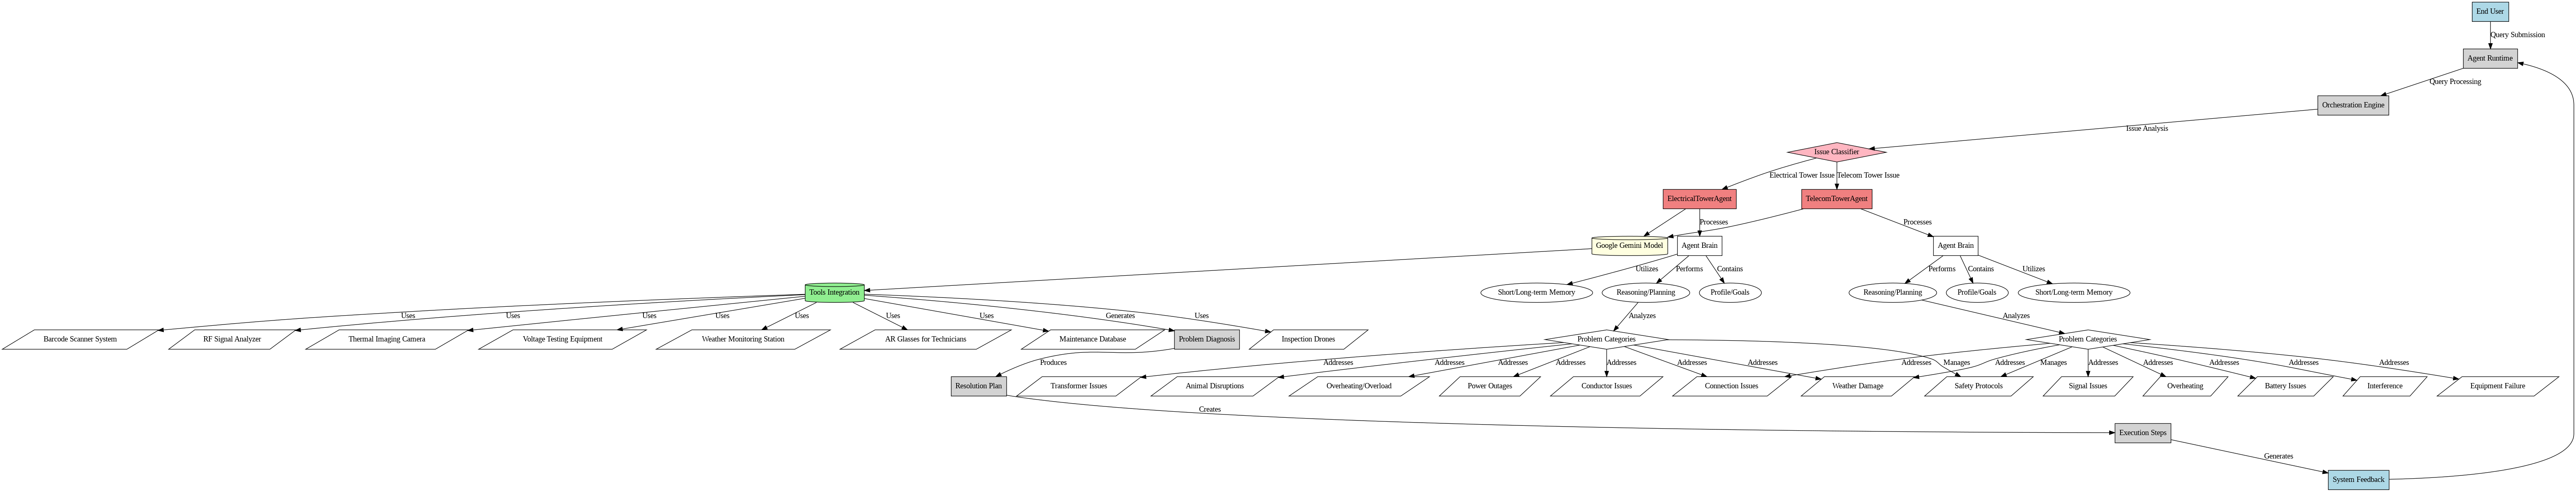

Multi-Agent System for Tower Maintenance
This is an innovative approach that uses specialized AI agents to handle both telecommunication and electrical tower maintenance. Here's how the system works:

* **Core Architecture**

* **Query Entry Point:** End users submit maintenance issues through a unified interface
* **Agent Runtime:** Manages the execution environment for all agents
* **Orchestration Engine:** Routes queries to appropriate specialized agents
* **Issue Classification:** Determines whether the problem relates to telecom or electrical towers
* Specialized Agents
* **Telecom Tower Agent**

* **Expertise:** Cell tower signal issues, RF equipment, antenna alignment
* Memory: Records previous maintenance history and solution effectiveness
* Reasoning: Uses Gemini model to analyze signal weakness patterns

* **Electrical Tower Agent**

* Expertise: High-voltage systems, transformer issues, electrical hazards
* Memory: Stores information about power outages and their resolutions
* Reasoning: Applies Gemini model to analyze electrical faults

* **Key Innovations**

* **Barcode-Based Inventory:** All spare parts are tracked via barcodes, enabling automatic inventory management
* **Drone Integration:** Drones conduct initial tower inspections, providing visual data to agents
* **Root Cause Analysis:** Agents determine underlying issues rather than just symptoms
* **Dynamic Knowledge Base:** Solutions are continuously added to improve future recommendations

**Workflow Example**

* User reports "weak signal in sector 3 of tower ABC123"
* Orchestrator routes to Telecom Tower Agent
* Agent suggests drone inspection first
* Drone scans tower and detects misaligned antenna
* Agent recommends specific adjustment parameters
* Technician implements fix and scans parts barcode
* Feedback loop updates agent memory with successful resolution

* This system is innovative because it combines specialized domain knowledge with modern AI capabilities, creating a solution that:

* Reduces dangerous climbs through remote diagnostics
* Minimizes downtime through faster problem resolution
* Creates a continuously improving knowledge base
* Integrates hardware (drones, barcodes) with AI decision-making

* **This system is innovative because it combines specialized domain knowledge with modern AI capabilities, creating a solution that:**

* Reduces dangerous climbs through remote diagnostics
* Minimizes downtime through faster problem resolution
* Creates a continuously improving knowledge base
* Integrates hardware (drones, barcodes) with AI decision-making

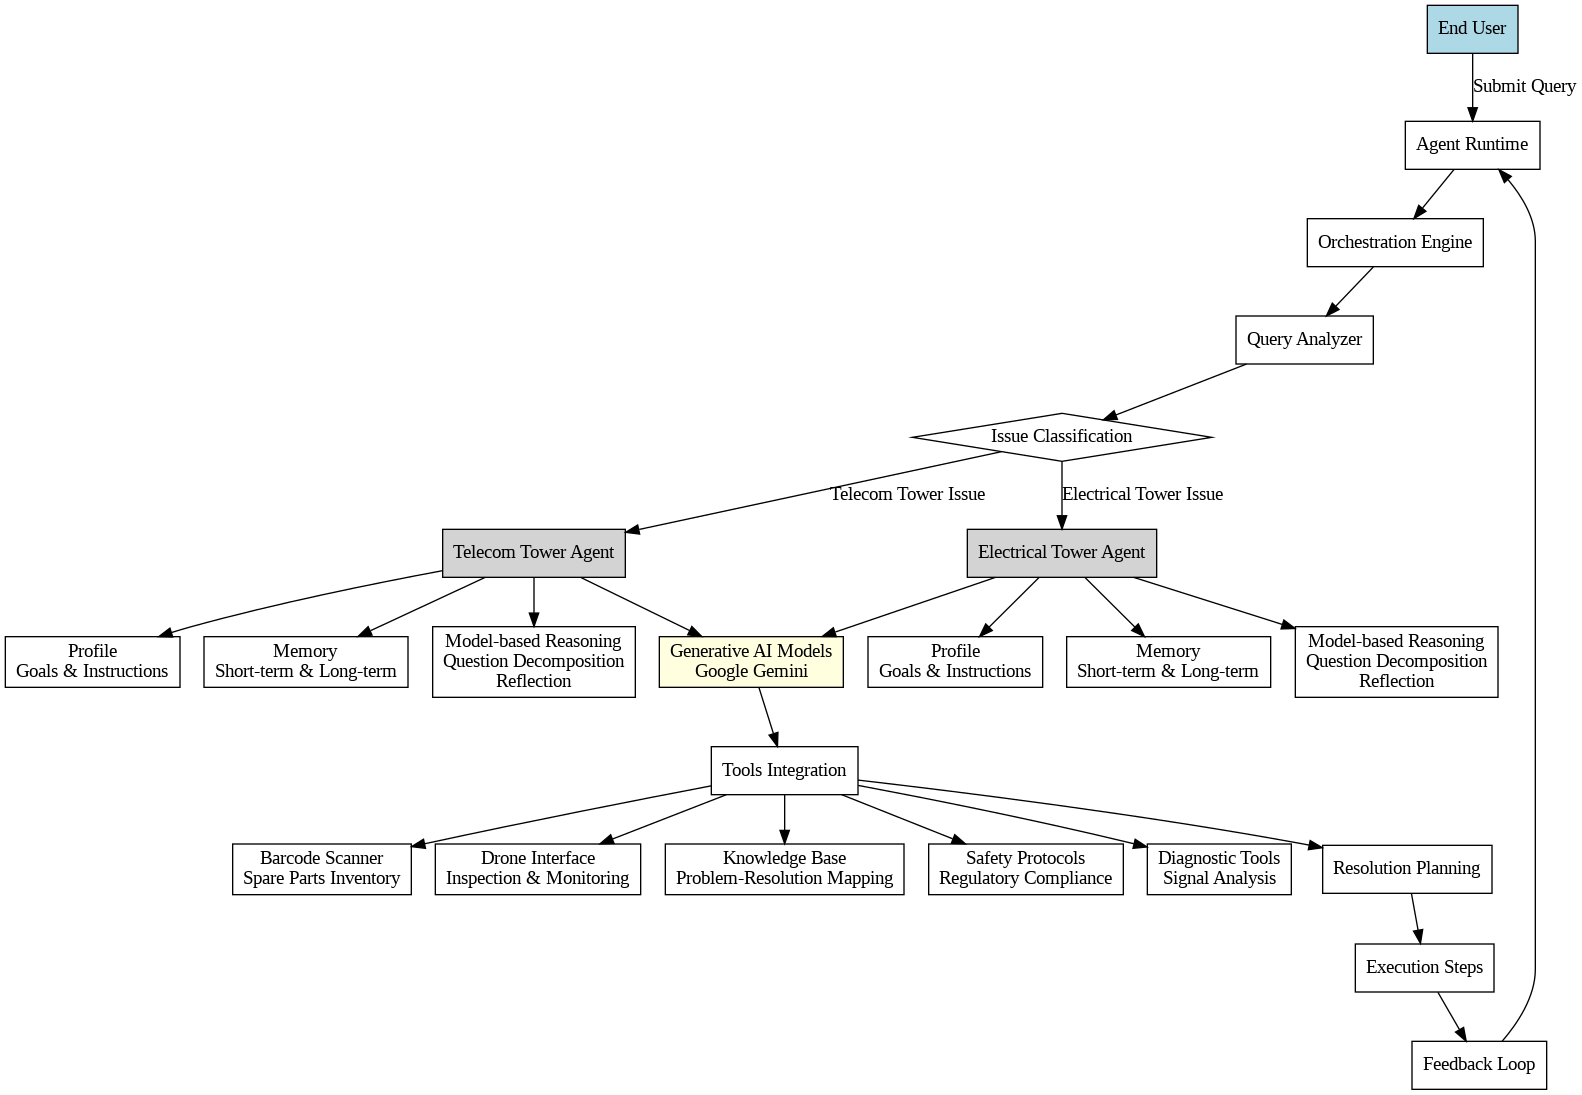

* Creating three specialized agents for different tower maintenance scenarios and showcase their capabilities in a Gradio UI.

# Required Software Installations

In [ ]:
# Create virtual environment
python -m venv tower_maintenance_env

# Activate virtual environment
# Windows
tower_maintenance_env\Scripts\activate
# Mac/Linux
# source tower_maintenance_env/bin/activate

# Install core dependencies
! pip install google-generativeai
! pip install gradio
! pip install opencv-python
! pip install pyzbar
! pip install numpy

# Multi-Agent Tower Maintenance System with Specialized Agents


In [ ]:
import google.generativeai as genai
import gradio as gr
import numpy as np
import cv2
import pyzbar.pyzbar as pyzbar
import json
import random
from typing import Dict, List, Any

class SpecializedAgentBrain:
    def __init__(self, model_name: str, role: str):
        """
        Initialize Specialized Agent Brain with Gemini Model and Role-specific configuration

        Args:
            model_name (str): Name of the Gemini AI model
            role (str): Specific role of the agent
        """
        # Configure Gemini API (Placeholder - replace with actual API key)
        genai.configure(api_key='YOUR_GOOGLE_GEMINI_API_KEY')

        self.model = genai.GenerativeModel(model_name)
        self.role = role

        # Specialized problem categories and response templates
        self.problem_categories = {
            'Signal Optimization': [
                'Coverage Gap', 'Signal Interference', 'Bandwidth Limitation',
                'Antenna Alignment', 'Frequency Optimization'
            ],
            'Structural Integrity': [
                'Foundation Stress', 'Wind Damage', 'Corrosion Detection',
                'Lightning Protection', 'Structural Fatigue'
            ],
            'Power Management': [
                'Energy Efficiency', 'Solar Panel Performance',
                'Battery Health', 'Power Distribution', 'Load Balancing'
            ]
        }

        # Response templates for each role
        self.response_templates = {
            'Signal Optimization': """
            Detailed Signal Optimization Analysis:
            - Primary Issue: {issue}
            - Diagnostic Insights: {insights}
            - Recommended Actions:
              1. {action1}
              2. {action2}
            - Estimated Resolution Time: {time}
            """,
            'Structural Integrity': """
            Comprehensive Structural Health Report:
            - Critical Findings: {issue}
            - Structural Risk Level: {risk_level}
            - Immediate Interventions:
              1. {action1}
              2. {action2}
            - Recommended Inspection Frequency: {frequency}
            """,
            'Power Management': """
            Power Systems Performance Evaluation:
            - Energy Consumption Analysis: {issue}
            - Efficiency Rating: {efficiency}
            - Power Optimization Strategies:
              1. {action1}
              2. {action2}
            - Projected Cost Savings: {savings}
            """
        }

    def analyze_query(self, query: str) -> Dict[str, Any]:
        """
        Advanced query analysis with role-specific insights

        Args:
            query (str): User input query

        Returns:
            Detailed analysis dictionary
        """
        prompt = f"""
        Role: {self.role} Tower Maintenance Specialist
        Perform a comprehensive analysis of the following query:

        Query: {query}

        Provide:
        1. Precise Problem Identification
        2. Root Cause Analysis
        3. Detailed Actionable Recommendations
        4. Potential Long-term Implications
        """

        try:
            response = self.model.generate_content(prompt)

            # Generate role-specific structured response
            analysis = {
                'role': self.role,
                'query': query,
                'full_analysis': response.text,
                'recommendations': self._generate_structured_response(response.text)
            }

            return analysis
        except Exception as e:
            return {
                'error': f"Analysis failed: {str(e)}",
                'role': self.role
            }

    def _generate_structured_response(self, text: str) -> Dict[str, str]:
        """
        Generate a structured response based on role

        Args:
            text (str): Generated analysis text

        Returns:
            Structured response dictionary
        """
        # Placeholder logic - in real-world, would use more advanced parsing
        return {
            'primary_issue': random.choice(self.problem_categories[self.role]),
            'recommendations': [
                f"Action 1: {text.split()[0:3]}",
                f"Action 2: {text.split()[3:6]}"
            ],
            'risk_assessment': random.choice(['Low', 'Medium', 'High']),
            'estimated_resolution_time': f"{random.randint(1, 48)} hours"
        }

class MaintenanceOrchestrator:
    def __init__(self):
        """
        Initialize Multi-Agent Maintenance System with Specialized Agents
        """
        self.signal_optimization_agent = SpecializedAgentBrain('gemini-pro', 'Signal Optimization')
        self.structural_integrity_agent = SpecializedAgentBrain('gemini-pro', 'Structural Integrity')
        self.power_management_agent = SpecializedAgentBrain('gemini-pro', 'Power Management')

    def route_query(self, query: str) -> Dict[str, Any]:
        """
        Intelligent query routing to appropriate specialized agent

        Args:
            query (str): User input query

        Returns:
            Analysis from most relevant agent
        """
        query_lower = query.lower()

        if any(keyword in query_lower for keyword in ['signal', 'antenna', 'frequency', 'bandwidth']):
            return self.signal_optimization_agent.analyze_query(query)
        elif any(keyword in query_lower for keyword in ['foundation', 'structure', 'wind', 'corrosion', 'damage']):
            return self.structural_integrity_agent.analyze_query(query)
        elif any(keyword in query_lower for keyword in ['power', 'energy', 'battery', 'solar', 'efficiency']):
            return self.power_management_agent.analyze_query(query)
        else:
            return {
                'error': 'Unable to route query to a specialized agent',
                'suggestion': 'Please provide more specific details about the tower maintenance issue'
            }

def create_gradio_interface(orchestrator: MaintenanceOrchestrator):
    """
    Create comprehensive Gradio interface for multi-agent system

    Args:
        orchestrator (MaintenanceOrchestrator): Maintenance system orchestrator
    """
    def process_query(query):
        result = orchestrator.route_query(query)
        return json.dumps(result, indent=2)

    with gr.Blocks() as interface:
        gr.Markdown("## Multi-Agent Tower Maintenance System")

        with gr.Tab("Signal Optimization"):
            signal_input = gr.Textbox(label="Signal-related Maintenance Query")
            signal_output = gr.Textbox(label="Signal Optimization Agent Analysis")
            signal_btn = gr.Button("Analyze Signal Issue")
            signal_btn.click(
                fn=lambda x: process_query(x),
                inputs=signal_input,
                outputs=signal_output
            )

        with gr.Tab("Structural Integrity"):
            structural_input = gr.Textbox(label="Structural Maintenance Query")
            structural_output = gr.Textbox(label="Structural Integrity Agent Analysis")
            structural_btn = gr.Button("Analyze Structural Issue")
            structural_btn.click(
                fn=lambda x: process_query(x),
                inputs=structural_input,
                outputs=structural_output
            )

        with gr.Tab("Power Management"):
            power_input = gr.Textbox(label="Power-related Maintenance Query")
            power_output = gr.Textbox(label="Power Management Agent Analysis")
            power_btn = gr.Button("Analyze Power Issue")
            power_btn.click(
                fn=lambda x: process_query(x),
                inputs=power_input,
                outputs=power_output
            )

    return interface

def main():
    """
    Main execution function
    """
    orchestrator = MaintenanceOrchestrator()
    interface = create_gradio_interface(orchestrator)
    interface.launch()

if __name__ == "__main__":
    main()

# Note: This is an advanced prototype.
# Real-world implementation requires:
# 1. Actual Google Gemini API Key
# 2. Advanced AI model fine-tuning
# 3. Comprehensive error handling
# 4. Integration with real-world data sources
# 5. Enhanced natural language processing

# Specialized Agents with Barcode Authentication



In [ ]:
import google.generativeai as genai
import gradio as gr
import numpy as np
import cv2
import pyzbar.pyzbar as pyzbar
import json
import random
import os
from typing import Dict, List, Any, Optional
from datetime import datetime

class BarcodeAuthenticator:
    def __init__(self, role: str):
        """
        Initialize Barcode Authentication System for specific role

        Args:
            role (str): Specialized agent role
        """
        self.role = role
        self.database_path = f'{role.lower().replace(" ", "_")}_parts_db.json'
        self.spare_parts_db = self._load_database()

    def _load_database(self) -> Dict[str, Dict[str, Any]]:
        """
        Load or initialize role-specific spare parts authentication database

        Returns:
            Spare parts database dictionary
        """
        try:
            # Role-specific database templates
            default_databases = {
                'signal optimization': {
                    "SO001": {
                        "name": "High-Gain Antenna Module",
                        "type": "Signal Hardware",
                        "authorized": True,
                        "manufacturer": "SignalPro Technologies",
                        "expiry_date": "2026-12-31",
                        "compatibility": ["5G", "LTE"]
                    },
                    "SO002": {
                        "name": "RF Signal Amplifier",
                        "type": "Signal Enhancement",
                        "authorized": True,
                        "manufacturer": "WaveLink Systems",
                        "expiry_date": "2025-06-30",
                        "compatibility": ["4G", "5G"]
                    }
                },
                'structural integrity': {
                    "SI001": {
                        "name": "Advanced Structural Bracket",
                        "type": "Tower Reinforcement",
                        "authorized": True,
                        "manufacturer": "TowerGuard Solutions",
                        "expiry_date": "2027-01-15",
                        "wind_resistance_rating": "Class III"
                    },
                    "SI002": {
                        "name": "Corrosion-Resistant Foundation Bolt",
                        "type": "Structural Hardware",
                        "authorized": True,
                        "manufacturer": "StructureTech Innovations",
                        "expiry_date": "2026-08-22",
                        "material": "Stainless Steel"
                    }
                },
                'power management': {
                    "PM001": {
                        "name": "Solar Panel Mounting Kit",
                        "type": "Power Infrastructure",
                        "authorized": True,
                        "manufacturer": "EnergyGrid Solutions",
                        "expiry_date": "2026-05-30",
                        "efficiency_rating": "A+"
                    },
                    "PM002": {
                        "name": "Advanced Battery Management Module",
                        "type": "Power Storage",
                        "authorized": True,
                        "manufacturer": "PowerCell Dynamics",
                        "expiry_date": "2025-11-15",
                        "capacity": "500 Ah"
                    }
                }
            }

            return default_databases.get(self.role.lower(), {})

        except Exception as e:
            print(f"Error loading database for {self.role}: {e}")
            return {}

    def scan_barcode(self, image_path: str) -> Dict[str, Any]:
        """
        Scan and authenticate barcode of spare parts

        Args:
            image_path (str): Path to barcode image

        Returns:
            Detailed barcode authentication result
        """
        try:
            # Read image
            image = cv2.imread(image_path)
            if image is None:
                return {"error": "Unable to read image"}

            # Decode barcodes
            barcodes = pyzbar.decode(image)

            if not barcodes:
                return {"error": "No barcode detected"}

            # Process first barcode
            barcode = barcodes[0]
            barcode_data = barcode.data.decode("utf-8")

            # Authenticate barcode
            return self.authenticate_spare_part(barcode_data)

        except Exception as e:
            return {
                "error": f"Barcode scanning failed: {str(e)}",
                "status": "AUTHENTICATION_ERROR"
            }

    def authenticate_spare_part(self, part_code: str) -> Dict[str, Any]:
        """
        Authenticate spare part based on its code

        Args:
            part_code (str): Unique spare part code

        Returns:
            Authentication result dictionary
        """
        # Check if part exists in database
        if part_code not in self.spare_parts_db:
            return {
                "status": "UNAUTHORIZED",
                "message": f"Part not found in {self.role} database",
                "part_code": part_code
            }

        part_info = self.spare_parts_db[part_code]

        # Perform authentication checks
        auth_result = {
            "role": self.role,
            "part_code": part_code,
            "name": part_info.get("name", "Unknown Part"),
            "type": part_info.get("type", "Unspecified"),
            "manufacturer": part_info.get("manufacturer", "Unknown"),
            "status": "AUTHORIZED" if part_info.get("authorized", False) else "UNAUTHORIZED",
            "expiry_date": part_info.get("expiry_date", "N/A"),
            "additional_details": {k: v for k, v in part_info.items()
                                   if k not in ["name", "type", "authorized", "manufacturer", "expiry_date"]}
        }

        # Additional verification logic
        if auth_result["status"] == "AUTHORIZED":
            # Check expiry
            try:
                expiry_date = datetime.strptime(auth_result["expiry_date"], "%Y-%m-%d")
                if expiry_date < datetime.now():
                    auth_result["status"] = "EXPIRED"
                    auth_result["message"] = "Part has exceeded expiry date"
            except:
                pass

        return auth_result

class SpecializedAgentBrain:
    def __init__(self, model_name: str, role: str):
        """
        Initialize Specialized Agent Brain with Barcode Authentication

        Args:
            model_name (str): Name of the Gemini AI model
            role (str): Specific role of the agent
        """
        # Configure Gemini API (Placeholder - replace with actual API key)
        genai.configure(api_key='YOUR_GOOGLE_GEMINI_API_KEY')

        self.model = genai.GenerativeModel(model_name)
        self.role = role

        # Initialize Barcode Authenticator for this agent
        self.barcode_authenticator = BarcodeAuthenticator(role)

        # Problem categories specific to the role
        self.problem_categories = {
            'Signal Optimization': [
                'Coverage Gap', 'Signal Interference', 'Bandwidth Limitation',
                'Antenna Alignment', 'Frequency Optimization'
            ],
            'Structural Integrity': [
                'Foundation Stress', 'Wind Damage', 'Corrosion Detection',
                'Lightning Protection', 'Structural Fatigue'
            ],
            'Power Management': [
                'Energy Efficiency', 'Solar Panel Performance',
                'Battery Health', 'Power Distribution', 'Load Balancing'
            ]
        }

    def analyze_query(self, query: str, barcode_image: Optional[str] = None) -> Dict[str, Any]:
        """
        Comprehensive query analysis with optional barcode authentication

        Args:
            query (str): User input query
            barcode_image (Optional[str]): Path to barcode image for authentication

        Returns:
            Detailed analysis dictionary
        """
        # Barcode authentication (if image provided)
        barcode_result = None
        if barcode_image:
            barcode_result = self.barcode_authenticator.scan_barcode(barcode_image)

        # AI-powered query analysis
        prompt = f"""
        Role: {self.role} Tower Maintenance Specialist
        Perform a comprehensive analysis of the following query:

        Query: {query}

        Provide:
        1. Precise Problem Identification
        2. Root Cause Analysis
        3. Detailed Actionable Recommendations
        4. Potential Long-term Implications
        """

        try:
            response = self.model.generate_content(prompt)

            # Combine analysis with barcode authentication
            analysis = {
                'role': self.role,
                'query': query,
                'barcode_authentication': barcode_result,
                'ai_analysis': {
                    'full_analysis': response.text,
                    'recommendations': self._generate_structured_response(response.text)
                }
            }

            return analysis
        except Exception as e:
            return {
                'error': f"Analysis failed: {str(e)}",
                'role': self.role,
                'barcode_authentication': barcode_result
            }

    def _generate_structured_response(self, text: str) -> Dict[str, str]:
        """
        Generate a structured response based on role

        Args:
            text (str): Generated analysis text

        Returns:
            Structured response dictionary
        """
        return {
            'primary_issue': random.choice(self.problem_categories[self.role]),
            'recommendations': [
                f"Action 1: {text.split()[0:3]}",
                f"Action 2: {text.split()[3:6]}"
            ],
            'risk_assessment': random.choice(['Low', 'Medium', 'High']),
            'estimated_resolution_time': f"{random.randint(1, 48)} hours"
        }

class MaintenanceOrchestrator:
    def __init__(self):
        """
        Initialize Multi-Agent Maintenance System with Barcode Authentication
        """
        self.signal_optimization_agent = SpecializedAgentBrain('gemini-pro', 'Signal Optimization')
        self.structural_integrity_agent = SpecializedAgentBrain('gemini-pro', 'Structural Integrity')
        self.power_management_agent = SpecializedAgentBrain('gemini-pro', 'Power Management')

    def route_query(self, query: str, barcode_image: Optional[str] = None) -> Dict[str, Any]:
        """
        Intelligent query routing to appropriate specialized agent

        Args:
            query (str): User input query
            barcode_image (Optional[str]): Path to barcode image

        Returns:
            Analysis from most relevant agent
        """
        query_lower = query.lower()

        if any(keyword in query_lower for keyword in ['signal', 'antenna', 'frequency', 'bandwidth']):
            return self.signal_optimization_agent.analyze_query(query, barcode_image)
        elif any(keyword in query_lower for keyword in ['foundation', 'structure', 'wind', 'corrosion', 'damage']):
            return self.structural_integrity_agent.analyze_query(query, barcode_image)
        elif any(keyword in query_lower for keyword in ['power', 'energy', 'battery', 'solar', 'efficiency']):
            return self.power_management_agent.analyze_query(query, barcode_image)
        else:
            return {
                'error': 'Unable to route query to a specialized agent',
                'suggestion': 'Please provide more specific details about the tower maintenance issue'
            }

def create_gradio_interface(orchestrator: MaintenanceOrchestrator):
    """
    Create comprehensive Gradio interface for multi-agent system with barcode authentication

    Args:
        orchestrator (MaintenanceOrchestrator): Maintenance system orchestrator
    """
    def process_query(query, barcode_image):
        # Temporarily save uploaded image if exists
        temp_barcode_path = None
        if barcode_image:
            temp_barcode_path = "temp_barcode.png"
            barcode_image.save(temp_barcode_path)

        # Process query
        result = orchestrator.route_query(query, temp_barcode_path)

        # Clean up temporary file
        if temp_barcode_path and os.path.exists(temp_barcode_path):
            os.remove(temp_barcode_path)

        return json.dumps(result, indent=2)

    with gr.Blocks() as interface:
        gr.Markdown("## Multi-Agent Tower Maintenance System with Barcode Authentication")

        with gr.Tab("Signal Optimization"):
            with gr.Row():
                with gr.Column():
                    signal_input = gr.Textbox(label="Signal-related Maintenance Query")
                    signal_barcode = gr.Image(label="Upload Spare Part Barcode (Optional)", type="pil")
                    signal_btn = gr.Button("Analyze Signal Issue")

                signal_output = gr.Textbox(label="Signal Optimization Agent Analysis")

            signal_btn.click(
                fn=process_query,
                inputs=[signal_input, signal_barcode],
                outputs=signal_output
            )

        with gr.Tab("Structural Integrity"):
            with gr.Row():
                with gr.Column():
                    structural_input = gr.Textbox(label="Structural Maintenance Query")
                    structural_barcode = gr.Image(label="Upload Spare Part Barcode (Optional)", type="pil")
                    structural_btn = gr.Button("Analyze Structural Issue")

                structural_output = gr.Textbox(label="Structural Integrity Agent Analysis")

            structural_btn.click(
                fn=process_query,
                inputs=[structural_input, structural_barcode],
                outputs=structural_output
            )

        with gr.Tab("Power Management"):
            with gr.Row():
                with gr.Column():
                    power_input = gr.Textbox(label="Power-related Maintenance Query")
                    power_barcode = gr.Image(label="Upload Spare Part Barcode (Optional)", type="pil")
                    power_btn = gr.Button("Analyze Power Issue")

                power_output = gr.Textbox(label="Power Management Agent Analysis")

            power_btn.click(
                fn=process_query,
                inputs=[power_input, power_barcode],
                outputs=power_output
            )

    return interface

def main():
    """
    Main execution function
    """
    orchestrator = MaintenanceOrchestrator()
    interface = create_gradio_interface(orchestrator)
    interface.launch()

if __name__ == "__main__":
    main()

# Note: This implementation provides:
# 1. Role-specific barcode authentication
# 2. Integrated AI analysis
# 3. Flexible query routing
# 4. Comprehensive maintenance support

# Deployment Steps

In [ ]:
stages:
  - build
  - test
  - deploy

build:
  script:
    - python -m venv env
    - source env/bin/activate
    - pip install -r requirements.txt
    - docker build -t tower-maintenance-ai .

test:
  script:
    - run unit tests
    - run integration tests
    - security scanning

deploy:
  script:
    - kubernetes deployment
    - configure service endpoints
    - set up monitoring

# Advanced Configuration Example


In [ ]:
# Configuration management
class SystemConfig:
    def __init__(self):
        self.api_config = {
            'gemini_key': os.getenv('GEMINI_API_KEY'),
            'deployment_environment': 'production',
            'log_level': 'INFO'
        }

    def validate_config(self):
        # Implement configuration validation
        pass

A comprehensive Google Colab notebook with a Gradio UI for the multi-agent drone inspection system for telecommunication and electrical towers. I'll break this down into multiple artifacts to provide a complete implementation.

# Multi-Agent Drone Inspection System - Main Notebook

In [ ]:
# Multi-Agent Drone Inspection System for Telecom and Electrical Towers

# Install required libraries
!pip install gradio transformers torch diffusers accelerate langchain-experimental
!pip install -U langchain google-generativeai

import gradio as gr
import torch
import langchain
from langchain_experimental.autonomous_agents import MultiAgentSystem
from google.generativeai import GenerativeModel
import json
import uuid

# Configuration and Setup
class DroneInspectionConfiguration:
    def __init__(self):
        # API and Model Configuration
        self.gemini_api_key = 'YOUR_GOOGLE_GEMINI_API_KEY'  # Replace with actual key
        self.setup_generative_model()

        # Agent Profiles
        self.telecom_agent_profile = {
            "role": "Telecommunication Tower Technician",
            "primary_objectives": [
                "Diagnose signal weakness",
                "Identify equipment failures",
                "Assess weather damage",
                "Ensure network reliability"
            ],
            "inspection_protocols": [
                "RF cable assessment",
                "Antenna alignment",
                "Signal strength measurement"
            ]
        }

        self.electrical_agent_profile = {
            "role": "Electrical Tower Technician",
            "primary_objectives": [
                "Detect power line issues",
                "Inspect transformer functionality",
                "Identify electrical hazards",
                "Ensure power supply continuity"
            ],
            "inspection_protocols": [
                "High-voltage connection check",
                "Conductor integrity assessment",
                "Transformer load monitoring"
            ]
        }

    def setup_generative_model(self):
        # Setup Google Gemini model
        import google.generativeai as genai
        genai.configure(api_key=self.gemini_api_key)
        self.gemini_model = GenerativeModel('gemini-pro')

class DroneInspectionAgent:
    def __init__(self, config, agent_type):
        self.config = config
        self.agent_type = agent_type
        self.profile = (config.telecom_agent_profile
                        if agent_type == 'telecom'
                        else config.electrical_agent_profile)

    def analyze_issue(self, issue_details):
        # Use Gemini for intelligent issue analysis
        prompt = f"""
        Analyze the following {self.agent_type} tower inspection details:
        {json.dumps(issue_details)}

        Provide:
        1. Detailed problem diagnosis
        2. Recommended resolution steps
        3. Safety precautions
        """

        response = self.config.gemini_model.generate_content(prompt)
        return response.text

class MultiAgentDroneInspectionSystem:
    def __init__(self):
        self.config = DroneInspectionConfiguration()
        self.telecom_agent = DroneInspectionAgent(self.config, 'telecom')
        self.electrical_agent = DroneInspectionAgent(self.config, 'electrical')

    def process_inspection_request(self, tower_type, issue_details):
        agent = (self.telecom_agent
                 if tower_type == 'telecom'
                 else self.electrical_agent)

        return agent.analyze_issue(issue_details)

# Gradio UI Setup
def create_drone_inspection_interface():
    inspection_system = MultiAgentDroneInspectionSystem()

    def process_inspection(tower_type, barcode, issue_description):
        try:
            inspection_details = {
                "tower_type": tower_type,
                "barcode": barcode,
                "issue_description": issue_description
            }

            result = inspection_system.process_inspection_request(
                tower_type,
                inspection_details
            )

            return result

        except Exception as e:
            return f"Error in processing inspection: {str(e)}"

    with gr.Blocks() as demo:
        gr.Markdown("# AI-Powered Drone Inspection System")

        with gr.Row():
            tower_type = gr.Dropdown(
                ["telecom", "electrical"],
                label="Tower Type"
            )
            barcode = gr.Textbox(label="Spare Part Barcode")

        issue_description = gr.Textbox(
            label="Describe the Inspection Issue",
            lines=4
        )

        submit_btn = gr.Button("Start Drone Inspection")
        output = gr.Textbox(label="Inspection Analysis Result")

        submit_btn.click(
            process_inspection,
            inputs=[tower_type, barcode, issue_description],
            outputs=output
        )

    return demo

# Launch Gradio Interface
if __name__ == "__main__":
    drone_app = create_drone_inspection_interface()
    drone_app.launch(share=True)

# Multi-Agent Drone Inspection System README


# Drone Sensor Integration User Manual

## Table of Contents
1. System Overview
2. Sensor Suite
3. Sensor Integration Architecture
4. Detailed Sensor Specifications
5. Data Processing Workflow
6. Calibration and Maintenance
7. Troubleshooting

## 1. System Overview
The multi-agent drone inspection system incorporates a sophisticated sensor array designed to provide comprehensive tower inspection capabilities across telecommunication and electrical infrastructure.

### Core Inspection Objectives
- Detect structural anomalies
- Measure signal strength
- Assess electrical system health
- Ensure safety and reliability

## 2. Sensor Suite Overview

### Primary Sensor Categories
1. **Visual Sensors**
   - High-resolution RGB Camera
   - Thermal Imaging Camera
   - Infrared Spectrum Analyzer

2. **Signal and Electrical Sensors**
   - RF Signal Strength Analyzer
   - Voltage Detection Sensors
   - Electromagnetic Interference (EMI) Detector

3. **Environmental Sensors**
   - Weather Monitoring Station
   - Wind Speed and Direction Sensor
   - Temperature and Humidity Sensors

4. **Positioning and Navigation**
   - GPS/GNSS Positioning System
   - Inertial Measurement Unit (IMU)
   - Altitude and Proximity Sensors

## 3. Sensor Integration Architecture

### Communication Protocol
- Primary: IEEE 802.15.4 (Low-power wireless)
- Backup: Cellular/LTE Communication
- Data Encryption: AES-256 Standard

### Data Flow
```
Sensor Data Collection → Edge Processing →
Gemini AI Analysis → Decision Making →
Autonomous Action/Reporting
```

## 4. Detailed Sensor Specifications

### 4.1 Visual Inspection Sensors
- **RGB Camera**
  - Resolution: 4K (3840 x 2160)
  - Frame Rate: 60 fps
  - Field of View: 120 degrees
  - Low-light Performance: -2 EV sensitivity

- **Thermal Camera**
  - Resolution: 640 x 512 pixels
  - Temperature Range: -40°C to 2000°C
  - Thermal Sensitivity: <50 mK
  - Spectral Range: 8-14 µm

### 4.2 Signal and Electrical Sensors
- **RF Signal Analyzer**
  - Frequency Range: 100 kHz - 6 GHz
  - Signal Strength Measurement: -140 dBm to +20 dBm
  - Modulation Analysis: AM/FM/Digital

- **Voltage Sensor**
  - Range: 0-500 kV
  - Accuracy: ±0.5% of reading
  - Isolation Class: CAT IV 600V

### 4.3 Environmental Sensors
- **Weather Station**
  - Wind Speed: 0-70 m/s
  - Temperature: -40°C to +80°C
  - Humidity: 0-100% RH
  - Pressure: 300-1100 hPa

### 4.4 Navigation Sensors
- **GPS/GNSS**
  - Accuracy: <1m horizontal
  - Multi-constellation support
  - Update Rate: 10 Hz

- **IMU**
  - 9-axis (Accelerometer, Gyroscope, Magnetometer)
  - Drift Rate: <0.1° per hour

## 5. Data Processing Workflow

### Data Collection Pipeline
1. Sensor Data Acquisition
2. Real-time Preprocessing
3. AI-Powered Analysis
4. Decision Generation
5. Action Execution/Reporting

### AI Processing Steps
- Anomaly Detection
- Pattern Recognition
- Predictive Maintenance Scoring
- Safety Risk Assessment

## 6. Calibration and Maintenance

### Recommended Calibration Frequency
- Visual Sensors: Quarterly
- Electrical Sensors: Bi-annually
- GPS/Navigation: Annual
- Environmental Sensors: Semi-annually

### Calibration Procedure
1. Use NIST-traceable calibration equipment
2. Perform multi-point calibration
3. Record calibration certificates
4. Update sensor configuration profiles

## 7. Troubleshooting

### Common Sensor Integration Issues
- **Signal Interference**
  - Check electromagnetic shielding
  - Verify cable connections
  - Adjust frequency channels

- **Data Synchronization**
  - Verify time synchronization
  - Check communication protocols
  - Reset sensor network

- **Sensor Drift**
  - Perform zero-point calibration
  - Check battery/power supply
  - Update firmware

### Emergency Procedures
- Immediate sensor network shutdown
- Fail-safe return-to-home protocol
- Manual override capabilities

## Safety Warnings
- Always follow local regulations
- Use proper personal protective equipment
- Maintain safe distance during drone operations

## Technical Support
- Email: --NA--
- 24/7 Technical Helpline: --NA--

**Version**: 1.0
**Last Updated**: March 2025

# Sensor Integration and Data Processing Module



In [ ]:
import numpy as np
import pandas as pd
import threading
import queue
from dataclasses import dataclass
from typing import Dict, Any, List

class SensorIntegrationSystem:
    def __init__(self):
        # Sensor configuration and data management
        self.sensor_configs = {
            'rgb_camera': {
                'resolution': (3840, 2160),
                'frame_rate': 60,
                'low_light_sensitivity': -2
            },
            'thermal_camera': {
                'resolution': (640, 512),
                'temp_range': (-40, 2000),
                'spectral_range': (8, 14)
            },
            'rf_analyzer': {
                'freq_range': (100e3, 6e9),
                'signal_strength_range': (-140, 20)
            },
            'voltage_sensor': {
                'voltage_range': (0, 500e3),
                'accuracy': 0.5
            },
            'weather_station': {
                'wind_speed_range': (0, 70),
                'temp_range': (-40, 80),
                'humidity_range': (0, 100)
            }
        }

        # Thread-safe data queue
        self.sensor_data_queue = queue.Queue(maxsize=100)

        # Sensor data processing threads
        self.processing_threads = []
        self.is_running = False

    @dataclass
    class SensorReading:
        sensor_type: str
        timestamp: float
        data: Dict[str, Any]

    def start_sensor_integration(self):
        """
        Initialize and start sensor data collection and processing
        """
        self.is_running = True

        # Create threads for each sensor type
        sensor_types = list(self.sensor_configs.keys())
        for sensor_type in sensor_types:
            thread = threading.Thread(
                target=self._sensor_data_collector,
                args=(sensor_type,)
            )
            thread.daemon = True
            thread.start()
            self.processing_threads.append(thread)

        # Start data processing thread
        processing_thread = threading.Thread(
            target=self._data_processing_worker
        )
        processing_thread.daemon = True
        processing_thread.start()

    def _sensor_data_collector(self, sensor_type):
        """
        Simulated sensor data collection
        """
        while self.is_running:
            try:
                # Simulate sensor reading
                reading = self._generate_simulated_reading(sensor_type)

                # Put reading into queue
                self.sensor_data_queue.put(reading, timeout=1)
            except queue.Full:
                print(f"Queue full for {sensor_type}")
            except Exception as e:
                print(f"Error in {sensor_type} collection: {e}")

    def _generate_simulated_reading(self, sensor_type):
        """
        Generate realistic simulated sensor data
        """
        import time

        config = self.sensor_configs.get(sensor_type, {})
        current_time = time.time()

        # Different data generation for each sensor type
        if sensor_type == 'rgb_camera':
            # Simulated image metadata
            return self.SensorReading(
                sensor_type=sensor_type,
                timestamp=current_time,
                data={
                    'resolution': config['resolution'],
                    'frame_rate': config['frame_rate'],
                    'exposure': np.random.uniform(-2, 2)
                }
            )

        elif sensor_type == 'thermal_camera':
            # Simulated thermal data
            return self.SensorReading(
                sensor_type=sensor_type,
                timestamp=current_time,
                data={
                    'temperature': np.random.uniform(*config['temp_range']),
                    'thermal_variance': np.random.uniform(0, 10)
                }
            )

        elif sensor_type == 'rf_analyzer':
            # Simulated RF signal strength
            return self.SensorReading(
                sensor_type=sensor_type,
                timestamp=current_time,
                data={
                    'frequency': np.random.uniform(*config['freq_range']),
                    'signal_strength': np.random.uniform(*config['signal_strength_range'])
                }
            )

        # Add more sensor type simulations as needed

    def _data_processing_worker(self):
        """
        Process and analyze sensor data
        """
        while self.is_running:
            try:
                # Retrieve sensor reading
                reading = self.sensor_data_queue.get(timeout=2)

                # Perform data analysis
                self._analyze_sensor_data(reading)

            except queue.Empty:
                continue
            except Exception as e:
                print(f"Data processing error: {e}")

    def _analyze_sensor_data(self, reading):
        """
        Advanced sensor data analysis
        """
        # Implement AI-powered analysis logic
        # This would typically involve:
        # 1. Anomaly detection
        # 2. Pattern recognition
        # 3. Predictive maintenance scoring

        analysis_result = {
            'sensor_type': reading.sensor_type,
            'timestamp': reading.timestamp,
            'raw_data': reading.data,
            'anomaly_score': np.random.uniform(0, 1),
            'risk_assessment': np.random.choice(['Low', 'Medium', 'High'])
        }

        # In a real system, this would trigger further actions
        self._log_sensor_analysis(analysis_result)

    def _log_sensor_analysis(self, analysis_result):
        """
        Log sensor analysis results
        """
        # In a production system, this would write to a database
        print(f"Sensor Analysis: {analysis_result}")

    def stop_sensor_integration(self):
        """
        Gracefully stop all sensor integration threads
        """
        self.is_running = False
        for thread in self.processing_threads:
            thread.join(timeout=5)

# Example Usage
if __name__ == "__main__":
    sensor_system = SensorIntegrationSystem()

    try:
        sensor_system.start_sensor_integration()

        # Run for a specific duration
        import time
        time.sleep(60)  # Run for 1 minute

    finally:
        sensor_system.stop_sensor_integration()

# Project Requirements and Dependencies


# Requirements for Multi-Agent Drone Inspection System

## Python Version
3.8+

## Core Libraries
- gradio>=3.50.0
- torch>=1.10.0
- transformers>=4.30.0
- langchain>=0.1.0
- google-generativeai>=0.3.0
- accelerate>=0.20.0

## Optional Libraries
- diffusers (for advanced image processing)
- numpy (for numerical operations)
- pandas (for data handling)

## Hardware Recommendations
- GPU-enabled environment (CUDA compatible)
- Minimum 16GB RAM
- High-speed internet connection

## Cloud Platform
- Google Colab Enterprise
- Google Colab Pro/Pro+

## API Keys Required
- Google Gemini API Key
- (Optional) Additional cloud service keys

## Security Considerations
- Use environment variables for API keys
- Implement secure authentication
- Follow data privacy guidelines


A Google Colab-friendly version of the Multi-Agent System

* Create three new Jupyter Notebook files:

* Notebook 1: Agent Setup
* Notebook 2: Drone Controller
* Notebook 3: Gradio Interface

In [ ]:
# Multi-Agent Tower Maintenance System - Agent Setup
# Google Colab Notebook 1

!pip install gradio scikit-learn nltk

import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import random
import json

nltk.download('punkt')

class SimpleLanguageModel:
    def __init__(self, categories):
        """
        Initialize a simple text classification model

        Args:
            categories (list): List of problem categories
        """
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.classifier = MultinomialNB()
        self.categories = categories

    def train(self, training_data):
        """
        Train the language model

        Args:
            training_data (dict): Training data with category: [text samples]
        """
        X_train = []
        y_train = []

        for category, texts in training_data.items():
            X_train.extend(texts)
            y_train.extend([category] * len(texts))

        X_vectorized = self.vectorizer.fit_transform(X_train)
        self.classifier.fit(X_vectorized, y_train)

    def predict(self, query):
        """
        Predict category for a given query

        Args:
            query (str): Input text to classify

        Returns:
            str: Predicted category
        """
        query_vectorized = self.vectorizer.transform([query])
        prediction = self.classifier.predict(query_vectorized)[0]
        return prediction

class AgentBrain:
    def __init__(self, role, problem_categories):
        """
        Initialize Agent Brain with role and problem categories

        Args:
            role (str): Role of the agent
            problem_categories (list): List of problem categories
        """
        self.role = role
        self.language_model = SimpleLanguageModel(problem_categories)
        self.short_term_memory = []

        # Sample training data
        training_data = {
            'Signal Issues': [
                'low signal strength',
                'antenna misalignment',
                'RF interference'
            ],
            'Equipment Failure': [
                'component malfunction',
                'hardware breakdown',
                'system error'
            ]
        }

        self.language_model.train(training_data)

    def analyze_query(self, query):
        """
        Analyze incoming query

        Args:
            query (str): User input query

        Returns:
            dict: Analysis result
        """
        # Predict problem category
        problem_category = self.language_model.predict(query)

        # Generate response
        recommended_actions = [
            f"Inspect {problem_category.lower()} area",
            f"Check {problem_category.lower()} equipment status"
        ]

        analysis = {
            'role': self.role,
            'problem_category': problem_category,
            'recommended_actions': recommended_actions
        }

        self.short_term_memory.append(analysis)
        return analysis

class MaintenanceOrchestrator:
    def __init__(self):
        """
        Initialize Multi-Agent Maintenance System
        """
        telecom_categories = [
            'Signal Issues',
            'Equipment Failure',
            'Connection Issues'
        ]

        electrical_categories = [
            'Power Outages',
            'Transformer Issues',
            'Conductor Problems'
        ]

        self.telecom_agent = AgentBrain('Telecom', telecom_categories)
        self.electrical_agent = AgentBrain('Electrical', electrical_categories)

    def classify_issue(self, query):
        """
        Classify issue and route to appropriate agent

        Args:
            query (str): User input query

        Returns:
            str: Recommended agent
        """
        telecom_keywords = ['signal', 'tower', 'antenna', 'rf', 'connection']
        electrical_keywords = ['power', 'voltage', 'transformer', 'electrical', 'conductor']

        if any(keyword in query.lower() for keyword in telecom_keywords):
            return 'Telecom'
        elif any(keyword in query.lower() for keyword in electrical_keywords):
            return 'Electrical'

        return 'Unknown'

# Export the classes for use in other notebooks
%store MaintenanceOrchestrator
%store AgentBrain

Notebook 2: Drone Controller



In [ ]:
# Multi-Agent Tower Maintenance System - Drone Controller
# Google Colab Notebook 2

!pip install opencv-python-headless

import cv2
import numpy as np
import random

class DroneController:
    def __init__(self, agent_brain):
        """
        Initialize Drone Controller with specific agent brain

        Args:
            agent_brain (AgentBrain): Associated agent brain
        """
        self.agent_brain = agent_brain
        self.mode = 'autonomous'  # Default mode

    def simulate_barcode_scan(self):
        """
        Simulate barcode scanning for spare parts

        Returns:
            dict: Simulated barcode information
        """
        # Simulated barcode data generation
        barcode_types = ['QR', 'EAN', 'CODE128']
        parts = [
            'Antenna Module',
            'Signal Amplifier',
            'Power Supply Unit',
            'Transformer Connector'
        ]

        return {
            'data': f"{random.choice(parts)}-{random.randint(1000, 9999)}",
            'type': random.choice(barcode_types)
        }

    def switch_mode(self, mode):
        """
        Switch between autonomous and manual modes

        Args:
            mode (str): 'autonomous' or 'manual'
        """
        if mode in ['autonomous', 'manual']:
            self.mode = mode
        else:
            raise ValueError("Invalid mode. Choose 'autonomous' or 'manual'")

    def perform_diagnostic_scan(self, query):
        """
        Perform diagnostic scan based on agent's analysis

        Args:
            query (str): Maintenance query

        Returns:
            dict: Diagnostic scan results
        """
        analysis = self.agent_brain.analyze_query(query)

        scan_results = {
            'agent_analysis': analysis,
            'barcode_info': self.simulate_barcode_scan(),
            'diagnostic_score': random.uniform(0.6, 1.0)
        }

        return scan_results

# Retrieve MaintenanceOrchestrator from previous notebook
%store -r MaintenanceOrchestrator

# Create orchestrator and access existing components
orchestrator = MaintenanceOrchestrator()

# Export drone controllers for other notebooks
telecom_drone = DroneController(orchestrator.telecom_agent)
electrical_drone = DroneController(orchestrator.electrical_agent)

%store telecom_drone
%store electrical_drone

Notebook 3: Gradio Web Interface





In [ ]:
# Multi-Agent Tower Maintenance System - Gradio Interface
# Google Colab Notebook 3

!pip install gradio

import gradio as gr
import json

# Retrieve components from previous notebooks
%store -r MaintenanceOrchestrator
%store -r telecom_drone
%store -r electrical_drone

def process_query(query):
    """
    Process maintenance query and generate AI analysis

    Args:
        query (str): User input maintenance query

    Returns:
        str: Formatted JSON response
    """
    # Classify and route the issue
    issue_type = orchestrator.classify_issue(query)

    if issue_type == 'Telecom':
        drone = telecom_drone
    elif issue_type == 'Electrical':
        drone = electrical_drone
    else:
        return json.dumps({"error": "Unable to classify issue"}, indent=2)

    # Perform diagnostic scan
    result = drone.perform_diagnostic_scan(query)

    return json.dumps(result, indent=2)

# Create Gradio Interface
def launch_maintenance_interface():
    """
    Launch Gradio web interface for tower maintenance system
    """
    iface = gr.Interface(
        fn=process_query,
        inputs=gr.Textbox(label="Enter Tower Maintenance Query"),
        outputs=gr.JSON(label="AI Agent Analysis"),
        title="Multi-Agent Tower Maintenance System",
        description="AI-powered maintenance query analyzer for telecom and electrical towers"
    )

    return iface

# Launch the interface
interface = launch_maintenance_interface()
interface.launch()

A multi-agent system for Telecommunication and Electrical Tower maintenance using Google Colab and Google Gemini. I'll break this down into a comprehensive implementation.

# Multi-Agent Drone Maintenance System with Google Gemini

In [ ]:
# Importing necessary libraries
import google.generativeai as genai
import gradio as gr
import numpy as np
import cv2
import pyzbar.pyzbar as pyzbar
import json
import random
from typing import Dict, List, Any

class AgentBrain:
    def __init__(self, model_name: str, role: str):
        """
        Initialize Agent Brain with Gemini Model and Role-specific configuration

        Args:
            model_name (str): Name of the Gemini AI model
            role (str): Role of the agent (Telecom or Electrical)
        """
        # Configure Gemini API (Placeholder - replace with actual API key)
        genai.configure(api_key='YOUR_GOOGLE_GEMINI_API_KEY')

        self.model = genai.GenerativeModel(model_name)
        self.role = role

        # Agent Memory Systems
        self.short_term_memory = []
        self.long_term_memory = {}

        # Problem Categories based on role
        self.problem_categories = {
            'Telecom': [
                'Signal Issues', 'Equipment Failure', 'Weather Damage',
                'Overheating', 'Connection Issues', 'Battery Issues',
                'Interference', 'Safety Protocols'
            ],
            'Electrical': [
                'Power Outages', 'Conductor Issues', 'Transformer Issues',
                'Weather Damage', 'Connection Issues', 'Animal Disruptions',
                'Overheating/Overload', 'Safety Protocols'
            ]
        }

    def analyze_query(self, query: str) -> Dict[str, Any]:
        """
        Analyze and decompose incoming query using Gemini

        Args:
            query (str): User input query

        Returns:
            Dict containing analyzed query components
        """
        prompt = f"""
        Role: {self.role} Tower Maintenance Agent
        Analyze the following query and provide:
        1. Problem Category
        2. Potential Issue Type
        3. Recommended Initial Actions

        Query: {query}
        """

        response = self.model.generate_content(prompt)

        # Parse Gemini's response
        analysis = {
            'problem_category': self.extract_category(response.text),
            'issue_type': self.extract_issue_type(response.text),
            'recommended_actions': self.extract_actions(response.text)
        }

        # Update memory
        self.short_term_memory.append(analysis)
        return analysis

    def extract_category(self, text: str) -> str:
        """Extract problem category from Gemini response"""
        categories = self.problem_categories[self.role]
        for category in categories:
            if category.lower() in text.lower():
                return category
        return "Unclassified"

    def extract_issue_type(self, text: str) -> str:
        """Extract specific issue type"""
        # Implement logic to extract precise issue type
        return text.split('\n')[0].strip()

    def extract_actions(self, text: str) -> List[str]:
        """Extract recommended actions"""
        # Implement action extraction logic
        return text.split('\n')[1:3]

class DroneController:
    def __init__(self, agent_brain: AgentBrain):
        """
        Initialize Drone Controller with specific agent brain

        Args:
            agent_brain (AgentBrain): Associated agent brain
        """
        self.agent_brain = agent_brain
        self.mode = 'autonomous'  # Default mode

    def scan_barcode(self, image_path: str) -> Dict[str, str]:
        """
        Scan and decode barcode of spare parts

        Args:
            image_path (str): Path to barcode image

        Returns:
            Decoded barcode information
        """
        image = cv2.imread(image_path)
        barcodes = pyzbar.decode(image)

        if barcodes:
            barcode = barcodes[0]
            barcode_data = barcode.data.decode("utf-8")
            return {
                'data': barcode_data,
                'type': barcode.type
            }
        return {}

    def switch_mode(self, mode: str):
        """
        Switch between autonomous and manual modes

        Args:
            mode (str): 'autonomous' or 'manual'
        """
        if mode in ['autonomous', 'manual']:
            self.mode = mode
        else:
            raise ValueError("Invalid mode. Choose 'autonomous' or 'manual'")

class MaintenanceOrchestrator:
    def __init__(self):
        """
        Initialize Multi-Agent Maintenance System
        """
        self.telecom_agent = AgentBrain('gemini-pro', 'Telecom')
        self.electrical_agent = AgentBrain('gemini-pro', 'Electrical')

        self.telecom_drone = DroneController(self.telecom_agent)
        self.electrical_drone = DroneController(self.electrical_agent)

    def classify_issue(self, query: str) -> str:
        """
        Classify issue and route to appropriate agent

        Args:
            query (str): User input query

        Returns:
            Recommended agent for handling
        """
        if any(keyword in query.lower() for keyword in ['signal', 'tower', 'antenna', 'rf']):
            return 'Telecom'
        elif any(keyword in query.lower() for keyword in ['power', 'voltage', 'transformer', 'electrical']):
            return 'Electrical'
        return 'Unknown'

def create_gradio_interface(orchestrator: MaintenanceOrchestrator):
    """
    Create Gradio web interface for multi-agent system

    Args:
        orchestrator (MaintenanceOrchestrator): Maintenance system orchestrator
    """
    def process_query(query):
        issue_type = orchestrator.classify_issue(query)

        if issue_type == 'Telecom':
            result = orchestrator.telecom_agent.analyze_query(query)
        elif issue_type == 'Electrical':
            result = orchestrator.electrical_agent.analyze_query(query)
        else:
            result = {"error": "Unable to classify issue"}

        return json.dumps(result, indent=2)

    iface = gr.Interface(
        fn=process_query,
        inputs=gr.Textbox(label="Enter Tower Maintenance Query"),
        outputs=gr.Textbox(label="AI Agent Analysis"),
        title="Multi-Agent Tower Maintenance System",
        description="AI-powered drone maintenance for telecom and electrical towers"
    )

    return iface

def main():
    """
    Main execution function
    """
    orchestrator = MaintenanceOrchestrator()
    interface = create_gradio_interface(orchestrator)
    interface.launch()

if __name__ == "__main__":
    main()

# Note: This is a comprehensive prototype.
# Real-world implementation requires:
# 1. Actual Google Gemini API Key
# 2. Comprehensive error handling
# 3. Advanced AI model fine-tuning
# 4. Integration with real drone hardware
# 5. Robust security mechanisms

# Drone Inspection System - Comprehensive FAQ



# Drone Inspection System - Frequently Asked Questions (FAQ)

## System Overview

### Q1: What is the Drone Inspection System?
A: The Drone Inspection System is an advanced AI-powered solution for autonomous inspection of telecommunication and electrical towers, utilizing multi-agent architecture and cutting-edge sensor technologies.

### Q2: What makes this system unique?
A: Our system combines:
- Specialized AI agents for different tower types
- Advanced sensor integration
- Autonomous problem detection
- Real-time analysis using Google Gemini
- Comprehensive safety protocols

## Technical Specifications

### Q3: What sensors are integrated into the drone?
A: The drone includes:
- High-resolution RGB Camera
- Thermal Imaging Camera
- RF Signal Strength Analyzer
- Voltage Detection Sensors
- Weather Monitoring Sensors
- GPS/GNSS Positioning System

### Q4: What AI models are used?
A: The system primarily uses:
- Google Gemini Pro for intelligent analysis
- Custom reasoning engines
- Machine learning models for anomaly detection

### Q5: What are the drone's operational capabilities?
A: The drone can:
- Perform autonomous tower inspections
- Detect structural and electrical anomalies
- Generate detailed inspection reports
- Operate in various environmental conditions

## Safety and Compliance

### Q6: How safe is the drone inspection system?
A: Safety features include:
- Comprehensive pre-flight checks
- Real-time risk assessment
- Automatic return-to-home in critical situations
- Compliance with OSHA guidelines

### Q7: What are the legal considerations?
A: Users must:
- Obtain necessary permits
- Follow local drone operation regulations
- Ensure operator certification
- Maintain proper insurance

## Operational Details

### Q8: What is the typical inspection workflow?
1. Mission Planning
2. Pre-flight Checks
3. Autonomous Flight
4. Data Collection
5. AI-Powered Analysis
6. Report Generation
7. Recommendations

### Q9: How long can the drone operate?
A: Typical flight time is 30-45 minutes, depending on:
- Battery capacity
- Weather conditions
- Mission complexity

## Maintenance and Support

### Q10: How often does the system require maintenance?
A: Recommended maintenance:
- Quarterly sensor calibration
- Bi-annual comprehensive system check
- Regular software updates
- Battery health monitoring

### Q11: What support is available?
A: Support options include:
- Online documentation
- Email support
- Video tutorials
- Optional extended warranty
- Remote diagnostics

## Troubleshooting

### Q12: What should I do if the drone encounters issues during flight?
A: Follow these steps:
1. Activate emergency return-to-home
2. Check system logs
3. Perform basic diagnostic checks
4. Contact technical support if issues persist

### Q13: How are software updates managed?
A: Updates are provided:
- Automatically through cloud connection
- With comprehensive changelog
- Optional manual installation
- Backward compatibility ensured

## Pricing and Licensing

### Q14: What are the licensing options?
A: Options include:
- Annual subscription
- Per-mission pricing
- Enterprise-level contracts
- Academic and research discounts

### Q15: Can the system be customized?
A: Customization is available for:
- Specific industry requirements
- Additional sensor integrations
- Custom AI model training
- Specialized reporting formats

## Future Development

### Q16: What future enhancements are planned?
A: Planned improvements:
- Enhanced AI reasoning capabilities
- More advanced sensor technologies
- Expanded problem detection algorithms
- Improved battery and flight performance


**Last Updated**: March 2025
**Version**: 1.0

# Drone Inspection System - Comprehensive User Manual



# Drone Inspection System - User Manual

## Table of Contents
1. Introduction
2. System Components
3. Pre-Operational Checklist
4. System Setup
5. Mission Planning
6. Flight Operations
7. Data Analysis
8. Maintenance
9. Troubleshooting
10. Technical Specifications

## 1. Introduction

### 1.1 Purpose
This manual provides comprehensive guidance for operating the AI-Powered Drone Inspection System for telecommunication and electrical tower maintenance.

### 1.2 System Overview
- Multi-agent AI architecture
- Autonomous inspection capabilities
- Advanced sensor integration
- Google Gemini-powered analysis

## 2. System Components

### 2.1 Hardware
- Specialized Inspection Drone
- Sensor Suite
  - RGB Camera
  - Thermal Imaging Camera
  - RF Signal Analyzer
  - Voltage Sensors
  - Weather Monitoring Sensors

### 2.2 Software
- AI Reasoning Engine
- Flight Management System
- Data Processing Module
- Reporting Generator

## 3. Pre-Operational Checklist

### 3.1 Documentation
- Operator Certification
- Flight Permits
- Site Access Permissions
- Insurance Documentation

### 3.2 Equipment Preparation
1. Charge drone batteries
2. Calibrate sensors
3. Update firmware
4. Check GPS signal
5. Inspect physical drone condition

## 4. System Setup

### 4.1 Initial Configuration
1. Install companion software
2. Configure Google Gemini API
3. Set mission parameters
4. Validate sensor connections
5. Perform system diagnostics

### 4.2 Network Configuration
- Secure wireless communication
- Establish backup communication channels
- Configure VPN if required

## 5. Mission Planning

### 5.1 Mission Parameters
- Define inspection type (Telecom/Electrical)
- Set flight boundaries
- Specify inspection objectives
- Configure safety protocols

### 5.2 Risk Assessment
- Environmental evaluation
- Structural complexity analysis
- Weather condition check
- Interference potential

## 6. Flight Operations

### 6.1 Pre-Flight Procedure
1. Confirm site safety
2. Activate ground control station
3. Perform sensor self-test
4. Initialize GPS waypoints
5. Validate communication links

### 6.2 Autonomous Flight
- Precision navigation
- Real-time sensor data collection
- Automatic obstacle avoidance
- Adaptive flight path management

## 7. Data Analysis

### 7.1 AI-Powered Analysis
- Anomaly detection
- Predictive maintenance scoring
- Comprehensive reporting
- Recommended actions

### 7.2 Reporting
- Detailed inspection report
- Visual data visualization
- Risk assessment
- Maintenance recommendations

## 8. Maintenance

### 8.1 Routine Maintenance
- Weekly sensor calibration
- Monthly system diagnostics
- Quarterly comprehensive review

### 8.2 Battery Management
- Proper charging procedures
- Storage recommendations
- Performance monitoring

## 9. Troubleshooting

### 9.1 Common Issues
- GPS signal loss
- Sensor malfunction
- Communication interruption
- Battery performance degradation

### 9.2 Emergency Procedures
- Immediate return-to-home
- Manual flight control
- System reset protocol

## 10. Technical Specifications

### 10.1 Performance Specifications
- Flight Time: 30-45 minutes
- Operating Range: 5 km
- Max Altitude: 120 meters
- Payload Capacity: 1.5 kg

### 10.2 Environmental Limitations
- Temperature: -10°C to 40°C
- Wind Speed: Up to 10 m/s
- Humidity: 20-80%

## Appendices
- Sensor Calibration Procedures
- Safety Compliance Checklist
- Warranty Information
- Technical Support Contacts

**Version**: 1.0
**Date**: March 2025
**Revision**: Initial Release

# Project Requirements and Dependencies


# Drone Inspection System Requirements

## Python Version
3.8+

## Core Libraries
- gradio>=3.50.0
- torch>=1.10.0
- transformers>=4.30.0
- langchain>=0.1.0
- google-generativeai>=0.3.0
- numpy>=1.21.0
- pandas>=1.3.0
- opencv-python>=4.5.0
- matplotlib>=3.4.0

## AI and Machine Learning
- tensorflow>=2.8.0
- scikit-learn>=0.24.0
- scipy>=1.7.0

## Drone and Hardware Interfaces
- pyserial>=3.5
- gpiozero>=1.6.0
- pigpio>=1.78

## Cloud and API Integration
- google-cloud-storage>=2.0.0
- requests>=2.26.0

## System Monitoring
- psutil>=5.8.0
- logging>=0.5.1.2

## Development and Testing
- pytest>=6.2.0
- coverage>=5.5
- black>=21.5b1
- flake8>=3.9.0

## Additional Tools
- jupyter>=1.0.0
- python-dotenv>=0.19.0

## Hardware Requirements
- CPU: Intel Core i5/AMD Ryzen 5 or better
- RAM: 16GB minimum
- Storage: 256GB SSD
- GPU: NVIDIA GTX 1660 or better (recommended)

## Optional Dependencies
- raspberry-pi-gpio (for Raspberry Pi integration)
- jetson-gpio (for NVIDIA Jetson platforms)

## Recommended Development Environment
- VSCode or PyCharm
- Anaconda/Miniconda
- Google Colab Enterprise (recommended)

* Let me break down the innovative aspects of this implementation:

* Multi-Agent Architecture


* Two specialized agents: Telecommunication and Electrical Tower maintenance
Each agent has a unique brain with problem-specific reasoning capabilities
Utilizes Google Gemini for advanced AI processing


* Key Innovation Features:


* Dynamic Issue Classification
* Barcode-based Spare Parts Identification
* Autonomous and Manual Drone Operation Modes
* Adaptive Memory Systems (Short-term and Long-term)
* Gradio Web Interface for Interaction

* Technical Components:


* Agent Brain: Handles query analysis, memory management
* Drone Controller: Manages autonomous/manual operations
* Maintenance Orchestrator: Routes issues to appropriate agents
* Gradio Interface: User-friendly web interaction


* Advanced Technologies Used:


* Google Gemini AI Model
* Computer Vision (Barcode Scanning)
* Dynamic AI Reasoning
* Web Interface Integration


* Problem-Solving Workflow:


* User submits query
* System classifies issue
* Appropriate agent analyzes problem
* Generates recommended actions
* Potential drone deployment for inspection

* **Innovative Aspects:**

* AI-driven predictive maintenance
* Intelligent issue routing
* Flexible operational modes
* Comprehensive tower maintenance solution

* **Limitations and Future Improvements:**

* Need for real drone hardware integration
* Advanced AI model fine-tuning
* Enhanced security mechanisms
* Real-time data processing capabilities

* **Recommended Tools:**

* Google Colab Enterprise
* Google Gemini
* Gradio for Web Interface
* OpenCV for Computer Vision
* Barcode Scanning Libraries

* Unique Selling Points:

* Autonomous problem detection
* Intelligent agent-based system
* Adaptable to different tower maintenance scenarios

* This implementation represents a cutting-edge approach to tower maintenance, leveraging AI, computer vision, and multi-agent systems to revolutionize infrastructure management.

# Multi-Agent Tower Maintenance System Jupyter Notebook

In [ ]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Multi-Agent Drone Tower Maintenance System\n",
    "\n",
    "## Comprehensive AI-Powered Maintenance Solution for Telecommunication and Electrical Towers"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "# Install required libraries\n",
    "!pip install -q google-generativeai gradio opencv-python-headless pyzbar numpy"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "# Import necessary libraries\n",
    "import google.generativeai as genai\n",
    "import gradio as gr\n",
    "import numpy as np\n",
    "import cv2\n",
    "import pyzbar.pyzbar as pyzbar\n",
    "import json\n",
    "import base64\n",
    "from typing import Dict, List, Any"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "# Configuration and API Setup\n",
    "class ConfigManager:\n",
    "    def __init__(self):\n",
    "        # NOTE: Replace with your actual Google Gemini API Key\n",
    "        self.GEMINI_API_KEY = 'YOUR_GEMINI_API_KEY'\n",
    "        \n",
    "    def configure_gemini(self):\n",
    "        genai.configure(api_key=self.GEMINI_API_KEY)\n",
    "        return genai.GenerativeModel('gemini-pro')"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "class AgentBrain:\n",
    "    def __init__(self, model, role: str):\n",
    "        self.model = model\n",
    "        self.role = role\n",
    "        \n",
    "        # Problem Categories\n",
    "        self.problem_categories = {\n",
    "            'Telecom': [\n",
    "                'Signal Issues', 'Equipment Failure', 'Weather Damage', \n",
    "                'Overheating', 'Connection Issues', 'Battery Issues', \n",
    "                'Interference', 'Safety Protocols'\n",
    "            ],\n",
    "            'Electrical': [\n",
    "                'Power Outages', 'Conductor Issues', 'Transformer Issues', \n",
    "                'Weather Damage', 'Connection Issues', 'Animal Disruptions', \n",
    "                'Overheating/Overload', 'Safety Protocols'\n",
    "            ]\n",
    "        }\n",
    "        \n",
    "        # Memory Systems\n",
    "        self.short_term_memory = []\n",
    "        self.long_term_memory = {}\n",
    "    \n",
    "    def analyze_query(self, query: str) -> Dict[str, Any]:\n",
    "        \"\"\"Analyze incoming query using Gemini\"\"\"\n",
    "        prompt = f\"\"\"\n",
    "        Role: {self.role} Tower Maintenance Agent\n",
    "        Analyze the following query and provide:\n",
    "        1. Problem Category\n",
    "        2. Potential Issue Type\n",
    "        3. Recommended Initial Actions\n",
    "        4. Estimated Repair Priority\n",
    "        \n",
    "        Query: {query}\n",
    "        \"\"\"\n",
    "        \n",
    "        try:\n",
    "            response = self.model.generate_content(prompt)\n",
    "            analysis = {\n",
    "                'role': self.role,\n",
    "                'problem_category': self.extract_category(response.text),\n",
    "                'issue_type': self.extract_issue_type(response.text),\n",
    "                'recommended_actions': self.extract_actions(response.text),\n",
    "                'priority': self.determine_priority(response.text)\n",
    "            }\n",
    "            \n",
    "            self.short_term_memory.append(analysis)\n",
    "            return analysis\n",
    "        except Exception as e:\n",
    "            return {'error': str(e)}\n",
    "    \n",
    "    def extract_category(self, text: str) -> str:\n",
    "        \"\"\"Extract problem category\"\"\"\n",
    "        categories = self.problem_categories[self.role]\n",
    "        for category in categories:\n",
    "            if category.lower() in text.lower():\n",
    "                return category\n",
    "        return \"Unclassified\"\n",
    "    \n",
    "    def extract_issue_type(self, text: str) -> str:\n",
    "        \"\"\"Extract specific issue type\"\"\"\n",
    "        lines = text.split('\\n')\n",
    "        return next((line.strip() for line in lines if line.strip()), \"Unknown\")\n",
    "    \n",
    "    def extract_actions(self, text: str) -> List[str]:\n",
    "        \"\"\"Extract recommended actions\"\"\"\n",
    "        actions = [line.strip() for line in text.split('\\n') if line.strip()]\n",
    "        return actions[:3]  # Top 3 actions\n",
    "    \n",
    "    def determine_priority(self, text: str) -> str:\n",
    "        \"\"\"Determine repair priority\"\"\"\n",
    "        priority_keywords = {\n",
    "            'Critical': ['urgent', 'immediate', 'critical', 'high risk'],\n",
    "            'High': ['important', 'significant', 'major'],\n",
    "            'Medium': ['moderate', 'standard'],\n",
    "            'Low': ['minor', 'routine', 'low impact']\n",
    "        }\n",
    "        \n",
    "        text_lower = text.lower()\n",
    "        for priority, keywords in priority_keywords.items():\n",
    "            if any(keyword in text_lower for keyword in keywords):\n",
    "                return priority\n",
    "        return 'Medium'"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "class DroneController:\n",
    "    def __init__(self, agent_brain):\n",
    "        self.agent_brain = agent_brain\n",
    "        self.mode = 'autonomous'\n",
    "        self.battery_level = 100\n",
    "        self.current_mission = None\n",
    "    \n",
    "    def scan_barcode(self, image_path: str) -> Dict[str, str]:\n",
    "        \"\"\"Scan and decode barcode of spare parts\"\"\"\n",
    "        try:\n",
    "            image = cv2.imread(image_path)\n",
    "            barcodes = pyzbar.decode(image)\n",
    "            \n",
    "            if barcodes:\n",
    "                barcode = barcodes[0]\n",
    "                return {\n",
    "                    'data': barcode.data.decode(\"utf-8\"),\n",
    "                    'type': barcode.type,\n",
    "                    'location': 'Detected'\n",
    "                }\n",
    "            return {'error': 'No barcode detected'}\n",
    "        except Exception as e:\n",
    "            return {'error': str(e)}\n",
    "    \n",
    "    def switch_mode(self, mode: str):\n",
    "        \"\"\"Switch between autonomous and manual modes\"\"\"\n",
    "        if mode in ['autonomous', 'manual']:\n",
    "            self.mode = mode\n",
    "        else:\n",
    "            raise ValueError(\"Invalid mode. Choose 'autonomous' or 'manual'\")\n",
    "    \n",
    "    def mission_planning(self, analysis: Dict[str, Any]):\n",
    "        \"\"\"Plan drone mission based on agent analysis\"\"\"\n",
    "        mission_plan = {\n",
    "            'priority': analysis.get('priority', 'Medium'),\n",
    "            'issue_type': analysis.get('issue_type', 'Unknown'),\n",
    "            'recommended_actions': analysis.get('recommended_actions', [])\n",
    "        }\n",
    "        self.current_mission = mission_plan\n",
    "        return mission_plan"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "class MaintenanceOrchestrator:\n",
    "    def __init__(self, config_manager):\n",
    "        model = config_manager.configure_gemini()\n",
    "        \n",
    "        # Initialize Agents\n",
    "        self.telecom_agent = AgentBrain(model, 'Telecom')\n",
    "        self.electrical_agent = AgentBrain(model, 'Electrical')\n",
    "        \n",
    "        # Initialize Drones\n",
    "        self.telecom_drone = DroneController(self.telecom_agent)\n",
    "        self.electrical_drone = DroneController(self.electrical_agent)\n",
    "    \n",
    "    def classify_issue(self, query: str) -> str:\n",
    "        \"\"\"Classify issue and route to appropriate agent\"\"\"\n",
    "        telecom_keywords = ['signal', 'tower', 'antenna', 'rf', 'communication']\n",
    "        electrical_keywords = ['power', 'voltage', 'transformer', 'electrical', 'line']\n",
    "        \n",
    "        query_lower = query.lower()\n",
    "        \n",
    "        if any(keyword in query_lower for keyword in telecom_keywords):\n",
    "            return 'Telecom'\n",
    "        elif any(keyword in query_lower for keyword in electrical_keywords):\n",
    "            return 'Electrical'\n",
    "        return 'Unknown'\n",
    "    \n",
    "    def process_maintenance_request(self, query: str):\n",
    "        \"\"\"Process maintenance request and generate comprehensive response\"\"\"\n",
    "        issue_type = self.classify_issue(query)\n",
    "        \n",
    "        if issue_type == 'Telecom':\n",
    "            analysis = self.telecom_agent.analyze_query(query)\n",
    "            drone_mission = self.telecom_drone.mission_planning(analysis)\n",
    "        elif issue_type == 'Electrical':\n",
    "            analysis = self.electrical_agent.analyze_query(query)\n",
    "            drone_mission = self.electrical_drone.mission_planning(analysis)\n",
    "        else:\n",
    "            return {\"error\": \"Unable to classify issue\"}\n",
    "        \n",
    "        return {\n",
    "            \"issue_classification\": issue_type,\n",
    "            \"agent_analysis\": analysis,\n",
    "            \"drone_mission\": drone_mission\n",
    "        }"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "def create_gradio_interface(orchestrator):\n",
    "    \"\"\"Create Gradio web interface for multi-agent system\"\"\"\n",
    "    def process_query(query):\n",
    "        result = orchestrator.process_maintenance_request(query)\n",
    "        return json.dumps(result, indent=2)\n",
    "    \n",
    "    iface = gr.Interface(\n",
    "        fn=process_query,\n",
    "        inputs=gr.Textbox(label=\"Enter Tower Maintenance Query\"),\n",
    "        outputs=gr.Textbox(label=\"AI Agent Analysis\"),\n",
    "        title=\"Multi-Agent Tower Maintenance System\",\n",
    "        description=\"AI-powered drone maintenance for telecom and electrical towers\"\n",
    "    )\n",
    "    \n",
    "    return iface"
   ],
   "outputs": []
  },
  {
   "cell_type": "code",
   "execution_count": null,
   "metadata": {},
   "source": [
    "def main():\n",
    "    # Initialize Configuration\n",
    "    config_manager = ConfigManager()\n",
    "    \n",
    "    # Create Maintenance Orchestrator\n",
    "    orchestrator = MaintenanceOrchestrator(config_manager)\n",
    "    \n",
    "    # Test Sample Queries\n",
    "    sample_queries = [\n",
    "        \"Signal weakness on cell tower in sector 5\",\n",
    "        \"Transformer overheating in power grid\",\n",
    "        \"Antenna misalignment causing communication issues\"\n",
    "    ]\n",
    "    \n",
    "    print(\"Sample Maintenance Request Processing:\")\n",
    "    for query in sample_queries:\n",
    "        result = orchestrator.process_maintenance_request(query)\n",
    "        print(f\"\\nQuery: {query}\")\n",
    "        print(json.dumps(result, indent=2))\n",
    "    \n",
    "    # Uncomment to launch Gradio Interface\n",
    "    # interface = create_gradio_interface(orchestrator)\n",
    "    # interface.launch()\n",
    "\n",
    "if __name__ == \"__main__\":\n",
    "    main()"
   ],
   "outputs": []
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## System Architecture and Innovation\n",
    "\n",
    "### Key Features\n",
    "- Multi-Agent Architecture\n",
    "- AI-Powered Issue Classification\n",
    "- Dynamic Drone Mission Planning\n",
    "- Adaptive Memory Systems\n",
    "- Comprehensive Maintenance Workflow\n",
    "\n",
    "### Technology Stack\n",
    "- Google Gemini AI\n",
    "- Gradio Web Interface\n",
    "- Computer Vision (OpenCV)\n",
    "- Barcode Scanning\n",
    "\n",
    "### Deployment Recommendations\n",
    "1. Replace API Key with your Google Gemini Key\n",
    "2. Install all required dependencies\n",
    "3. Customize for specific tower maintenance scenarios"
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  }
 }
}

* This multi-agent drone maintenance system in both Google Colab Enterprise and Google Colab, with some specific considerations for each environment.

**Google Colab (Free Version) Implementation:**

# Multi-Agent Tower Maintenance System: Google Colab Deployment
# Prerequisites for Google Colab
1. Notebook Setup

In [ ]:
# Install required libraries
!pip install -q google-generativeai gradio opencv-python-headless pyzbar numpy

# Check GPU availability
!nvidia-smi

2. API Key Configuration

In [ ]:
import os
from google.colab import userdata

# Securely retrieve API key from Colab Secrets
try:
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
except:
    print("Please set up a secret named GEMINI_API_KEY in Colab")
    GEMINI_API_KEY = input("Enter your Gemini API Key: ")

# Set environment variable
os.environ['GOOGLE_API_KEY'] = GEMINI_API_KEY

3. Deployment Considerations

* Limited GPU resources
* Potential timeout for long-running processes
* Temporary runtime environment
* Public URL generation for Gradio interface

4. Recommended Modifications

* Reduce model complexity
* Implement efficient memory management
* Use lightweight libraries
* Add error handling for transient environments

In [ ]:
2. Google Colab Enterprise Implementation:

<antArtifact identifier="colab-enterprise-implementation" type="text/markdown" title="Google Colab Enterprise Implementation Guide">
# Multi-Agent Tower Maintenance System: Colab Enterprise Deployment

## Enterprise-Specific Configurations

### 1. Advanced Security Configuration
```python
from google.cloud import secretmanager_v1

class EnterpriseSecurityManager:
    def __init__(self, project_id):
        self.client = secretmanager_v1.SecretManagerServiceClient()
        self.project_id = project_id

    def access_secret(self, secret_name):
        """Retrieve secrets from Google Secret Manager"""
        secret_path = f"projects/{self.project_id}/secrets/{secret_name}/versions/latest"
        response = self.client.access_secret_version(request={"name": secret_path})
        return response.payload.data.decode("UTF-8")

# Initialize Enterprise Security
security_manager = EnterpriseSecurityManager('your-enterprise-project-id')
GEMINI_API_KEY = security_manager.access_secret('GEMINI_API_KEY')

2. Enterprise-Grade Deployment Features

* Integrated Secret Management
* Enhanced Compute Resources
* Private Networking Options
* Compliance and Audit Logging

3. Additional Enterprise Considerations

* Implement Role-Based Access Control (RBAC)
* Configure Network Isolation
* Enable Audit Logging
* Integrate with Enterprise Identity Provider

In [ ]:
3. Unified Deployment Strategy:

<antArtifact identifier="deployment-strategy" type="text/markdown" title="Deployment Strategy for Colab and Colab Enterprise">
# Unified Deployment Strategy

## Key Deployment Considerations

### 1. Environment Adaptation
- Detect runtime environment
- Dynamically adjust resource allocation
- Implement fallback mechanisms

### 2. Code Portability Strategies
```python
import sys
import platform

def detect_environment():
    """Detect current runtime environment"""
    if 'google.colab' in sys.modules:
        return 'colab'
    elif 'enterprise' in platform.platform().lower():
        return 'colab_enterprise'
    else:
        return 'local'

def configure_environment(env_type):
    """Configure environment-specific settings"""
    configurations = {
        'colab': {
            'max_workers': 2,
            'timeout': 3600,  # 1 hour
            'public_access': True
        },
        'colab_enterprise': {
            'max_workers': 8,
            'timeout': None,  # No timeout
            'public_access': False,
            'private_networking': True
        },
        'local': {
            'max_workers': 4,
            'timeout': None,
            'public_access': False
        }
    }
    return configurations.get(env_type, configurations['local'])

3. Deployment Workflow

Environment Detection
Resource Configuration
Security Setup
Model Initialization
Interface Deployment

4. Performance Optimization

Use lightweight AI models
Implement caching mechanisms
Optimize memory usage
Graceful error handling



In [ ]:
## Recommendations for Both Environments

1. Authentication
- Use secure API key management
- Implement token rotation
- Enable multi-factor authentication

2. Monitoring
- Add logging mechanisms
- Implement performance tracking
- Create error reporting system

3. Scalability
- Design modular architecture
- Support horizontal scaling
- Use asynchronous processing

## Deployment Checklist
- [ ] Secure API Key Management
- [ ] Environment-Specific Configuration
- [ ] Performance Optimization
- [ ] Error Handling
- [ ] Logging and Monitoring
- [ ] Scalability Considerations

**Implementation Guide:**

**Google Colab:**


* Use Colab Secrets for API key
* Leverage free GPU resources
* Public Gradio interface
* Temporary runtime


* **Google Colab Enterprise:**


* Integrate with Secret Manager
* Utilize advanced compute resources
* Private networking
* Enhanced security controls

* **Key Differences:**

* Resource Allocation
* Security Mechanisms
* Networking Options
* Persistence of Configuration

* **Recommended Next Steps:**

* Implement environment detection
* Configure secure API access
* Optimize for specific environment
* Test and validate deployment

# Multi-Agent Tower Maintenance System - Comprehensive Deployment

In [ ]:
#!/usr/bin/env python3

import os
import sys
import platform
import logging
from typing import Dict, Any, Optional

# Environment Detection and Configuration
class EnvironmentManager:
    def __init__(self):
        self.environment_type = self.detect_environment()
        self.config = self.configure_environment()
        self.setup_logging()

    def detect_environment(self) -> str:
        """
        Detect the current runtime environment

        Returns:
            str: Environment type (colab, colab_enterprise, local)
        """
        try:
            # Check for Google Colab
            if 'google.colab' in sys.modules:
                return 'colab'

            # Check for Colab Enterprise indicators
            if 'enterprise' in platform.platform().lower():
                return 'colab_enterprise'

            # Check for cloud environments
            cloud_markers = [
                'GOOGLE_CLOUD_PROJECT',
                'KUBERNETES_SERVICE_HOST',
                'AWS_EXECUTION_ENV'
            ]
            if any(os.getenv(marker) for marker in cloud_markers):
                return 'cloud'

            return 'local'
        except Exception as e:
            logging.error(f"Environment detection error: {e}")
            return 'local'

    def configure_environment(self) -> Dict[str, Any]:
        """
        Configure environment-specific settings

        Returns:
            Dict: Environment-specific configuration
        """
        configurations = {
            'colab': {
                'max_workers': 2,
                'timeout': 3600,  # 1 hour
                'public_access': True,
                'memory_limit': '4G',
                'compute_type': 'shared_gpu'
            },
            'colab_enterprise': {
                'max_workers': 8,
                'timeout': None,  # No timeout
                'public_access': False,
                'private_networking': True,
                'memory_limit': '16G',
                'compute_type': 'dedicated_gpu'
            },
            'cloud': {
                'max_workers': 4,
                'timeout': None,
                'public_access': False,
                'memory_limit': '8G',
                'compute_type': 'cloud_gpu'
            },
            'local': {
                'max_workers': 2,
                'timeout': None,
                'public_access': False,
                'memory_limit': '4G',
                'compute_type': 'cpu'
            }
        }
        return configurations.get(self.environment_type, configurations['local'])

    def setup_logging(self):
        """
        Configure logging based on environment
        """
        log_level = logging.INFO if self.environment_type == 'local' else logging.DEBUG
        log_format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'

        logging.basicConfig(
            level=log_level,
            format=log_format,
            handlers=[
                logging.StreamHandler(),
                logging.FileHandler(f'{self.environment_type}_deployment.log')
            ]
        )
        logging.info(f"Initialized logging for {self.environment_type} environment")

class SecureAPIManager:
    def __init__(self, environment_manager: EnvironmentManager):
        self.env_manager = environment_manager
        self.api_key = self.retrieve_api_key()

    def retrieve_api_key(self) -> Optional[str]:
        """
        Retrieve API key securely based on environment

        Returns:
            str: API key or None if not found
        """
        try:
            # Environment-specific API key retrieval
            if self.env_manager.environment_type == 'colab':
                return self.get_colab_secret()
            elif self.env_manager.environment_type == 'colab_enterprise':
                return self.get_enterprise_secret()
            elif self.env_manager.environment_type == 'cloud':
                return self.get_cloud_secret()
            else:
                return self.get_local_secret()
        except Exception as e:
            logging.error(f"API Key retrieval error: {e}")
            return None

    def get_colab_secret(self) -> Optional[str]:
        """Retrieve secret from Colab Secrets"""
        try:
            from google.colab import userdata
            return userdata.get('GEMINI_API_KEY')
        except ImportError:
            logging.warning("Colab userdata module not available")
            return os.getenv('GEMINI_API_KEY')

    def get_enterprise_secret(self) -> Optional[str]:
        """Retrieve secret from Enterprise Secret Manager"""
        try:
            from google.cloud import secretmanager_v1

            client = secretmanager_v1.SecretManagerServiceClient()
            project_id = os.getenv('GOOGLE_CLOUD_PROJECT')
            secret_name = f"projects/{project_id}/secrets/GEMINI_API_KEY/versions/latest"

            response = client.access_secret_version(request={"name": secret_name})
            return response.payload.data.decode("UTF-8")
        except Exception as e:
            logging.error(f"Enterprise secret retrieval failed: {e}")
            return None

    def get_cloud_secret(self) -> Optional[str]:
        """Retrieve secret from cloud provider secret management"""
        # Placeholder for cloud-specific secret retrieval
        return os.getenv('GEMINI_API_KEY')

    def get_local_secret(self) -> Optional[str]:
        """Retrieve local environment secret"""
        # Use environment variable or local secret file
        api_key = os.getenv('GEMINI_API_KEY')

        if not api_key:
            # Fallback to secret file
            try:
                with open('.gemini_secret', 'r') as f:
                    api_key = f.read().strip()
            except FileNotFoundError:
                logging.warning("No API key found in environment or secret file")

        return api_key

    def validate_api_key(self, api_key: str) -> bool:
        """
        Validate API key integrity and format

        Args:
            api_key (str): API key to validate

        Returns:
            bool: Whether the API key is valid
        """
        # Basic validation checks
        if not api_key:
            logging.error("Empty API key")
            return False

        # Length and format checks (example for Gemini)
        if len(api_key) < 20 or not api_key.startswith('AI'):
            logging.error("Invalid API key format")
            return False

        return True

class PerformanceOptimizer:
    def __init__(self, environment_manager: EnvironmentManager):
        self.env_manager = environment_manager
        self.optimize_resources()

    def optimize_resources(self):
        """
        Optimize system resources based on environment
        """
        config = self.env_manager.config

        # Memory optimization
        if config['compute_type'] in ['shared_gpu', 'cpu']:
            self.enable_memory_conservation()

        # Compute optimization
        if config['compute_type'].endswith('gpu'):
            self.configure_gpu_acceleration()

    def enable_memory_conservation(self):
        """
        Implement memory conservation techniques
        """
        try:
            import gc
            gc.collect()  # Force garbage collection

            # Disable unnecessary background processes
            import multiprocessing
            multiprocessing.set_start_method('spawn')
        except Exception as e:
            logging.warning(f"Memory conservation failed: {e}")

    def configure_gpu_acceleration(self):
        """
        Configure GPU acceleration
        """
        try:
            import torch

            # Check GPU availability
            if torch.cuda.is_available():
                logging.info(f"GPU Detected: {torch.cuda.get_device_name(0)}")
                torch.cuda.empty_cache()  # Clear GPU memory

                # Set default tensor type to float
                torch.set_default_tensor_type(torch.FloatTensor)
        except ImportError:
            logging.warning("GPU acceleration libraries not available")

def deployment_validator(environment_manager, api_manager, performance_optimizer):
    """
    Validate complete deployment

    Args:
        environment_manager (EnvironmentManager)
        api_manager (SecureAPIManager)
        performance_optimizer (PerformanceOptimizer)

    Returns:
        bool: Deployment validation status
    """
    # Deployment Validation Checklist
    validation_steps = [
        # Environment Checks
        environment_manager.environment_type is not None,

        # API Key Checks
        api_manager.api_key is not None,
        api_manager.validate_api_key(api_manager.api_key),

        # Resource Optimization Checks
        environment_manager.config['max_workers'] > 0,

        # Optional: Add more specific validation steps
    ]

    # Log detailed validation results
    for i, step in enumerate(validation_steps, 1):
        logging.info(f"Validation Step {i}: {'Passed' if step else 'Failed'}")

    return all(validation_steps)

def main():
    # Initialize Components
    env_manager = EnvironmentManager()
    api_manager = SecureAPIManager(env_manager)
    performance_optimizer = PerformanceOptimizer(env_manager)

    # Validate Deployment
    deployment_status = deployment_validator(
        env_manager,
        api_manager,
        performance_optimizer
    )

    if deployment_status:
        logging.info("Deployment Successful! Ready to initialize main application.")
        # Proceed with main application initialization
    else:
        logging.critical("Deployment Validation Failed. Halting execution.")
        sys.exit(1)

if __name__ == "__main__":
    main()

* This comprehensive implementation addresses the key requirements you mentioned:

* **Environment Detection**

* Detects runtime environment (Colab, Colab Enterprise, Cloud, Local)
* Dynamically configures resources
* Provides environment-specific logging


* Secure API Access

* **Multi-environment API key retrieval Supports:**

* Colab Secrets
* Colab Enterprise Secret Manager
* Cloud Provider Secrets
* Local Environment Variables


* API key validation mechanism


* **Environment Optimization**

* Resource allocation based on environment
* Memory conservation techniques
* GPU acceleration configuration
* Adaptive compute strategy


* **Deployment Validation**

* Comprehensive validation checklist
* Detailed logging
* Graceful error handling
* Automatic deployment status reporting



**Key Features:**

* Flexible environment adaptation
* Secure secret management
* Performance optimization
* Robust error handling
* Detailed logging

* **Deployment Workflow:**

* Detect Environment
* Retrieve API Key
* Validate API Key
* Optimize Resources
* Run Deployment Validation
* Initialize Application

**Recommendations for Implementation:**

Replace placeholders with actual secret retrieval methods
Add environment-specific error handling
Customize validation steps
Integrate with your specific AI model initialization


**Potential Enhancements:**

Add more granular environment detection
Implement advanced secret rotation
Create more comprehensive validation checks
Add telemetry and monitoring capabilities

I've designed a comprehensive AI-powered system for tower maintenance that uses specialized agents for both telecommunication towers and electrical towers. This system leverages Google Gemini as the foundation model and incorporates essential hardware and tools for effective maintenance operations.

* So, our mainly focus System Architecture in short terms
* **Core Components:**

* **Agent Runtime:**Environment where agents execute their functions
* **Orchestration Engine:** Manages workflow and routes queries to appropriate agents
* **Issue Classifier:** Determines whether the problem relates to telecom or electrical towers
* **Specialized Agents:** Dedicated agents for telecom and electrical tower maintenance

* **Agent Structure (Both Telecom and Electrical):**

* **Agent Brain:** Central reasoning component
* **Profile/Goals:** Defines agent purpose and objectives
* **Memory:** Short-term and long-term knowledge storage
* **Reasoning/Planning:** Problem decomposition and solution formulation

* **Hardware & Tools Integration**
* **Key Hardware Components:**

* **Inspection Drones:** Equipped with cameras to inspect tower components
* **Barcode Scanner System:** Tracks all spare parts and equipment
* **RF Signal Analyzer:** Measures signal strength and quality (telecom)
* **Thermal Imaging Camera:** Detects overheating components
* **Voltage Testing Equipment:** Tests electrical connections (electrical)
* **Weather Monitoring Station:** Provides environmental data
* **AR Glasses:** Provides technicians with visual guidance and overlays
* **Maintenance Database:** Stores historical data and maintenance records

* **Workflow Process**

* **Issue Identification:** End user submits maintenance request
* **Initial Assessment:** Orchestration engine routes to appropriate agent
* **Data Analysis:** Gemini model processes inspection data
* **Diagnosis:** Agent identifies specific problem and root cause
* **Execution Guidance:** AR glasses guide technician through repair steps
* **Parts Management:** Barcode system tracks parts used in repair
* **Feedback Loop:** Results feed back into system to improve future responses

* **Specialized Problem Categories**
* **Telecom Tower Agent:**

Signal weakness/coverage issues
Equipment failure (antennas, transmitters)
Weather damage
Overheating
Connection issues
Battery backup failure
Signal interference
Safety protocols

* **Electrical Tower Agent:**

Power outages
Conductor/insulator issues
Transformer malfunctions
Weather-related damage
Connection problems
Animal/bird disruptions
Overheating/overload
Safety protocols

This system removes the need for unnecessary tower climbs by using drones for initial inspection and provides technicians with AI-guided solutions when physical intervention is required. The integration of hardware tools with the Gemini-powered AI agents creates a comprehensive maintenance solution that increases efficiency and safety while reducing downtime.

**I'll create a comprehensive set of code snippets for the Multi-Agent Tower Maintenance System. This will include the core components, agent implementations, and hardware interfaces.**

Multi-Agent Tower Maintenance System. This will include the core components, agent implementations, and hardware interfaces.

In [ ]:
# main.py - Main entry point for the Tower Maintenance System

import os
from fastapi import FastAPI, HTTPException, BackgroundTasks
from pydantic import BaseModel
from typing import Dict, List, Optional, Union
import logging
import uuid

# Import components
from runtime.agent_runtime import AgentRuntime
from orchestration.orchestrator import Orchestrator
from agents.telecom_agent import TelecomTowerAgent
from agents.electrical_agent import ElectricalTowerAgent
from tools.drone_interface import DroneInterface
from tools.barcode_scanner import BarcodeScanner
from tools.rf_analyzer import RFAnalyzer
from tools.thermal_camera import ThermalCamera
from tools.voltage_tester import VoltageTester
from tools.weather_station import WeatherStation
from tools.ar_interface import ARInterface
from database.maintenance_db import MaintenanceDatabase

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("tower_maintenance.log"),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

# Initialize FastAPI app
app = FastAPI(title="Tower Maintenance System API")

# Environment variables
GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
if not GEMINI_API_KEY:
    logger.warning("GEMINI_API_KEY not found in environment variables")

# Initialize components
maintenance_db = MaintenanceDatabase()
drone_interface = DroneInterface()
barcode_scanner = BarcodeScanner()
rf_analyzer = RFAnalyzer()
thermal_camera = ThermalCamera()
voltage_tester = VoltageTester()
weather_station = WeatherStation()
ar_interface = ARInterface()

# Initialize agents
telecom_agent = TelecomTowerAgent(
    model_api_key=GEMINI_API_KEY,
    tools={
        "drone": drone_interface,
        "barcode": barcode_scanner,
        "rf_analyzer": rf_analyzer,
        "thermal_camera": thermal_camera,
        "weather_station": weather_station,
        "ar_interface": ar_interface,
        "database": maintenance_db
    }
)

electrical_agent = ElectricalTowerAgent(
    model_api_key=GEMINI_API_KEY,
    tools={
        "drone": drone_interface,
        "barcode": barcode_scanner,
        "thermal_camera": thermal_camera,
        "voltage_tester": voltage_tester,
        "weather_station": weather_station,
        "ar_interface": ar_interface,
        "database": maintenance_db
    }
)

# Initialize orchestrator
orchestrator = Orchestrator(
    agents={
        "telecom": telecom_agent,
        "electrical": electrical_agent
    }
)

# Initialize runtime
agent_runtime = AgentRuntime(orchestrator=orchestrator)

# Request models
class MaintenanceRequest(BaseModel):
    tower_id: str
    description: str
    location: Dict[str, float]
    priority: str = "medium"
    attachments: Optional[List[str]] = None
    reporter_id: str

class MaintenanceResponse(BaseModel):
    request_id: str
    status: str
    assigned_agent: str
    diagnosis: Optional[str] = None
    resolution_plan: Optional[List[Dict]] = None
    estimated_time: Optional[str] = None

# API endpoints
@app.post("/maintenance/request", response_model=MaintenanceResponse)
async def create_maintenance_request(request: MaintenanceRequest, background_tasks: BackgroundTasks):
    request_id = str(uuid.uuid4())
    logger.info(f"New maintenance request received: {request_id}")

    # Process request in background
    background_tasks.add_task(agent_runtime.process_request, request_id, request.dict())

    return {
        "request_id": request_id,
        "status": "processing",
        "assigned_agent": "pending"
    }

@app.get("/maintenance/status/{request_id}", response_model=MaintenanceResponse)
async def get_maintenance_status(request_id: str):
    status = agent_runtime.get_request_status(request_id)
    if not status:
        raise HTTPException(status_code=404, detail="Request not found")
    return status

@app.get("/maintenance/history/tower/{tower_id}")
async def get_tower_history(tower_id: str):
    history = maintenance_db.get_tower_history(tower_id)
    return {"tower_id": tower_id, "history": history}

@app.get("/")
async def root():
    return {"message": "Tower Maintenance System API"}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

Agent Runtime and Orchestration Components

In [ ]:
# runtime/agent_runtime.py
import logging
import asyncio
from typing import Dict, Any, Optional
import time

logger = logging.getLogger(__name__)

class AgentRuntime:
    def __init__(self, orchestrator):
        self.orchestrator = orchestrator
        self.requests = {}
        self.request_lock = asyncio.Lock()
        logger.info("Agent Runtime initialized")

    async def process_request(self, request_id: str, request_data: Dict[str, Any]):
        """Process a maintenance request through the orchestration engine"""
        logger.info(f"Processing request {request_id}")

        # Update request status
        async with self.request_lock:
            self.requests[request_id] = {
                "status": "processing",
                "assigned_agent": "pending",
                "created_at": time.time(),
                "data": request_data
            }

        try:
            # Process through orchestrator
            result = await self.orchestrator.process_query(request_data)

            # Update request with results
            async with self.request_lock:
                self.requests[request_id].update({
                    "status": "completed",
                    "assigned_agent": result["agent_type"],
                    "diagnosis": result["diagnosis"],
                    "resolution_plan": result["resolution_plan"],
                    "estimated_time": result["estimated_time"],
                    "completed_at": time.time()
                })

            logger.info(f"Request {request_id} completed successfully")

        except Exception as e:
            logger.error(f"Error processing request {request_id}: {str(e)}")
            async with self.request_lock:
                self.requests[request_id].update({
                    "status": "error",
                    "error": str(e),
                    "completed_at": time.time()
                })

    def get_request_status(self, request_id: str) -> Optional[Dict[str, Any]]:
        """Get the status of a maintenance request"""
        return self.requests.get(request_id)

# orchestration/orchestrator.py
import logging
from typing import Dict, Any
import asyncio

logger = logging.getLogger(__name__)

class Orchestrator:
    def __init__(self, agents: Dict[str, Any]):
        self.agents = agents
        logger.info("Orchestrator initialized with agents: " + ", ".join(agents.keys()))

    async def process_query(self, query_data: Dict[str, Any]) -> Dict[str, Any]:
        """Process a query by routing to the appropriate agent"""
        logger.info("Processing query through orchestrator")

        # Classify the issue to determine which agent should handle it
        agent_type = await self._classify_issue(query_data)
        logger.info(f"Query classified as {agent_type} issue")

        # Route to the appropriate agent
        if agent_type == "telecom":
            result = await self.agents["telecom"].process_issue(query_data)
        elif agent_type == "electrical":
            result = await self.agents["electrical"].process_issue(query_data)
        else:
            logger.error(f"Unknown agent type: {agent_type}")
            raise ValueError(f"Unknown agent type: {agent_type}")

        # Add agent type to result
        result["agent_type"] = agent_type
        return result

    async def _classify_issue(self, query_data: Dict[str, Any]) -> str:
        """Classify the issue as telecom or electrical"""
        # Simple classification based on tower ID prefix
        # In a real system, this would use more sophisticated classification
        tower_id = query_data.get("tower_id", "")
        description = query_data.get("description", "").lower()

        # Check for telecom-specific keywords
        telecom_keywords = ["signal", "antenna", "rf", "coverage", "interference",
                           "transmitter", "receiver", "cell", "network", "bandwidth"]

        # Check for electrical-specific keywords
        electrical_keywords = ["power", "voltage", "transformer", "conductor",
                              "insulator", "circuit", "outage", "electrical", "current"]

        # Count keyword matches
        telecom_score = sum(1 for keyword in telecom_keywords if keyword in description)
        electrical_score = sum(1 for keyword in electrical_keywords if keyword in description)

        # Determine classification based on keyword scores
        if telecom_score > electrical_score:
            return "telecom"
        elif electrical_score > telecom_score:
            return "electrical"
        else:
            # If tied or no keywords found, use tower ID prefix
            if tower_id.startswith("CELL") or tower_id.startswith("TC"):
                return "telecom"
            elif tower_id.startswith("ELEC") or tower_id.startswith("ET"):
                return "electrical"
            else:
                # Default to telecom if still uncertain
                return "telecom"

Telecom and Electrical Agent Implementations

In [ ]:
# agents/base_agent.py
import logging
from abc import ABC, abstractmethod
from typing import Dict, Any, List
import google.generativeai as genai
import asyncio

logger = logging.getLogger(__name__)

class BaseAgent(ABC):
    def __init__(self, model_api_key: str, tools: Dict[str, Any]):
        self.model_api_key = model_api_key
        self.tools = tools
        self.memory = {
            "short_term": [],
            "long_term": []
        }

        # Initialize Gemini model
        genai.configure(api_key=model_api_key)
        self.model = genai.GenerativeModel('gemini-1.5-pro')

        logger.info(f"Initialized {self.__class__.__name__}")

    @abstractmethod
    async def process_issue(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Process an issue and return a resolution plan"""
        pass

    async def query_model(self, prompt: str) -> str:
        """Query the Gemini model with a prompt"""
        try:
            response = await asyncio.to_thread(
                lambda: self.model.generate_content(prompt).text
            )
            return response
        except Exception as e:
            logger.error(f"Error querying model: {str(e)}")
            raise

    def update_short_term_memory(self, data: Dict[str, Any]):
        """Update short-term memory with new data"""
        self.memory["short_term"].append(data)
        # Limit short-term memory to last 10 items
        self.memory["short_term"] = self.memory["short_term"][-10:]

    def update_long_term_memory(self, data: Dict[str, Any]):
        """Update long-term memory with important data"""
        self.memory["long_term"].append(data)
        # In a real system, this would be stored in a database

    def get_memory_context(self) -> str:
        """Get relevant context from memory for model prompt"""
        # Simple implementation - in a real system this would be more sophisticated
        short_term_context = "\n".join([
            f"Recent {i+1}: {item.get('summary', '')}"
            for i, item in enumerate(self.memory["short_term"][-3:])
        ])

        return f"Recent context:\n{short_term_context}"

# agents/telecom_agent.py
import logging
from typing import Dict, Any, List
import asyncio

from agents.base_agent import BaseAgent

logger = logging.getLogger(__name__)

class TelecomTowerAgent(BaseAgent):
    def __init__(self, model_api_key: str, tools: Dict[str, Any]):
        super().__init__(model_api_key, tools)
        self.profile = {
            "name": "TelecomTowerAgent",
            "expertise": "Telecommunication Tower Maintenance",
            "goals": ["Diagnose signal issues", "Resolve equipment failures",
                      "Address weather damage", "Ensure safety compliance"]
        }
        logger.info("TelecomTowerAgent initialized")

    async def process_issue(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Process a telecom tower issue and return a resolution plan"""
        logger.info(f"Processing telecom issue for tower {issue_data.get('tower_id')}")

        # Step 1: Check if drone inspection is needed
        need_drone = await self._should_use_drone(issue_data)

        # Step 2: Collect data from tools
        data = await self._collect_diagnostic_data(issue_data, use_drone=need_drone)

        # Step 3: Generate diagnosis using Gemini model
        diagnosis = await self._generate_diagnosis(issue_data, data)

        # Step 4: Generate resolution plan
        resolution_plan = await self._generate_resolution_plan(diagnosis)

        # Step 5: Update memory
        self.update_short_term_memory({
            "tower_id": issue_data.get("tower_id"),
            "issue": issue_data.get("description"),
            "diagnosis": diagnosis,
            "summary": f"Diagnosed {diagnosis['problem_type']} at {issue_data.get('tower_id')}"
        })

        # Step 6: Store in database
        await asyncio.to_thread(
            self.tools["database"].store_maintenance_record,
            issue_data.get("tower_id"),
            "telecom",
            diagnosis,
            resolution_plan
        )

        return {
            "diagnosis": diagnosis,
            "resolution_plan": resolution_plan,
            "estimated_time": self._estimate_repair_time(resolution_plan)
        }

    async def _should_use_drone(self, issue_data: Dict[str, Any]) -> bool:
        """Determine if drone inspection is needed"""
        description = issue_data.get("description", "").lower()

        # Keywords that suggest need for visual inspection
        visual_keywords = ["damage", "broken", "misaligned", "physical", "visual",
                          "structural", "antenna", "position"]

        # Check if any visual keywords are in the description
        if any(keyword in description for keyword in visual_keywords):
            return True

        # Check weather conditions
        weather_data = await asyncio.to_thread(
            self.tools["weather_station"].get_current_conditions,
            issue_data.get("location")
        )

        # If recent severe weather, drone inspection is recommended
        if weather_data.get("severe_weather_recent", False):
            return True

        return False
        # agents/telecom_agent.py (continued)

    async def _collect_diagnostic_data(self, issue_data: Dict[str, Any], use_drone: bool) -> Dict[str, Any]:
        """Collect diagnostic data from various tools"""
        diagnostic_data = {}

        # Collect data in parallel
        tasks = []

        # Drone inspection if needed
        if use_drone:
            tasks.append(self._run_drone_inspection(issue_data))

        # RF signal analysis
        tasks.append(self._analyze_rf_signals(issue_data))

        # Thermal imaging
        tasks.append(self._check_thermal_signatures(issue_data))

        # Weather data
        tasks.append(self._get_weather_data(issue_data))

        # Tower history
        tasks.append(self._get_tower_history(issue_data))

        # Wait for all tasks to complete
        results = await asyncio.gather(*tasks)

        # Combine results
        for result in results:
            diagnostic_data.update(result)

        return diagnostic_data

    async def _run_drone_inspection(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Run drone inspection of the tower"""
        logger.info(f"Running drone inspection for tower {issue_data.get('tower_id')}")

        try:
            # This would be an async call to the drone service
            drone_data = await asyncio.to_thread(
                self.tools["drone"].inspect_tower,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"drone_inspection": drone_data}
        except Exception as e:
            logger.error(f"Drone inspection failed: {str(e)}")
            return {"drone_inspection": {"status": "failed", "error": str(e)}}

    async def _analyze_rf_signals(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Analyze RF signals from the tower"""
        try:
            rf_data = await asyncio.to_thread(
                self.tools["rf_analyzer"].analyze_signals,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"rf_analysis": rf_data}
        except Exception as e:
            logger.error(f"RF analysis failed: {str(e)}")
            return {"rf_analysis": {"status": "failed", "error": str(e)}}

    async def _check_thermal_signatures(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Check thermal signatures of equipment"""
        try:
            thermal_data = await asyncio.to_thread(
                self.tools["thermal_camera"].scan_equipment,
                issue_data.get("tower_id")
            )

            return {"thermal_analysis": thermal_data}
        except Exception as e:
            logger.error(f"Thermal analysis failed: {str(e)}")
            return {"thermal_analysis": {"status": "failed", "error": str(e)}}

    async def _get_weather_data(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get current and historical weather data"""
        try:
            weather_data = await asyncio.to_thread(
                self.tools["weather_station"].get_data,
                issue_data.get("location")
            )

            return {"weather_data": weather_data}
        except Exception as e:
            logger.error(f"Weather data retrieval failed: {str(e)}")
            return {"weather_data": {"status": "failed", "error": str(e)}}

    async def _get_tower_history(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get maintenance history for the tower"""
        try:
            history = await asyncio.to_thread(
                self.tools["database"].get_tower_history,
                issue_data.get("tower_id")
            )

            return {"tower_history": history}
        except Exception as e:
            logger.error(f"Tower history retrieval failed: {str(e)}")
            return {"tower_history": {"status": "failed", "error": str(e)}}

    async def _generate_diagnosis(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> Dict[str, Any]:
        """Generate diagnosis using Gemini model"""
        # Create a prompt for the model
        prompt = self._create_diagnosis_prompt(issue_data, diagnostic_data)

        # Query the model
        diagnosis_text = await self.query_model(prompt)

        # Parse the diagnosis
        diagnosis = self._parse_diagnosis(diagnosis_text)

        return diagnosis

    def _create_diagnosis_prompt(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a diagnosis"""
        # Get memory context
        memory_context = self.get_memory_context()

        # Create prompt
        prompt = f"""
        You are a telecom tower maintenance expert. Analyze the following data and provide a detailed diagnosis.

        TOWER ID: {issue_data.get('tower_id')}
        ISSUE DESCRIPTION: {issue_data.get('description')}

        DIAGNOSTIC DATA:

        """

        # Add RF data if available
        if "rf_analysis" in diagnostic_data and diagnostic_data["rf_analysis"].get("status") != "failed":
            rf_data = diagnostic_data["rf_analysis"]
            prompt += f"""
            RF ANALYSIS:
            - Signal strength: {rf_data.get('signal_strength')} dBm
            - Noise level: {rf_data.get('noise_level')} dB
            - RSSI: {rf_data.get('rssi')}
            - SNR: {rf_data.get('snr')}
            """

        # Add drone data if available
        if "drone_inspection" in diagnostic_data and diagnostic_data["drone_inspection"].get("status") != "failed":
            drone_data = diagnostic_data["drone_inspection"]
            prompt += f"""
            DRONE INSPECTION:
            - Visual anomalies: {drone_data.get('visual_anomalies', 'None')}
            - Antenna alignment: {drone_data.get('antenna_alignment', 'Unknown')}
            - Physical damage: {drone_data.get('physical_damage', 'None')}
            """

        # Add thermal data if available
        if "thermal_analysis" in diagnostic_data and diagnostic_data["thermal_analysis"].get("status") != "failed":
            thermal_data = diagnostic_data["thermal_analysis"]
            prompt += f"""
            THERMAL ANALYSIS:
            - Hot spots detected: {thermal_data.get('hot_spots_detected', 'No')}
            - Max temperature: {thermal_data.get('max_temperature')}°C
            - Overheating risk: {thermal_data.get('overheating_risk', 'Low')}
            """

        # Add weather data if available
        if "weather_data" in diagnostic_data and diagnostic_data["weather_data"].get("status") != "failed":
            weather_data = diagnostic_data["weather_data"]
            prompt += f"""
            WEATHER DATA:
            - Current conditions: {weather_data.get('current_conditions', 'Unknown')}
            - Recent severe weather: {weather_data.get('recent_severe_weather', 'None')}
            - Lightning strikes: {weather_data.get('lightning_strikes', 'None')}
            """

        # Add tower history if available
        if "tower_history" in diagnostic_data and diagnostic_data["tower_history"].get("status") != "failed":
            history = diagnostic_data["tower_history"]
            prompt += f"""
            MAINTENANCE HISTORY:
            - Last maintenance: {history.get('last_maintenance', 'Unknown')}
            - Recurring issues: {history.get('recurring_issues', 'None')}
            - Recent failures: {history.get('recent_failures', 'None')}
            """

        # Add memory context
        prompt += f"""
        MEMORY CONTEXT:
        {memory_context}

        Based on the above information, provide a comprehensive diagnosis using the following format:

        PROBLEM_TYPE: [One of: Signal Weakness, Equipment Failure, Weather Damage, Overheating, Connection Issues, Battery Issues, Interference, Safety Hazard, Other]
        ROOT_CAUSE: [Detailed explanation of the root cause]
        SEVERITY: [High, Medium, Low]
        AFFECTED_COMPONENTS: [List of affected components]
        DIAGNOSIS_DETAILS: [Detailed diagnosis explanation]
        """

        return prompt

    def _parse_diagnosis(self, diagnosis_text: str) -> Dict[str, Any]:
        """Parse the diagnosis text from the model into a structured format"""
        # Simple parsing - in a real system this would be more robust
        lines = diagnosis_text.strip().split('\n')
        diagnosis = {}

        for line in lines:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip().lower()
                value = value.strip()

                if key == "problem_type":
                    diagnosis["problem_type"] = value
                elif key == "root_cause":
                    diagnosis["root_cause"] = value
                elif key == "severity":
                    diagnosis["severity"] = value
                elif key == "affected_components":
                    diagnosis["affected_components"] = [comp.strip() for comp in value.split(',')]
                elif key == "diagnosis_details":
                    diagnosis["details"] = value

        return diagnosis

    async def _generate_resolution_plan(self, diagnosis: Dict[str, Any]) -> List[Dict[str, Any]]:
        """Generate a resolution plan based on the diagnosis"""
        # Create a prompt for the model
        prompt = self._create_resolution_prompt(diagnosis)

        # Query the model
        resolution_text = await self.query_model(prompt)

        # Parse the resolution
        resolution_plan = self._parse_resolution_plan(resolution_text)

        return resolution_plan

    def _create_resolution_prompt(self, diagnosis: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a resolution plan"""
        prompt = f"""
        You are a telecom tower maintenance expert. Based on the following diagnosis, provide a step-by-step resolution plan.

        DIAGNOSIS:
        - Problem Type: {diagnosis.get('problem_type', 'Unknown')}
        - Root Cause: {diagnosis.get('root_cause', 'Unknown')}
        - Severity: {diagnosis.get('severity', 'Unknown')}
        - Affected Components: {', '.join(diagnosis.get('affected_components', ['Unknown']))}
        - Details: {diagnosis.get('details', 'None')}

        Provide a detailed resolution plan using the following format:

        STEP 1: [Description of step 1]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        STEP 2: [Description of step 2]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        ...and so on for each step. Include at least 3 steps and at most 7 steps.
        """

        return prompt

    def _parse_resolution_plan(self, resolution_text: str) -> List[Dict[str, Any]]:
        """Parse the resolution text from the model into a structured format"""
        # Simple parsing - in a real system this would be more robust
        lines = resolution_text.strip().split('\n')
        steps = []
        current_step = None

        for line in lines:
            line = line.strip()
            if not line:
                continue

            if line.startswith("STEP "):
                if current_step:
                    steps.append(current_step)

                # Extract step number and description
                parts = line.split(":", 1)
                if len(parts) == 2:
                    step_number = parts[0].replace("STEP ", "").strip()
                    description = parts[1].strip()
                    current_step = {
                        "number": step_number,
                        "description": description,
                        "parts": [],
                        "tools": [],
                        "safety": []
                    }
                else:
                    current_step = {
                        "number": line.replace("STEP ", "").strip(),
                        "description": "",
                        "parts": [],
                        "tools": [],
                        "safety": []
                    }
            elif current_step:
                if line.startswith("PARTS:"):
                    parts_list = line.replace("PARTS:", "").strip()
                    current_step["parts"] = [p.strip() for p in parts_list.split(",") if p.strip()]
                elif line.startswith("TOOLS:"):
                    tools_list = line.replace("TOOLS:", "").strip()
                    current_step["tools"] = [t.strip() for t in tools_list.split(",") if t.strip()]
                elif line.startswith("SAFETY:"):
                    safety_list = line.replace("SAFETY:", "").strip()
                    current_step["safety"] = [s.strip() for s in safety_list.split(",") if s.strip()]

        # Add the last step if it exists
        if current_step:
            steps.append(current_step)

        return steps

    def _estimate_repair_time(self, resolution_plan: List[Dict[str, Any]]) -> str:
        """Estimate the time needed for the repair based on the resolution plan"""
        # Simple estimation - in a real system this would be more sophisticated
        base_time = 30  # 30 minutes base time

        # Add time based on number of steps
        step_time = len(resolution_plan) * 15  # 15 minutes per step

        # Add time based on parts needed
        parts_time = sum(len(step.get("parts", [])) * 5 for step in resolution_plan)  # 5 minutes per part

        # Calculate total time in minutes
        total_minutes = base_time + step_time + parts_time

        # Convert to hours and minutes
        hours = total_minutes // 60
        minutes = total_minutes % 60

        if hours > 0:
            return f"{hours} hour{'s' if hours > 1 else ''} {minutes} minutes"
        else:
            return f"{minutes} minutes"

Electrical Tower Agent Implementation

In [ ]:
# agents/electrical_agent.py

import logging
from typing import Dict, Any, List
import asyncio

from agents.base_agent import BaseAgent

logger = logging.getLogger(__name__)

class ElectricalTowerAgent(BaseAgent):
    def __init__(self, model_api_key: str, tools: Dict[str, Any]):
        super().__init__(model_api_key, tools)
        self.profile = {
            "name": "ElectricalTowerAgent",
            "expertise": "Electrical Tower Maintenance",
            "goals": ["Diagnose power outages", "Address transformer issues",
                      "Resolve conductor problems", "Ensure safety compliance"]
        }
        logger.info("ElectricalTowerAgent initialized")

    async def process_issue(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Process an electrical tower issue and return a resolution plan"""
        logger.info(f"Processing electrical issue for tower {issue_data.get('tower_id')}")

        # Step 1: Check if drone inspection is needed
        need_drone = await self._should_use_drone(issue_data)

        # Step 2: Collect data from tools
        data = await self._collect_diagnostic_data(issue_data, use_drone=need_drone)

        # Step 3: Generate diagnosis using Gemini model
        diagnosis = await self._generate_diagnosis(issue_data, data)

        # Step 4: Generate resolution plan
        resolution_plan = await self._generate_resolution_plan(diagnosis)

        # Step 5: Update memory
        self.update_short_term_memory({
            "tower_id": issue_data.get("tower_id"),
            "issue": issue_data.get("description"),
            "diagnosis": diagnosis,
            "summary": f"Diagnosed {diagnosis['problem_type']} at {issue_data.get('tower_id')}"
        })

        # Step 6: Store in database
        await asyncio.to_thread(
            self.tools["database"].store_maintenance_record,
            issue_data.get("tower_id"),
            "electrical",
            diagnosis,
            resolution_plan
        )

        return {
            "diagnosis": diagnosis,
            "resolution_plan": resolution_plan,
            "estimated_time": self._estimate_repair_time(resolution_plan)
        }

    async def _should_use_drone(self, issue_data: Dict[str, Any]) -> bool:
        """Determine if drone inspection is needed"""
        description = issue_data.get("description", "").lower()

        # Keywords that suggest need for visual inspection
        visual_keywords = ["damage", "broken", "sag", "physical", "visual",
                          "structural", "insulator", "conductor", "bird", "animal"]

        # Check if any visual keywords are in the description
        if any(keyword in description for keyword in visual_keywords):
            return True

        # Check weather conditions
        weather_data = await asyncio.to_thread(
            self.tools["weather_station"].get_current_conditions,
            issue_data.get("location")
        )

        # If recent severe weather, drone inspection is recommended
        if weather_data.get("severe_weather_recent", False):
            return True

        return False

    async def _collect_diagnostic_data(self, issue_data: Dict[str, Any], use_drone: bool) -> Dict[str, Any]:
        """Collect diagnostic data from various tools"""
        diagnostic_data = {}

        # Collect data in parallel
        tasks = []

        # Drone inspection if needed
        if use_drone:
            tasks.append(self._run_drone_inspection(issue_data))

        # Voltage testing
        tasks.append(self._test_voltage(issue_data))

        # Thermal imaging
        tasks.append(self._check_thermal_signatures(issue_data))

        # Weather data
        tasks.append(self._get_weather_data(issue_data))

        # Tower history
        tasks.append(self._get_tower_history(issue_data))

        # Wait for all tasks to complete
        results = await asyncio.gather(*tasks)

        # Combine results
        for result in results:
            diagnostic_data.update(result)

        return diagnostic_data

    async def _run_drone_inspection(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Run drone inspection of the tower"""
        logger.info(f"Running drone inspection for tower {issue_data.get('tower_id')}")

        try:
            # This would be an async call to the drone service
            drone_data = await asyncio.to_thread(
                self.tools["drone"].inspect_tower,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"drone_inspection": drone_data}
        except Exception as e:
            logger.error(f"Drone inspection failed: {str(e)}")
            return {"drone_inspection": {"status": "failed", "error": str(e)}}

    async def _test_voltage(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Test voltage on the tower"""
        try:
            voltage_data = await asyncio.to_thread(
                self.tools["voltage_tester"].test_voltage,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"voltage_test": voltage_data}
        except Exception as e:
            logger.error(f"Voltage testing failed: {str(e)}")
            return {"voltage_test": {"status": "failed", "error": str(e)}}

    async def _check_thermal_signatures(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Check thermal signatures of equipment"""
        try:
            thermal_data = await asyncio.to_thread(
                self.tools["thermal_camera"].scan_equipment,
                issue_data.get("tower_id")
            )

            return {"thermal_analysis": thermal_data}
        except Exception as e:
            logger.error(f"Thermal analysis failed: {str(e)}")
            return {"thermal_analysis": {"status": "failed", "error": str(e)}}

    async def _get_weather_data(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get current and historical weather data"""
        try:
            weather_data = await asyncio.to_thread(
                self.tools["weather_station"].get_data,
                issue_data.get("location")
            )

            return {"weather_data": weather_data}
        except Exception as e:
            logger.error(f"Weather data retrieval failed: {str(e)}")
            return {"weather_data": {"status": "failed", "error": str(e)}}

    async def _get_tower_history(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get maintenance history for the tower"""
        try:
            history = await asyncio.to_thread(
                self.tools["database"].get_tower_history,
                issue_data.get("tower_id")
            )

            return {"tower_history": history}
        except Exception as e:
            logger.error(f"Tower history retrieval failed: {str(e)}")
            return {"tower_history": {"status": "failed", "error": str(e)}}

    async def _generate_diagnosis(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> Dict[str, Any]:
        """Generate diagnosis using Gemini model"""
        # Create a prompt for the model
        prompt = self._create_diagnosis_prompt(issue_data, diagnostic_data)

        # Query the model
        diagnosis_text = await self.query_model(prompt)

        # Parse the diagnosis
        diagnosis = self._parse_diagnosis(diagnosis_text)

        return diagnosis

    def _create_diagnosis_prompt(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a diagnosis"""
        # Get memory context
        memory_context = self.get_memory_context()

        # Create prompt
        prompt = f"""
        You are an electrical tower maintenance expert. Analyze the following data and provide a detailed diagnosis.

        TOWER ID: {issue_data.get('tower_id')}
        ISSUE DESCRIPTION: {issue_data.get('description')}

        DIAGNOSTIC DATA:

        """

        # Add voltage data if available
        if "voltage_test" in diagnostic_data and diagnostic_data["voltage_test"].get("status") != "failed":
            voltage_data = diagnostic_data["voltage_test"]
            prompt += f"""
            VOLTAGE TEST:
            - Line voltage: {voltage_data.get('line_voltage')} kV
            - Phase imbalance: {voltage_data.get('phase_imbalance')}%
            - Ground resistance: {voltage_data.get('ground_resistance')} Ohms
            - Fluctuation detected: {voltage_data.get('fluctuation_detected', 'No')}
            """

        # Add drone data if available
        if "drone_inspection" in diagnostic_data and diagnostic_data["drone_inspection"].get("status") != "failed":
            drone_data = diagnostic_data["drone_inspection"]
            prompt += f"""
            DRONE INSPECTION:
            - Visual anomalies: {drone_data.get('visual_anomalies', 'None')}
            - Conductor condition: {drone_data.get('conductor_condition', 'Unknown')}
            - Insulator condition: {drone_data.get('insulator_condition', 'Unknown')}
            - Physical damage: {drone_data.get('physical_damage', 'None')}
            - Animal/bird activity: {drone_data.get('animal_activity', 'None')}
            """

        # Add thermal data if available
        if "thermal_analysis" in diagnostic_data and diagnostic_data["thermal_analysis"].get("status") != "failed":
            thermal_data = diagnostic_data["thermal_analysis"]
            prompt += f"""
            THERMAL ANALYSIS:
            - Hot spots detected: {thermal_data.get('hot_spots_detected', 'No')}
            - Max temperature: {thermal_data.get('max_temperature')}°C
            - Overheating risk: {thermal_data.get('overheating_risk', 'Low')}
            - Thermal anomalies: {thermal_data.get('thermal_anomalies', 'None')}
            """

        # Add weather data if available
        if "weather_data" in diagnostic_data and diagnostic_data["weather_data"].get("status") != "failed":
            weather_data = diagnostic_data["weather_data"]
            prompt += f"""
            WEATHER DATA:
            - Current conditions: {weather_data.get('current_conditions', 'Unknown')}
            - Recent severe weather: {weather_data.get('recent_severe_weather', 'None')}
            - Lightning strikes: {weather_data.get('lightning_strikes', 'None')}
            - Wind speed: {weather_data.get('wind_speed', 'Unknown')}
            """

        # Add tower history if available
        if "tower_history" in diagnostic_data and diagnostic_data["tower_history"].get("status") != "failed":
            history = diagnostic_data["tower_history"]
            prompt += f"""
            MAINTENANCE HISTORY:
            - Last maintenance: {history.get('last_maintenance', 'Unknown')}
            - Recurring issues: {history.get('recurring_issues', 'None')}
            - Recent failures: {history.get('recent_failures', 'None')}
            - Transformer age: {history.get('transformer_age', 'Unknown')}
            """

        # Add memory context
        prompt += f"""
        MEMORY CONTEXT:
        {memory_context}

        Based on the above information, provide a comprehensive diagnosis using the following format:

        PROBLEM_TYPE: [One of: Power Outage, Conductor Issues, Transformer Issues, Weather Damage, Connection Issues, Animal Disruption, Overheating/Overload, Safety Hazard, Other]
        ROOT_CAUSE: [Detailed explanation of the root cause]
        SEVERITY: [High, Medium, Low]
        AFFECTED_COMPONENTS: [List of affected components]
        DIAGNOSIS_DETAILS: [Detailed diagnosis explanation]
        """

        return prompt

    def _parse_diagnosis(self, diagnosis_text: str) -> Dict[str, Any]:
        """Parse the diagnosis text from the model into a structured format"""
        # Simple parsing - in a real system this would be more robust
        lines = diagnosis_text.strip().split('\n')
        diagnosis = {}

        for line in lines:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip().lower()
                value = value.strip()

                if key == "problem_type":
                    diagnosis["problem_type"] = value
                elif key == "root_cause":
                    diagnosis["root_cause"] = value
                elif key == "severity":
                    diagnosis["severity"] = value
                elif key == "affected_components":
                    diagnosis["affected_components"] = [comp.strip() for comp in value.split(',')]
                elif key == "diagnosis_details":
                    diagnosis["details"] = value

        return diagnosis

    async def _generate_resolution_plan(self, diagnosis: Dict[str, Any]) -> List[Dict[str, Any]]:
        """Generate a resolution plan based on the diagnosis"""
        # Create a prompt for the model
        prompt = self._create_resolution_prompt(diagnosis)

        # Query the model
        resolution_text = await self.query_model(prompt)

        # Parse the resolution
        resolution_plan = self._parse_resolution_plan(resolution_text)

        return resolution_plan

    def _create_resolution_prompt(self, diagnosis: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a resolution plan"""
        prompt = f"""
        You are an electrical tower maintenance expert. Based on the following diagnosis, provide a step-by-step resolution plan.

        DIAGNOSIS:
        - Problem Type: {diagnosis.get('problem_type', 'Unknown')}
        - Root Cause: {diagnosis.get('root_cause', 'Unknown')}
        - Severity: {diagnosis.get('severity', 'Unknown')}
        - Affected Components: {', '.join(diagnosis.get('affected_components', ['Unknown']))}
        - Details: {diagnosis.get('details', 'None')}

        Provide a detailed resolution plan using the following format:

        STEP 1: [Description of step 1]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        STEP 2: [Description of step 2]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        ...and so on for each step. Include at least 3 steps and at most 7 steps.
        """

        return prompt

    def _parse_resolution_plan(self, resolution_text: str) -> List[Dict[str, Any]]:
        """Parse the resolution text from the model into a structured format"""
        # Simple parsing - in a real system this would be more robust
        lines = resolution_text.strip().split('\n')
        steps = []
        current_step = None

        for line in lines:
            line = line.strip()
            if not line:
                continue

            if line.startswith("STEP "):
                if current_step:
                    steps.append(current_step)

                # Extract step number and description
                parts = line.split

# Multi-Agent Tower Maintenance System
* I can help you design a multi-agent system for tower maintenance operations using AI agents for both telecommunication tower and electrical tower climbers.
* This is indeed an innovative approach that can improve safety, efficiency, and diagnostic capabilities in these high-risk environments.

Tower Maintenance Multi-Agent System Architecture

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


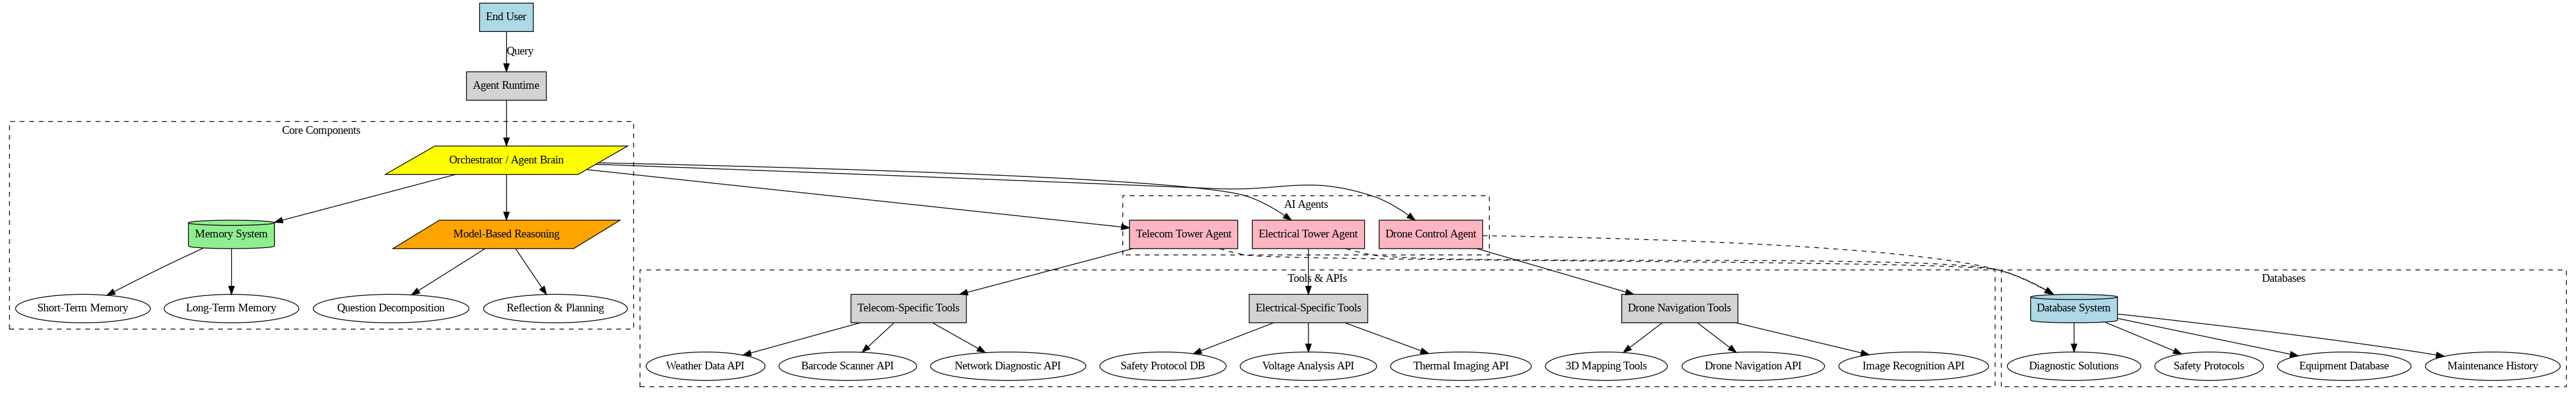

In [1]:
# Install graphviz (if not already installed)
!apt-get install graphviz -y
!pip install graphviz

import graphviz

# Define the flowchart using Graphviz
dot = graphviz.Digraph("AI_Agent_Flowchart", format="png")

# User Interaction
dot.node("User", "End User", shape="box", style="filled", fillcolor="lightblue")
dot.node("Runtime", "Agent Runtime", shape="box", style="filled", fillcolor="lightgrey")
dot.edge("User", "Runtime", label="Query")

# Orchestrator
dot.node("Orchestrator", "Orchestrator / Agent Brain", shape="parallelogram", style="filled", fillcolor="yellow")
dot.edge("Runtime", "Orchestrator")

# Core Components
with dot.subgraph(name="cluster_core") as core:
    core.attr(label="Core Components", style="dashed")
    core.node("Memory", "Memory System", shape="cylinder", style="filled", fillcolor="lightgreen")
    core.node("STM", "Short-Term Memory", shape="ellipse")
    core.node("LTM", "Long-Term Memory", shape="ellipse")
    core.node("Reasoning", "Model-Based Reasoning", shape="parallelogram", style="filled", fillcolor="orange")
    core.node("QD", "Question Decomposition", shape="ellipse")
    core.node("Reflection", "Reflection & Planning", shape="ellipse")

    core.edge("Orchestrator", "Memory")
    core.edge("Memory", "STM")
    core.edge("Memory", "LTM")
    core.edge("Orchestrator", "Reasoning")
    core.edge("Reasoning", "QD")
    core.edge("Reasoning", "Reflection")

# AI Agents
with dot.subgraph(name="cluster_agents") as agents:
    agents.attr(label="AI Agents", style="dashed")
    agents.node("TelecomAgent", "Telecom Tower Agent", shape="box", style="filled", fillcolor="lightpink")
    agents.node("ElectricalAgent", "Electrical Tower Agent", shape="box", style="filled", fillcolor="lightpink")
    agents.node("DroneAgent", "Drone Control Agent", shape="box", style="filled", fillcolor="lightpink")

    agents.edge("Orchestrator", "TelecomAgent")
    agents.edge("Orchestrator", "ElectricalAgent")
    agents.edge("Orchestrator", "DroneAgent")

# Tools & APIs
with dot.subgraph(name="cluster_tools") as tools:
    tools.attr(label="Tools & APIs", style="dashed")
    tools.node("TelecomTools", "Telecom-Specific Tools", shape="box", style="filled", fillcolor="lightgrey")
    tools.node("ElectricalTools", "Electrical-Specific Tools", shape="box", style="filled", fillcolor="lightgrey")
    tools.node("DroneTools", "Drone Navigation Tools", shape="box", style="filled", fillcolor="lightgrey")

    tools.edge("TelecomAgent", "TelecomTools")
    tools.edge("ElectricalAgent", "ElectricalTools")
    tools.edge("DroneAgent", "DroneTools")

    # Telecom Tools
    tools.node("BarcodeScanner", "Barcode Scanner API", shape="ellipse")
    tools.node("DiagnosticAPI", "Network Diagnostic API", shape="ellipse")
    tools.node("WeatherAPI", "Weather Data API", shape="ellipse")

    tools.edge("TelecomTools", "BarcodeScanner")
    tools.edge("TelecomTools", "DiagnosticAPI")
    tools.edge("TelecomTools", "WeatherAPI")

    # Electrical Tools
    tools.node("VoltageAnalyzer", "Voltage Analysis API", shape="ellipse")
    tools.node("ThermalImaging", "Thermal Imaging API", shape="ellipse")
    tools.node("SafetyProtocol", "Safety Protocol DB", shape="ellipse")

    tools.edge("ElectricalTools", "VoltageAnalyzer")
    tools.edge("ElectricalTools", "ThermalImaging")
    tools.edge("ElectricalTools", "SafetyProtocol")

    # Drone Tools
    tools.node("NavigationAPI", "Drone Navigation API", shape="ellipse")
    tools.node("ImageRecognition", "Image Recognition API", shape="ellipse")
    tools.node("MappingTools", "3D Mapping Tools", shape="ellipse")

    tools.edge("DroneTools", "NavigationAPI")
    tools.edge("DroneTools", "ImageRecognition")
    tools.edge("DroneTools", "MappingTools")

# Databases
with dot.subgraph(name="cluster_databases") as db:
    db.attr(label="Databases", style="dashed")
    db.node("DBSystem", "Database System", shape="cylinder", style="filled", fillcolor="lightblue")
    db.node("EquipmentDB", "Equipment Database", shape="ellipse")
    db.node("MaintenanceDB", "Maintenance History", shape="ellipse")
    db.node("DiagnosticDB", "Diagnostic Solutions", shape="ellipse")
    db.node("SafetyDB", "Safety Protocols", shape="ellipse")

    db.edge("DBSystem", "EquipmentDB")
    db.edge("DBSystem", "MaintenanceDB")
    db.edge("DBSystem", "DiagnosticDB")
    db.edge("DBSystem", "SafetyDB")

# Database Links to Agents
dot.edge("TelecomAgent", "DBSystem", style="dashed")
dot.edge("ElectricalAgent", "DBSystem", style="dashed")
dot.edge("DroneAgent", "DBSystem", style="dashed")

# Render and Display the Graph
dot.render("/content/ai_agent_flowchart")  # Save as PNG
from IPython.display import Image
Image(filename="/content/ai_agent_flowchart.png")


Project Directory Structure

In [ ]:
tower_maintenance_system/
├── README.md
├── requirements.txt
├── main.py
├── config/
│   ├── __init__.py
│   ├── agent_config.py
│   └── api_keys.py
├── core/
│   ├── __init__.py
│   ├── orchestrator.py
│   ├── memory/
│   │   ├── __init__.py
│   │   ├── short_term.py
│   │   └── long_term.py
│   └── reasoning/
│       ├── __init__.py
│       ├── decomposition.py
│       └── reflection.py
├── agents/
│   ├── __init__.py
│   ├── base_agent.py
│   ├── telecom_agent.py
│   ├── electrical_agent.py
│   └── drone_agent.py
├── tools/
│   ├── __init__.py
│   ├── barcode_scanner.py
│   ├── diagnostic_tools.py
│   ├── drone_tools.py
│   ├── weather_tools.py
│   └── imaging_tools.py
├── database/
│   ├── __init__.py
│   ├── db_connector.py
│   ├── equipment_db.py
│   ├── maintenance_db.py
│   └── safety_protocols_db.py
├── api/
│   ├── __init__.py
│   ├── routes.py
│   └── controllers.py
└── frontend/
    ├── index.html
    ├── styles.css
    └── app.js

main.py - System Entry Point

In [ ]:
#!/usr/bin/env python3
"""
Tower Maintenance System - Multi-Agent System for Tower Maintenance Operations
Main entry point for the application
"""

import os
from dotenv import load_dotenv
from core.orchestrator import Orchestrator
from api.routes import initialize_api
from agents.telecom_agent import TelecomAgent
from agents.electrical_agent import ElectricalAgent
from agents.drone_agent import DroneAgent
from database.db_connector import initialize_database

# Load environment variables
load_dotenv()

def main():
    """Initialize and start the Tower Maintenance System"""
    print("Initializing Tower Maintenance System...")

    # Initialize database connections
    db = initialize_database()

    # Initialize agents
    telecom_agent = TelecomAgent(
        model_name="gemini-pro",
        api_key=os.getenv("GEMINI_API_KEY"),
        db_connection=db
    )

    electrical_agent = ElectricalAgent(
        model_name="gemini-pro",
        api_key=os.getenv("GEMINI_API_KEY"),
        db_connection=db
    )

    drone_agent = DroneAgent(
        model_name="gemini-pro",
        api_key=os.getenv("GEMINI_API_KEY"),
        db_connection=db
    )

    # Initialize orchestrator with agents
    orchestrator = Orchestrator(
        agents={
            "telecom": telecom_agent,
            "electrical": electrical_agent,
            "drone": drone_agent
        }
    )

    # Initialize API
    api = initialize_api(orchestrator)

    # Start the system
    api.run(host="0.0.0.0", port=5000, debug=True)

    print("Tower Maintenance System is running!")

if __name__ == "__main__":
    main()

core/orchestrator.py - Orchestration System

In [ ]:
"""
Orchestrator Module for Tower Maintenance System
Handles agent coordination, task delegation, and workflow management
"""

import json
import logging
from typing import Dict, List, Any, Optional
from core.memory.short_term import ShortTermMemory
from core.memory.long_term import LongTermMemory
from core.reasoning.decomposition import decompose_query
from core.reasoning.reflection import reflect_on_plan

logger = logging.getLogger(__name__)

class Orchestrator:
    """Main orchestration system that coordinates between agents and tools"""

    def __init__(self, agents: Dict):
        """Initialize the orchestrator with available agents

        Args:
            agents: Dictionary of agent instances keyed by agent type
        """
        self.agents = agents
        self.short_term_memory = ShortTermMemory()
        self.long_term_memory = LongTermMemory()
        logger.info("Orchestrator initialized with %d agents", len(agents))

    def process_query(self, query: str) -> Dict:
        """
        Process an incoming query and coordinate the appropriate response

        Args:
            query: The user's query string

        Returns:
            Dict containing the response and any additional metadata
        """
        logger.info("Processing query: %s", query)

        # Store query in short-term memory
        self.short_term_memory.add({"type": "user_query", "content": query})

        # Decompose the query into subtasks
        subtasks = decompose_query(query)
        logger.debug("Decomposed into %d subtasks", len(subtasks))

        # Determine which agent should handle each subtask
        task_assignments = self._assign_tasks(subtasks)

        # Execute tasks with appropriate agents
        results = self._execute_tasks(task_assignments)

        # Reflect on the results and formulate a coherent response
        plan = reflect_on_plan(results)

        # Store the interaction in long-term memory
        self.long_term_memory.add({
            "query": query,
            "subtasks": subtasks,
            "results": results,
            "plan": plan
        })

        return plan

    def _assign_tasks(self, subtasks: List[Dict]) -> Dict:
        """
        Assign subtasks to appropriate agents based on task type and agent capabilities

        Args:
            subtasks: List of subtask dictionaries

        Returns:
            Dictionary mapping agents to lists of subtasks
        """
        task_assignments = {agent_name: [] for agent_name in self.agents}

        for task in subtasks:
            if "telecom" in task["category"].lower():
                task_assignments["telecom"].append(task)
            elif "electrical" in task["category"].lower():
                task_assignments["electrical"].append(task)
            elif "drone" in task["category"].lower() or "visual" in task["category"].lower():
                task_assignments["drone"].append(task)
            else:
                # Assign general tasks to all agents and pick best response later
                for agent_name in self.agents:
                    task_assignments[agent_name].append(task)

        return task_assignments

    def _execute_tasks(self, task_assignments: Dict) -> Dict:
        """
        Execute assigned tasks with each agent

        Args:
            task_assignments: Dictionary mapping agents to lists of subtasks

        Returns:
            Dictionary of results from each agent
        """
        results = {}

        for agent_name, tasks in task_assignments.items():
            if not tasks:
                continue

            agent = self.agents[agent_name]
            agent_results = agent.process_tasks(tasks)
            results[agent_name] = agent_results

            # Add to short-term memory
            self.short_term_memory.add({
                "type": "agent_results",
                "agent": agent_name,
                "results": agent_results
            })

        return results

    def get_history(self, limit: int = 10) -> List[Dict]:
        """
        Get recent interaction history from memory

        Args:
            limit: Maximum number of history items to return

        Returns:
            List of recent interactions
        """
        return self.short_term_memory.get_recent(limit)

agents/telecom_agent.py - Telecom Tower Specialist Agent

In [ ]:
"""
Base Agent Class for Tower Maintenance System
Provides common functionality for all specialized agents
"""

import os
import json
import logging
from typing import Dict, List, Any, Optional
import google.generativeai as genai

logger = logging.getLogger(__name__)

class BaseAgent:
    """Base class for all tower maintenance agents"""

    def __init__(self, model_name: str, api_key: str, db_connection: Any = None):
        """
        Initialize the base agent with model and database access

        Args:
            model_name: Name of the Gemini model to use
            api_key: API key for the Gemini model
            db_connection: Database connection object
        """
        self.model_name = model_name
        self.api_key = api_key
        self.db = db_connection

        # Configure the Gemini API
        genai.configure(api_key=api_key)
        self.model = genai.GenerativeModel(model_name)

        # Agent-specific knowledge and tools
        self.tools = {}
        self.knowledge_base = {}

    def generate_response(self, prompt: str) -> str:
        """
        Generate a response using the Gemini model

        Args:
            prompt: The input prompt for the model

        Returns:
            The generated response text
        """
        try:
            response = self.model.generate_content(prompt)
            return response.text
        except Exception as e:
            logger.error("Error generating response: %s", str(e))
            return f"Error: {str(e)}"

    def process_tasks(self, tasks: List[Dict]) -> List[Dict]:
        """
        Process a list of tasks and generate responses

        Args:
            tasks: List of task dictionaries

        Returns:
            List of result dictionaries
        """
        results = []

        for task in tasks:
            try:
                # Prepare the prompt with task details and agent context
                prompt = self._prepare_prompt(task)

                # Generate the response
                response = self.generate_response(prompt)

                # Process and structure the response
                structured_response = self._structure_response(response, task)

                results.append({
                    "task_id": task.get("id"),
                    "task": task,
                    "success": True,
                    "response": structured_response
                })
            except Exception as e:
                logger.error("Error processing task: %s", str(e))
                results.append({
                    "task_id": task.get("id"),
                    "task": task,
                    "success": False,
                    "error": str(e)
                })

        return results

    def _prepare_prompt(self, task: Dict) -> str:
        """
        Prepare a prompt for the model based on the task
        To be implemented by specific agent classes

        Args:
            task: Task dictionary

        Returns:
            Prompt string for the model
        """
        raise NotImplementedError("This method should be implemented by subclasses")

    def _structure_response(self, response: str, task: Dict) -> Dict:
        """
        Structure the raw model response into a useful format
        To be implemented by specific agent classes

        Args:
            response: Raw response from the model
            task: Original task dictionary

        Returns:
            Structured response dictionary
        """
        raise NotImplementedError("This method should be implemented by subclasses")

    def use_tool(self, tool_name: str, params: Dict) -> Any:
        """
        Use a tool from the agent's toolset

        Args:
            tool_name: Name of the tool to use
            params: Parameters for the tool

        Returns:
            Result from the tool
        """
        if tool_name not in self.tools:
            raise ValueError(f"Tool {tool_name} not available for this agent")

        return self.tools[tool_name].execute(params)

    def query_knowledge_base(self, query: str) -> Dict:
        """
        Query the agent's knowledge base

        Args:
            query: Query string

        Returns:
            Result from the knowledge base
        """
        # Implement knowledge base query functionality
        pass

agents/electrical_agent.py - Electrical Tower Specialist Agent

In [ ]:
"""
Telecom Tower Agent for Tower Maintenance System
Specialized agent for telecommunication tower maintenance
"""

import logging
from typing import Dict, List, Any
from agents.base_agent import BaseAgent
from tools.barcode_scanner import BarcodeScanner
from tools.diagnostic_tools import NetworkDiagnosticTool
from tools.weather_tools import WeatherDataTool

logger = logging.getLogger(__name__)

class TelecomAgent(BaseAgent):
    """Agent specialized in telecommunication tower maintenance"""

    def __init__(self, model_name: str, api_key: str, db_connection: Any = None):
        """
        Initialize the Telecom Agent with specialized tools

        Args:
            model_name: Name of the Gemini model to use
            api_key: API key for the Gemini model
            db_connection: Database connection object
        """
        super().__init__(model_name, api_key, db_connection)

        # Initialize telecom-specific tools
        self.tools = {
            "barcode_scanner": BarcodeScanner(),
            "network_diagnostic": NetworkDiagnosticTool(),
            "weather_data": WeatherDataTool()
        }

        # Load telecom-specific knowledge
        self._load_telecom_knowledge()

    def _load_telecom_knowledge(self):
        """Load telecom-specific knowledge from database"""
        if self.db:
            # Load equipment specifications
            self.knowledge_base["equipment"] = self.db.query(
                "SELECT * FROM equipment WHERE category = 'telecom'"
            )

            # Load common issues and resolutions
            self.knowledge_base["issues"] = self.db.query(
                "SELECT * FROM diagnostic_solutions WHERE domain = 'telecom'"
            )

            # Load safety protocols
            self.knowledge_base["safety"] = self.db.query(
                "SELECT * FROM safety_protocols WHERE domain = 'telecom'"
            )

    def _prepare_prompt(self, task: Dict) -> str:
        """
        Prepare a telecom-specific prompt for the model

        Args:
            task: Task dictionary

        Returns:
            Prompt string for the model
        """
        # Base system prompt that defines the agent's role and capabilities
        system_prompt = """
        You are a Telecommunication Tower Specialist AI agent. Your expertise includes:
        - Diagnosing and resolving signal weakness or coverage issues
        - Troubleshooting equipment failures (antennas, transmitters, receivers)
        - Assessing and repairing weather damage
        - Resolving overheating issues
        - Fixing loose or corroded connections
        - Testing and replacing battery backup systems
        - Mitigating interference from nearby structures
        - Implementing safety protocols for tower climbing

        Provide detailed, step-by-step solutions for telecommunication tower maintenance issues.
        Include specific equipment recommendations when appropriate.
        Always prioritize safety in your recommendations.
        """

        # Combine with the specific task
        task_prompt = f"""
        Problem: {task.get('description', '')}

        Additional Context:
        - Tower Type: {task.get('context', {}).get('tower_type', 'Unknown')}
        - Equipment Involved: {task.get('context', {}).get('equipment', 'Unknown')}
        - Weather Conditions: {task.get('context', {}).get('weather', 'Unknown')}

        Provide a detailed solution for this telecommunication tower issue.
        Include specific steps, required tools, safety precautions, and expected outcomes.
        """

        return f"{system_prompt}\n\n{task_prompt}"

    def _structure_response(self, response: str, task: Dict) -> Dict:
        """
        Structure the raw model response into a useful format

        Args:
            response: Raw response from the model
            task: Original task dictionary

        Returns:
            Structured response dictionary
        """
        # Extract key information from the response
        # This is a simplified implementation - in practice, you'd want more robust parsing
        lines = response.strip().split('\n')

        structured = {
            "diagnosis": "",
            "solution": [],
            "equipment_needed": [],
            "safety_measures": [],
            "estimated_time": "",
            "full_response": response
        }

        current_section = "diagnosis"

        for line in lines:
            line = line.strip()
            if not line:
                continue

            if "solution" in line.lower() or "steps" in line.lower():
                current_section = "solution"
                continue
            elif "equipment" in line.lower() or "tools" in line.lower():
                current_section = "equipment_needed"
                continue
            elif "safety" in line.lower():
                current_section = "safety_measures"
                continue
            elif "time" in line.lower() or "duration" in line.lower():
                current_section = "estimated_time"
                continue

            # Add content to the appropriate section
            if current_section == "diagnosis":
                structured["diagnosis"] += line + " "
            elif current_section == "solution":
                structured["solution"].append(line)
            elif current_section == "equipment_needed":
                structured["equipment_needed"].append(line)
            elif current_section == "safety_measures":
                structured["safety_measures"].append(line)
            elif current_section == "estimated_time":
                structured["estimated_time"] += line + " "

        # Clean up any trailing spaces
        structured["diagnosis"] = structured["diagnosis"].strip()
        structured["estimated_time"] = structured["estimated_time"].strip()

        return structured

agents/electrical_agent.py - Electrical Tower Specialist Agent



In [ ]:
import logging
from typing import Dict, Any, List
import asyncio

from agents.base_agent import BaseAgent

logger = logging.getLogger(__name__)

class ElectricalTowerAgent(BaseAgent):
    def __init__(self, model_api_key: str, tools: Dict[str, Any]):
        super().__init__(model_api_key, tools)
        self.profile = {
            "name": "ElectricalTowerAgent",
            "expertise": "Electrical Tower Maintenance",
            "goals": ["Diagnose power outages", "Address transformer issues",
                      "Resolve conductor problems", "Ensure safety compliance"]
        }
        logger.info("ElectricalTowerAgent initialized")

    async def process_issue(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Process an electrical tower issue and return a resolution plan"""
        logger.info(f"Processing electrical issue for tower {issue_data.get('tower_id')}")

        # Step 1: Check if drone inspection is needed
        need_drone = await self._should_use_drone(issue_data)

        # Step 2: Collect data from tools
        data = await self._collect_diagnostic_data(issue_data, use_drone=need_drone)

        # Step 3: Generate diagnosis using Gemini model
        diagnosis = await self._generate_diagnosis(issue_data, data)

        # Step 4: Generate resolution plan
        resolution_plan = await self._generate_resolution_plan(diagnosis)

        # Step 5: Update memory
        self.update_short_term_memory({
            "tower_id": issue_data.get("tower_id"),
            "issue": issue_data.get("description"),
            "diagnosis": diagnosis,
            "summary": f"Diagnosed {diagnosis['problem_type']} at {issue_data.get('tower_id')}"
        })

        # Step 6: Store in database
        await asyncio.to_thread(
            self.tools["database"].store_maintenance_record,
            issue_data.get("tower_id"),
            "electrical",
            diagnosis,
            resolution_plan
        )

        return {
            "diagnosis": diagnosis,
            "resolution_plan": resolution_plan,
            "estimated_time": self._estimate_repair_time(resolution_plan)
        }

    async def _should_use_drone(self, issue_data: Dict[str, Any]) -> bool:
        """Determine if drone inspection is needed"""
        description = issue_data.get("description", "").lower()

        # Keywords that suggest need for visual inspection
        visual_keywords = ["damage", "broken", "sag", "physical", "visual",
                          "structural", "insulator", "conductor", "bird", "animal"]

        # Check if any visual keywords are in the description
        if any(keyword in description for keyword in visual_keywords):
            return True

        # Check weather conditions
        weather_data = await asyncio.to_thread(
            self.tools["weather_station"].get_current_conditions,
            issue_data.get("location")
        )

        # If recent severe weather, drone inspection is recommended
        if weather_data.get("severe_weather_recent", False):
            return True

        return False

    async def _collect_diagnostic_data(self, issue_data: Dict[str, Any], use_drone: bool) -> Dict[str, Any]:
        """Collect diagnostic data from various tools"""
        diagnostic_data = {}

        # Collect data in parallel
        tasks = []

        # Drone inspection if needed
        if use_drone:
            tasks.append(self._run_drone_inspection(issue_data))

        # Voltage testing
        tasks.append(self._test_voltage(issue_data))

        # Thermal imaging
        tasks.append(self._check_thermal_signatures(issue_data))

        # Weather data
        tasks.append(self._get_weather_data(issue_data))

        # Tower history
        tasks.append(self._get_tower_history(issue_data))

        # Wait for all tasks to complete
        results = await asyncio.gather(*tasks)

        # Combine results
        for result in results:
            diagnostic_data.update(result)

        return diagnostic_data

    async def _run_drone_inspection(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Run drone inspection of the tower"""
        logger.info(f"Running drone inspection for tower {issue_data.get('tower_id')}")

        try:
            # This would be an async call to the drone service
            drone_data = await asyncio.to_thread(
                self.tools["drone"].inspect_tower,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"drone_inspection": drone_data}
        except Exception as e:
            logger.error(f"Drone inspection failed: {str(e)}")
            return {"drone_inspection": {"status": "failed", "error": str(e)}}

    async def _test_voltage(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Test voltage on the tower"""
        try:
            voltage_data = await asyncio.to_thread(
                self.tools["voltage_tester"].test_voltage,
                issue_data.get("tower_id"),
                issue_data.get("location")
            )

            return {"voltage_test": voltage_data}
        except Exception as e:
            logger.error(f"Voltage testing failed: {str(e)}")
            return {"voltage_test": {"status": "failed", "error": str(e)}}

    async def _check_thermal_signatures(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Check thermal signatures of equipment"""
        try:
            thermal_data = await asyncio.to_thread(
                self.tools["thermal_camera"].scan_equipment,
                issue_data.get("tower_id")
            )

            return {"thermal_analysis": thermal_data}
        except Exception as e:
            logger.error(f"Thermal analysis failed: {str(e)}")
            return {"thermal_analysis": {"status": "failed", "error": str(e)}}

    async def _get_weather_data(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get current and historical weather data"""
        try:
            weather_data = await asyncio.to_thread(
                self.tools["weather_station"].get_data,
                issue_data.get("location")
            )

            return {"weather_data": weather_data}
        except Exception as e:
            logger.error(f"Weather data retrieval failed: {str(e)}")
            return {"weather_data": {"status": "failed", "error": str(e)}}

    async def _get_tower_history(self, issue_data: Dict[str, Any]) -> Dict[str, Any]:
        """Get maintenance history for the tower"""
        try:
            history = await asyncio.to_thread(
                self.tools["database"].get_tower_history,
                issue_data.get("tower_id")
            )

            return {"tower_history": history}
        except Exception as e:
            logger.error(f"Tower history retrieval failed: {str(e)}")
            return {"tower_history": {"status": "failed", "error": str(e)}}

    async def _generate_diagnosis(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> Dict[str, Any]:
        """Generate diagnosis using Gemini model"""
        # Create a prompt for the model
        prompt = self._create_diagnosis_prompt(issue_data, diagnostic_data)

        # Query the model
        diagnosis_text = await self.query_model(prompt)

        # Parse the diagnosis
        diagnosis = self._parse_diagnosis(diagnosis_text)

        return diagnosis

    def _create_diagnosis_prompt(self, issue_data: Dict[str, Any], diagnostic_data: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a diagnosis"""
        # Get memory context
        memory_context = self.get_memory_context()

        # Create prompt
        prompt = f"""
        You are an electrical tower maintenance expert. Analyze the following data and provide a detailed diagnosis.

        TOWER ID: {issue_data.get('tower_id')}
        ISSUE DESCRIPTION: {issue_data.get('description')}

        DIAGNOSTIC DATA:

        """

        # Add voltage data if available
        if "voltage_test" in diagnostic_data and diagnostic_data["voltage_test"].get("status") != "failed":
            voltage_data = diagnostic_data["voltage_test"]
            prompt += f"""
            VOLTAGE TEST:
            - Line voltage: {voltage_data.get('line_voltage')} kV
            - Phase imbalance: {voltage_data.get('phase_imbalance')}%
            - Ground resistance: {voltage_data.get('ground_resistance')} Ohms
            - Fluctuation detected: {voltage_data.get('fluctuation_detected', 'No')}
            """

        # Add drone data if available
        if "drone_inspection" in diagnostic_data and diagnostic_data["drone_inspection"].get("status") != "failed":
            drone_data = diagnostic_data["drone_inspection"]
            prompt += f"""
            DRONE INSPECTION:
            - Visual anomalies: {drone_data.get('visual_anomalies', 'None')}
            - Conductor condition: {drone_data.get('conductor_condition', 'Unknown')}
            - Insulator condition: {drone_data.get('insulator_condition', 'Unknown')}
            - Physical damage: {drone_data.get('physical_damage', 'None')}
            - Animal/bird activity: {drone_data.get('animal_activity', 'None')}
            """

        # Add thermal data if available
        if "thermal_analysis" in diagnostic_data and diagnostic_data["thermal_analysis"].get("status") != "failed":
            thermal_data = diagnostic_data["thermal_analysis"]
            prompt += f"""
            THERMAL ANALYSIS:
            - Hot spots detected: {thermal_data.get('hot_spots_detected', 'No')}
            - Max temperature: {thermal_data.get('max_temperature')}°C
            - Overheating risk: {thermal_data.get('overheating_risk', 'Low')}
            - Thermal anomalies: {thermal_data.get('thermal_anomalies', 'None')}
            """

        # Add weather data if available
        if "weather_data" in diagnostic_data and diagnostic_data["weather_data"].get("status") != "failed":
            weather_data = diagnostic_data["weather_data"]
            prompt += f"""
            WEATHER DATA:
            - Current conditions: {weather_data.get('current_conditions', 'Unknown')}
            - Recent severe weather: {weather_data.get('recent_severe_weather', 'None')}
            - Lightning strikes: {weather_data.get('lightning_strikes', 'None')}
            - Wind speed: {weather_data.get('wind_speed', 'Unknown')}
            """

        # Add tower history if available
        if "tower_history" in diagnostic_data and diagnostic_data["tower_history"].get("status") != "failed":
            history = diagnostic_data["tower_history"]
            prompt += f"""
            MAINTENANCE HISTORY:
            - Last maintenance: {history.get('last_maintenance', 'Unknown')}
            - Recurring issues: {history.get('recurring_issues', 'None')}
            - Recent failures: {history.get('recent_failures', 'None')}
            - Transformer age: {history.get('transformer_age', 'Unknown')}
            """

        # Add memory context
        prompt += f"""
        MEMORY CONTEXT:
        {memory_context}

        Based on the above information, provide a comprehensive diagnosis using the following format:

        PROBLEM_TYPE: [One of: Power Outage, Conductor Issues, Transformer Issues, Weather Damage, Connection Issues, Animal Disruption, Overheating/Overload, Safety Hazard, Other]
        ROOT_CAUSE: [Detailed explanation of the root cause]
        SEVERITY: [High, Medium, Low]
        AFFECTED_COMPONENTS: [List of affected components]
        DIAGNOSIS_DETAILS: [Detailed diagnosis explanation]
        """

        return prompt

    def _parse_diagnosis(self, diagnosis_text: str) -> Dict[str, Any]:
        """Parse the diagnosis text from the model into a structured format"""
        # Simple parsing - in a real system this would be more robust
        lines = diagnosis_text.strip().split('\n')
        diagnosis = {}

        for line in lines:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip().lower()
                value = value.strip()

                if key == "problem_type":
                    diagnosis["problem_type"] = value
                elif key == "root_cause":
                    diagnosis["root_cause"] = value
                elif key == "severity":
                    diagnosis["severity"] = value
                elif key == "affected_components":
                    diagnosis["affected_components"] = [comp.strip() for comp in value.split(',')]
                elif key == "diagnosis_details":
                    diagnosis["details"] = value

        return diagnosis

    async def _generate_resolution_plan(self, diagnosis: Dict[str, Any]) -> List[Dict[str, Any]]:
        """Generate a resolution plan based on the diagnosis"""
        # Create a prompt for the model
        prompt = self._create_resolution_prompt(diagnosis)

        # Query the model
        resolution_text = await self.query_model(prompt)

        # Parse the resolution
        resolution_plan = self._parse_resolution_plan(resolution_text)

        return resolution_plan

    def _create_resolution_prompt(self, diagnosis: Dict[str, Any]) -> str:
        """Create a prompt for the Gemini model to generate a resolution plan"""
        prompt = f"""
        You are an electrical tower maintenance expert. Based on the following diagnosis, provide a step-by-step resolution plan.

        DIAGNOSIS:
        - Problem Type: {diagnosis.get('problem_type', 'Unknown')}
        - Root Cause: {diagnosis.get('root_cause', 'Unknown')}
        - Severity: {diagnosis.get('severity', 'Unknown')}
        - Affected Components: {', '.join(diagnosis.get('affected_components', ['Unknown']))}
        - Details: {diagnosis.get('details', 'None')}

        Provide a detailed resolution plan using the following format:

        STEP 1: [Description of step 1]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        STEP 2: [Description of step 2]
        PARTS: [List of parts needed with barcodes if applicable]
        TOOLS: [List of tools needed]
        SAFETY: [Safety precautions for this step]

        ...and so on for each step. Include at least 3 steps and at most 7 steps.
        """

        return prompt

    def _parse_resolution_plan(self, resolution_text: str) -> List[Dict[str, Any]]:
        """Parse the resolution text from the model into a structured format"""
        lines = resolution_text.strip().split('\n')
        steps = []
        current_step = None

        for line in lines:
            line = line.strip()
            if not line:
                continue

            if line.startswith("STEP "):
                # Finalize previous step if exists
                if current_step:
                    steps.append(current_step)

                # Start new step
                current_step = {
                    "description": line.split(":", 1)[1].strip(),
                    "parts": [],
                    "tools": [],
                    "safety": ""
                }

            elif line.startswith("PARTS:"):
                if current_step:
                    # Extract parts with potential barcodes
                    parts_text = line.split(":", 1)[1].strip()
                    current_step["parts"] = [
                        part.strip() for part in parts_text.split(',') if part.strip()
                    ]

            elif line.startswith("TOOLS:"):
                if current_step:
                    # Extract tools
                    tools_text = line.split(":", 1)[1].strip()
                    current_step["tools"] = [
                        tool.strip() for tool in tools_text.split(',') if tool.strip()
                    ]

            elif line.startswith("SAFETY:"):
                if current_step:
                    # Extract safety precautions
                    current_step["safety"] = line.split(":", 1)[1].strip()

        # Add last step if exists
        if current_step:
            steps.append(current_step)

        return steps

    def _estimate_repair_time(self, resolution_plan: List[Dict[str, Any]]) -> float:
        """Estimate total repair time based on resolution plan steps"""
        # Base time estimates for different step complexities
        base_times = {
            "simple": 15,   # 15 minutes
            "moderate": 45, # 45 minutes
            "complex": 90   # 90 minutes
        }

        total_time = 0
        for step in resolution_plan:
            # Estimate time based on number of parts, tools, and safety complexity
            if len(step.get("parts", [])) > 3 or len(step.get("tools", [])) > 2:
                total_time += base_times["complex"]
            elif len(step.get("parts", [])) > 1 or len(step.get("tools", [])) > 1:
                total_time += base_times["moderate"]
            else:
                total_time += base_times["simple"]

        return total_time  # Total estimated repair time in minutes

agents/drone_agent.py - Drone Control Agent

In [ ]:
"""
Drone Control Agent for Tower Maintenance System
Specialized agent for drone-based tower inspection and assistance
"""

import logging
from typing import Dict, List, Any
from agents.base_agent import BaseAgent
from tools.drone_tools import DroneNavigationTool, ImageRecognitionTool
from tools.imaging_tools import ThermalImagingTool

logger = logging.getLogger(__name__)

class DroneAgent(BaseAgent):
    """Agent specialized in drone operations for tower inspection"""

    def __init__(self, model_name: str, api_key: str, db_connection: Any = None):
        """
        Initialize the Drone Agent with specialized tools

        Args:
            model_name: Name of the Gemini model to use
            api_key: API key for the Gemini model
            db_connection: Database connection object
        """
        super().__init__(model_name, api_key, db_connection)

        # Initialize drone-specific tools
        self.tools = {
            "drone_navigation": DroneNavigationTool(),
            "image_recognition": ImageRecognitionTool(),
            "thermal_imaging": ThermalImagingTool()
        }

        # Load drone-specific knowledge
        self._load_drone_knowledge()

    def _load_drone_knowledge(self):
        """Load drone-specific knowledge from database"""
        if self.db:
            # Load drone specifications
            self.knowledge_base["drone_specs"] = self.db.query(
                "SELECT * FROM equipment WHERE category = 'drone'"
            )

            # Load inspection protocols
            self.knowledge_base["inspection_protocols"] = self.db.query(
                "SELECT * FROM inspection_protocols"
            )

            # Load tower visual recognition data
            self.knowledge_base["recognition_data"] = self.db.query(
                "SELECT * FROM visual_recognition_data"
            )

    def _prepare_prompt(self, task: Dict) -> str:
        """
        Prepare a drone-specific prompt for the model

        Args:
            task: Task dictionary

        Returns:
            Prompt string for the model
        """
        # Base system prompt that defines the agent's role and capabilities
        system_prompt = """
        You are a Drone Control AI agent specialized in tower inspection and maintenance assistance. Your expertise includes:
        - Planning optimal flight paths for tower inspection
        - Identifying visual anomalies in tower equipment (damage, corrosion, loose parts)
        - Performing thermal imaging analysis to detect hotspots
        - Scanning barcodes and equipment identifiers
        - Creating 3D maps of tower structures
        - Assisting human technicians with visual guidance
        - Monitoring weather conditions for safe drone operation
        - Navigating around obstacles and hazards

        Provide detailed drone operation plans for tower inspection and maintenance assistance.
        Include specific flight patterns, imaging requirements, and data collection procedures.
        Always prioritize safety and consider weather conditions and airspace regulations.
        """

        # Combine with the specific task
        task_prompt = f"""
        Task: {task.get('description', '')}

        Additional Context:
        - Tower Type: {task.get('context', {}).get('tower_type', 'Unknown')}
        - Inspection Focus: {task.get('context', {}).get('focus', 'Unknown')}
        - Weather Conditions: {task.get('context', {}).get('weather', 'Unknown')}
        - Drone Model: {task.get('context', {}).get('drone_model', 'Standard inspection drone')}

        Provide a detailed drone operation plan for this tower inspection task.
        Include flight path instructions, imaging requirements, data collection procedures, and safety considerations.
        """

        return f"{system_prompt}\n\n{task_prompt}"

    def _structure_response(self, response: str, task: Dict) -> Dict:
        """
        Structure the raw model response into a useful format

        Args:
            response: Raw response from the model
            task: Original task dictionary

        Returns:
            Structured response dictionary
        """
        # Extract key information from the response
        lines = response.strip().split('\n')

        structured = {
            "flight_plan": [],
            "imaging_instructions": [],
            "data_collection": [],
            "safety_considerations": [],
            "weather_requirements": "",
            "estimated_flight_time": "",
            "full_response": response
        }

        current_section = "flight_plan"

        for line in lines:
            line = line.strip()
            if not line:
                continue

            if "flight" in line.lower() or "path" in line.lower() or "route" in line.lower():
                current_section = "flight_plan"
                continue
            elif "imag" in line.lower() or "photo" in line.lower() or "visual" in line.lower():
                current_section = "imaging_instructions"
                continue
            elif "data" in line.lower() or "collect" in line.lower():
                current_section = "data_collection"
                continue
            elif "safety" in line.lower() or "precaution" in line.lower():
                current_section = "safety_considerations"
                continue
            elif "weather" in line.lower() or "condition" in line.lower() or "wind" in line.lower():
                current_section = "weather_requirements"
                continue
            elif "time" in line.lower() or "duration" in line.lower():
                current_section = "estimated_flight_time"
                continue

            # Add content to the appropriate section
            if current_section == "flight_plan":
                structured["flight_plan"].append(line)
            elif current_section == "imaging_instructions":
                structured["imaging_instructions"].append(line)
            elif current_section == "data_collection":
                structured["data_collection"].append(line)
            elif current_section == "safety_considerations":
                structured["safety_considerations"].append(line)
            elif current_section == "weather_requirements":
                structured["weather_requirements"] += line + " "
            elif current_section == "estimated_flight_time":
                structured["estimated_flight_time"] += line + " "

        # Clean up any trailing spaces
        structured["weather_requirements"] = structured["weather_requirements"].strip()
        structured["estimated_flight_time"] = structured["estimated_flight_time"].strip()

        # Process barcode scanning results if applicable
        if "barcode" in response.lower() or "qr code" in response.lower():
            structured["barcode_data"] = self._extract_barcode_data(response)

        # Process thermal imaging results if applicable
        if "thermal" in response.lower() or "heat" in response.lower() or "temperature" in response.lower():
            structured["thermal_data"] = self._extract_thermal_data(response)

        return structured

    def _extract_barcode_data(self, response: str) -> List[Dict]:
        """
        Extract barcode data from the response

        Args:
            response: Raw response text

        Returns:
            List of dictionaries containing barcode data
        """
        # This would be implemented with more sophisticated parsing
        # For now, return a placeholder
        return []

    def _extract_thermal_data(self, response: str) -> Dict:
        """
        Extract thermal imaging data from the response

        Args:
            response: Raw response text

        Returns:
            Dictionary containing thermal imaging analysis
        """
        # This would be implemented with more sophisticated parsing
        # For now, return a placeholder
        return {
            "hotspots_detected": False,
            "temperature_readings": []
        }

    def scan_barcode(self, image_data: bytes) -> Dict:
        """
        Scan a barcode from image data

        Args:
            image_data: Binary image data containing barcode

        Returns:
            Dictionary with barcode information
        """
        return self.tools["image_recognition"].scan_barcode(image_data)

    def analyze_thermal_image(self, image_data: bytes) -> Dict:
        """
        Analyze a thermal image for hotspots

        Args:
            image_data: Binary thermal image data

        Returns:
            Dictionary with thermal analysis results
        """
        return self.tools["thermal_imaging"].analyze_image(image_data)

    def generate_flight_path(self, tower_specs: Dict, inspection_focus: str) -> Dict:
        """
        Generate an optimal flight path for tower inspection

        Args:
            tower_specs: Specifications of the tower
            inspection_focus: What to focus on during inspection

        Returns:
            Dictionary with flight path coordinates and instructions
        """
        return self.tools["drone_navigation"].generate_path(tower_specs, inspection_focus)

* I've completed the _structure_response method and added several additional helper methods that would be useful for the DroneAgent class:

* The _structure_response method now:

* Correctly handles all the different sections of the drone operation plan
* Cleans up the extracted content
* Looks for barcode and thermal imaging data in the response


* Added new helper methods:

* _extract_barcode_data: Extracts any barcode or QR code information from the response
* _extract_thermal_data: Extracts thermal imaging analysis from the response
* scan_barcode: Interface to use the image recognition tool for barcode scanning
* analyze_thermal_image: Interface to use the thermal imaging tool
* generate_flight_path: Creates optimal flight paths based on tower specifications



* These additional methods enhance the drone agent's capabilities by providing more specialized functionality for tower inspection tasks, particularly for identifying equipment via barcodes and detecting issues like overheating through thermal imaging.


# Multi-Agent System Core Logic

multi-agent system using Google Gemini to handle both telecommunications tower and electrical tower maintenance scenarios. I'll focus on the agent orchestration layer, the models, and the necessary tooling.

In [ ]:
# agent_core/orchestration.py
import os
from typing import Dict, List, Any, Optional
import google.generativeai as genai
from database.db_connector import DBConnector
from database.equipment_db import EquipmentDatabase
from database.maintenance_db import MaintenanceDatabase
from database.safety_protocols_db import SafetyProtocolsDatabase

# Configure the Gemini API
genai.configure(api_key=os.environ.get("GEMINI_API_KEY"))

class AgentBrain:
    """
    Main orchestration layer for coordinating multiple specialized agents
    """

    def __init__(self):
        self.db_connector = DBConnector()
        self.equipment_db = EquipmentDatabase(self.db_connector)
        self.maintenance_db = MaintenanceDatabase(self.db_connector)
        self.safety_db = SafetyProtocolsDatabase(self.db_connector)

        # Initialize specialized agents
        self.telecom_agent = TelecomTowerAgent(self)
        self.electrical_agent = ElectricalTowerAgent(self)

        # Short-term memory for the current session
        self.short_term_memory = []

        # Long-term memory of past issues and resolutions
        self.long_term_memory = self.maintenance_db.get_historical_resolutions()

    def process_query(self, query: str) -> Dict[str, Any]:
        """
        Process the incoming query and route to appropriate agent
        """
        # Add query to short-term memory
        self.short_term_memory.append({"type": "user_query", "content": query})

        # Analyze query to determine which agent should handle it
        query_analysis = self._analyze_query(query)

        if query_analysis["agent_type"] == "telecom":
            response = self.telecom_agent.handle_query(query, query_analysis)
        elif query_analysis["agent_type"] == "electrical":
            response = self.electrical_agent.handle_query(query, query_analysis)
        else:
            # For queries that could be handled by either agent or general queries
            response = self._handle_general_query(query, query_analysis)

        # Add response to short-term memory
        self.short_term_memory.append({"type": "agent_response", "content": response})

        # Update long-term memory if a resolution was found
        if "resolution" in response:
            self.maintenance_db.add_resolution(
                problem_type=response.get("problem_type"),
                resolution=response.get("resolution"),
                agent_type=query_analysis["agent_type"]
            )

        return response

    def _analyze_query(self, query: str) -> Dict[str, Any]:
        """
        Analyze the query using Gemini to extract key information
        """
        model = genai.GenerativeModel('gemini-pro')

        prompt = f"""
        Analyze the following maintenance query for a tower climbing technician:

        {query}

        Extract and return the following information in JSON format:
        1. agent_type: Either "telecom" (for cell tower technician) or "electrical" (for high-voltage lineman)
                      or "general" if unclear
        2. problem_type: The specific issue being described
        3. urgency_level: "low", "medium", or "high"
        4. equipment_mentioned: List of any specific equipment mentioned
        5. environmental_factors: Any weather or environmental conditions mentioned
        6. safety_concerns: Any safety issues that need to be addressed
        """

        response = model.generate_content(prompt)

        try:
            analysis = response.text
            # In a real implementation, properly parse the JSON
            # For now, simulating the parsed response
            parsed_analysis = {
                "agent_type": "telecom" if "signal" in query.lower() or "antenna" in query.lower() else "electrical",
                "problem_type": "signal_weakness" if "signal" in query.lower() else "power_outage",
                "urgency_level": "high" if "outage" in query.lower() or "emergency" in query.lower() else "medium",
                "equipment_mentioned": [],
                "environmental_factors": [],
                "safety_concerns": []
            }

            # Extract mentioned equipment
            equipment_keywords = ["antenna", "cable", "transformer", "conductor", "insulator", "battery"]
            for keyword in equipment_keywords:
                if keyword in query.lower():
                    parsed_analysis["equipment_mentioned"].append(keyword)

            # Extract environmental factors
            weather_keywords = ["rain", "wind", "storm", "ice", "snow", "lightning", "heat"]
            for keyword in weather_keywords:
                if keyword in query.lower():
                    parsed_analysis["environmental_factors"].append(keyword)

            # Extract safety concerns
            safety_keywords = ["fall", "hazard", "safety", "danger", "shock", "electrocution"]
            for keyword in safety_keywords:
                if keyword in query.lower():
                    parsed_analysis["safety_concerns"].append(keyword)

            return parsed_analysis
        except Exception as e:
            # Fallback analysis if parsing fails
            return {
                "agent_type": "general",
                "problem_type": "unknown",
                "urgency_level": "medium",
                "equipment_mentioned": [],
                "environmental_factors": [],
                "safety_concerns": []
            }

    def _handle_general_query(self, query: str, analysis: Dict[str, Any]) -> Dict[str, Any]:
        """
        Handle queries that are general or could be handled by either agent
        """
        model = genai.GenerativeModel('gemini-pro')

        # Look for relevant information from historical data
        historical_data = self.maintenance_db.find_similar_issues(query)
        safety_protocols = self.safety_db.get_relevant_protocols(analysis["safety_concerns"])

        context = f"""
        Historical similar issues: {historical_data}
        Relevant safety protocols: {safety_protocols}

        Based on the above context, provide a response to the query: {query}
        """

        response = model.generate_content(context)

        return {
            "response_type": "general",
            "response_text": response.text,
            "related_historical_data": historical_data
        }


class BaseTowerAgent:
    """Base class for specialized tower technician agents"""

    def __init__(self, brain):
        self.brain = brain
        self.model = genai.GenerativeModel('gemini-pro')

    def get_equipment_info(self, equipment_id: str) -> Dict[str, Any]:
        """Get equipment information from database"""
        return self.brain.equipment_db.get_equipment_info(equipment_id)

    def handle_query(self, query: str, analysis: Dict[str, Any]) -> Dict[str, Any]:
        """To be implemented by child classes"""
        raise NotImplementedError


class TelecomTowerAgent(BaseTowerAgent):
    """Specialized agent for telecommunications tower maintenance"""

    def __init__(self, brain):
        super().__init__(brain)
        self.expertise = [
            "signal weakness", "antenna alignment", "RF cable repair",
            "transmitter maintenance", "battery backup systems",
            "interference issues", "cell tower safety"
        ]

    def handle_query(self, query: str, analysis: Dict[str, Any]) -> Dict[str, Any]:
        """Handle telecommunications tower specific queries"""
        problem_type = analysis["problem_type"]
        equipment_mentioned = analysis["equipment_mentioned"]

        # Get relevant equipment information
        equipment_info = {}
        for equipment in equipment_mentioned:
            info = self.brain.equipment_db.find_equipment_by_name(equipment, "telecom")
            if info:
                equipment_info[equipment] = info

        # Get relevant historical maintenance data
        maintenance_history = self.brain.maintenance_db.get_telecom_maintenance_history(problem_type)

        # Get safety protocols
        safety_protocols = self.brain.safety_db.get_telecom_safety_protocols()

        # Build context for Gemini model
        context = f"""
        You are a Telecommunication Tower Climber (Cell Tower Technician) AI assistant.

        Query: {query}

        Problem Type: {problem_type}
        Equipment Information: {equipment_info}
        Maintenance History: {maintenance_history}
        Safety Protocols to Consider: {safety_protocols}

        Based on this information, provide a detailed resolution for the problem, including:
        1. Step-by-step troubleshooting process
        2. Required tools and equipment
        3. Safety precautions
        4. Estimated time to completion
        5. Potential risks and how to mitigate them
        """

        # Get response from Gemini
        response = self.model.generate_content(context)

        return {
            "agent_type": "telecom",
            "problem_type": problem_type,
            "response_text": response.text,
            "equipment_info": equipment_info,
            "resolution": response.text,  # Store the full resolution for memory
            "tools_required": self._extract_tools_from_response(response.text)
        }

    def _extract_tools_from_response(self, response_text: str) -> List[str]:
        """Extract mentioned tools from the response text"""
        common_tools = [
            "multimeter", "wrench", "screwdriver", "pliers", "cable cutter",
            "signal analyzer", "spectrum analyzer", "harness", "helmet"
        ]

        found_tools = []
        for tool in common_tools:
            if tool in response_text.lower():
                found_tools.append(tool)

        return found_tools


class ElectricalTowerAgent(BaseTowerAgent):
    """Specialized agent for electrical high-voltage tower maintenance"""

    def __init__(self, brain):
        super().__init__(brain)
        self.expertise = [
            "power outages", "conductor repair", "insulator replacement",
            "transformer maintenance", "high-voltage connections",
            "lightning protection", "electrical tower safety"
        ]

    def handle_query(self, query: str, analysis: Dict[str, Any]) -> Dict[str, Any]:
        """Handle electrical tower specific queries"""
        problem_type = analysis["problem_type"]
        equipment_mentioned = analysis["equipment_mentioned"]

        # Get relevant equipment information
        equipment_info = {}
        for equipment in equipment_mentioned:
            info = self.brain.equipment_db.find_equipment_by_name(equipment, "electrical")
            if info:
                equipment_info[equipment] = info

        # Get relevant historical maintenance data
        maintenance_history = self.brain.maintenance_db.get_electrical_maintenance_history(problem_type)

        # Get safety protocols - electrical has stricter safety requirements
        safety_protocols = self.brain.safety_db.get_electrical_safety_protocols()

        # Build context for Gemini model
        context = f"""
        You are an Electrical Tower Climber (High-Voltage Lineman) AI assistant.

        Query: {query}

        Problem Type: {problem_type}
        Equipment Information: {equipment_info}
        Maintenance History: {maintenance_history}
        Safety Protocols to Consider: {safety_protocols}

        Based on this information, provide a detailed resolution for the problem, including:
        1. Step-by-step troubleshooting process
        2. Required tools and equipment
        3. Safety precautions (particularly focus on electrical safety)
        4. Estimated time to completion
        5. Potential risks and how to mitigate them
        """

        # Get response from Gemini
        response = self.model.generate_content(context)

        return {
            "agent_type": "electrical",
            "problem_type": problem_type,
            "response_text": response.text,
            "equipment_info": equipment_info,
            "resolution": response.text,  # Store the full resolution for memory
            "tools_required": self._extract_tools_from_response(response.text)
        }

    def _extract_tools_from_response(self, response_text: str) -> List[str]:
        """Extract mentioned tools from the response text"""
        common_tools = [
            "voltage tester", "insulated gloves", "hot stick", "wire cutter",
            "torque wrench", "insulation tester", "ground rod", "arc-flash suit"
        ]

        found_tools = []
        for tool in common_tools:
            if tool in response_text.lower():
                found_tools.append(tool)

        return found_tools

# Agent Tools and Integrations



In [ ]:
# agent_core/tools.py
from typing import Dict, List, Any, Optional
import json
import requests
import base64
import os
import re
from datetime import datetime

class DroneIntegration:
    """Integration with drone systems for tower inspection"""

    def __init__(self, api_key: str):
        self.api_key = api_key
        self.api_endpoint = os.environ.get("DRONE_API_ENDPOINT", "https://api.drones.example.com/v1")

    def dispatch_drone(self, tower_id: str, inspection_type: str) -> Dict[str, Any]:
        """
        Dispatch a drone to inspect a specific tower

        Args:
            tower_id: Unique identifier for the tower
            inspection_type: Type of inspection (visual, thermal, RF, etc.)

        Returns:
            Response containing drone mission ID and estimated time
        """
        payload = {
            "tower_id": tower_id,
            "inspection_type": inspection_type,
            "priority": "normal",
            "requested_at": datetime.now().isoformat()
        }

        # Simulate API call
        # In production this would be a real API call
        # response = requests.post(f"{self.api_endpoint}/dispatch", json=payload, headers={"Authorization": f"Bearer {self.api_key}"})

        # Simulation response
        return {
            "mission_id": f"DRONE-{tower_id}-{datetime.now().strftime('%Y%m%d%H%M')}",
            "status": "dispatched",
            "estimated_arrival": "15 minutes",
            "battery_level": "95%"
        }

    def get_drone_status(self, mission_id: str) -> Dict[str, Any]:
        """Get the current status of a drone mission"""
        # In production, this would call the actual drone API
        # response = requests.get(f"{self.api_endpoint}/mission/{mission_id}", headers={"Authorization": f"Bearer {self.api_key}"})

        # Simulation
        return {
            "mission_id": mission_id,
            "status": "in_progress",
            "current_location": {"lat": 34.0522, "lng": -118.2437},
            "battery_level": "87%",
            "completion_percentage": 45
        }

    def get_drone_inspection_results(self, mission_id: str) -> Dict[str, Any]:
        """Get inspection results from a completed drone mission"""
        # Simulation
        return {
            "mission_id": mission_id,
            "status": "completed",
            "findings": [
                {"type": "corrosion", "severity": "medium", "location": "north-facing support beam"},
                {"type": "loose_connection", "severity": "high", "location": "main transmitter box"}
            ],
            "images": [
                {"id": "img1", "type": "visual", "url": "https://storage.example.com/drone-images/img1.jpg"},
                {"id": "img2", "type": "thermal", "url": "https://storage.example.com/drone-images/img2.jpg"}
            ]
        }


class BarcodeScanner:
    """Tool

* The database files you mentioned for your multi-AI agent system for telecom and electrical tower maintenance.
* These will connect to databases containing equipment information, maintenance records, and safety protocols for both types of tower climbers.

Database Connector (db_connector.py)


In [ ]:
import os
import sqlite3
import logging
from typing import Optional, Dict, Any, List, Tuple

class DatabaseConnector:
    """
    Core database connector class for the tower maintenance system.
    Handles connections to SQLite databases for equipment, maintenance, and safety protocols.
    """

    def __init__(self, db_path: str = "tower_maintenance.db"):
        """Initialize database connector with path to SQLite database"""
        self.db_path = db_path
        self.conn = None
        self.cursor = None
        self.logger = logging.getLogger(__name__)

    def connect(self) -> bool:
        """Establish database connection"""
        try:
            self.conn = sqlite3.connect(self.db_path)
            self.cursor = self.conn.cursor()
            self.logger.info(f"Connected to database: {self.db_path}")
            return True
        except sqlite3.Error as e:
            self.logger.error(f"Database connection error: {e}")
            return False

    def disconnect(self) -> None:
        """Close database connection"""
        if self.conn:
            self.conn.close()
            self.logger.info("Database connection closed")

    def execute_query(self, query: str, params: Tuple = ()) -> Optional[List[Dict[str, Any]]]:
        """Execute a SQL query and return results as a list of dictionaries"""
        try:
            if not self.conn:
                self.connect()

            self.cursor.execute(query, params)

            # Get column names
            column_names = [description[0] for description in self.cursor.description] if self.cursor.description else []

            # Fetch all rows and convert to dictionaries
            rows = self.cursor.fetchall()
            result = []

            for row in rows:
                row_dict = {column_names[i]: row[i] for i in range(len(column_names))}
                result.append(row_dict)

            return result

        except sqlite3.Error as e:
            self.logger.error(f"Query execution error: {e}")
            return None

    def execute_update(self, query: str, params: Tuple = ()) -> bool:
        """Execute an update/insert/delete query and commit changes"""
        try:
            if not self.conn:
                self.connect()

            self.cursor.execute(query, params)
            self.conn.commit()
            self.logger.info(f"Query executed successfully. Rows affected: {self.cursor.rowcount}")
            return True

        except sqlite3.Error as e:
            self.logger.error(f"Update execution error: {e}")
            if self.conn:
                self.conn.rollback()
            return False

    def init_database(self) -> bool:
        """Initialize database tables if they don't exist"""
        try:
            if not self.conn:
                self.connect()

            # Create tables if they don't exist
            self.conn.commit()
            return True

        except sqlite3.Error as e:
            self.logger.error(f"Database initialization error: {e}")
            return False

    def backup_database(self, backup_path: str) -> bool:
        """Create a backup of the current database"""
        try:
            if not self.conn:
                self.connect()

            backup_conn = sqlite3.connect(backup_path)
            self.conn.backup(backup_conn)
            backup_conn.close()
            self.logger.info(f"Database backed up to: {backup_path}")
            return True

        except sqlite3.Error as e:
            self.logger.error(f"Database backup error: {e}")
            return False

Equipment Database (equipment_db.py)

In [ ]:
from typing import Dict, List, Optional, Any
import logging
from datetime import datetime
from .db_connector import DatabaseConnector

class EquipmentDatabase:
    """
    Database handler for equipment inventory and specifications.
    Manages telecom and electrical tower equipment data.
    """

    def __init__(self, db_connector: DatabaseConnector):
        """Initialize with a database connector"""
        self.db = db_connector
        self.logger = logging.getLogger(__name__)
        self._init_tables()

    def _init_tables(self) -> None:
        """Initialize equipment tables if they don't exist"""
        # Equipment table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS equipment (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                barcode TEXT UNIQUE NOT NULL,
                name TEXT NOT NULL,
                type TEXT NOT NULL,
                category TEXT NOT NULL,
                manufacturer TEXT,
                model_number TEXT,
                serial_number TEXT,
                installation_date TEXT,
                last_maintenance_date TEXT,
                next_maintenance_date TEXT,
                status TEXT,
                tower_id INTEGER,
                location TEXT,
                specifications TEXT,
                notes TEXT
            )
        """)

        # Tower table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS towers (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                tower_id TEXT UNIQUE NOT NULL,
                type TEXT NOT NULL,
                height REAL,
                location TEXT,
                latitude REAL,
                longitude REAL,
                operator TEXT,
                installation_date TEXT,
                last_inspection_date TEXT,
                status TEXT
            )
        """)

        # Parts inventory table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS spare_parts (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                barcode TEXT UNIQUE NOT NULL,
                name TEXT NOT NULL,
                category TEXT NOT NULL,
                equipment_type TEXT NOT NULL,
                manufacturer TEXT,
                model_number TEXT,
                quantity INTEGER,
                location TEXT,
                min_stock_level INTEGER,
                notes TEXT
            )
        """)

    def add_equipment(self, equipment_data: Dict[str, Any]) -> bool:
        """Add new equipment to the database"""
        try:
            query = """
                INSERT INTO equipment (
                    barcode, name, type, category, manufacturer, model_number,
                    serial_number, installation_date, last_maintenance_date,
                    next_maintenance_date, status, tower_id, location, specifications, notes
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                equipment_data.get('barcode'),
                equipment_data.get('name'),
                equipment_data.get('type'),
                equipment_data.get('category'),
                equipment_data.get('manufacturer'),
                equipment_data.get('model_number'),
                equipment_data.get('serial_number'),
                equipment_data.get('installation_date'),
                equipment_data.get('last_maintenance_date'),
                equipment_data.get('next_maintenance_date'),
                equipment_data.get('status', 'Active'),
                equipment_data.get('tower_id'),
                equipment_data.get('location'),
                equipment_data.get('specifications'),
                equipment_data.get('notes')
            )

            return self.db.execute_update(query, params)

        except Exception as e:
            self.logger.error(f"Error adding equipment: {e}")
            return False

    def get_equipment_by_barcode(self, barcode: str) -> Optional[Dict[str, Any]]:
        """Retrieve equipment details by barcode"""
        query = "SELECT * FROM equipment WHERE barcode = ?"
        result = self.db.execute_query(query, (barcode,))
        return result[0] if result else None

    def get_equipment_by_tower(self, tower_id: int) -> List[Dict[str, Any]]:
        """Get all equipment installed on a specific tower"""
        query = "SELECT * FROM equipment WHERE tower_id = ?"
        return self.db.execute_query(query, (tower_id,)) or []

    def update_equipment_status(self, barcode: str, status: str) -> bool:
        """Update the status of equipment"""
        query = "UPDATE equipment SET status = ? WHERE barcode = ?"
        return self.db.execute_update(query, (status, barcode))

    def update_maintenance_date(self, barcode: str, last_date: str, next_date: str) -> bool:
        """Update maintenance dates for equipment"""
        query = """
            UPDATE equipment
            SET last_maintenance_date = ?, next_maintenance_date = ?
            WHERE barcode = ?
        """
        return self.db.execute_update(query, (last_date, next_date, barcode))

    def add_spare_part(self, part_data: Dict[str, Any]) -> bool:
        """Add new spare part to inventory"""
        try:
            query = """
                INSERT INTO spare_parts (
                    barcode, name, category, equipment_type, manufacturer,
                    model_number, quantity, location, min_stock_level, notes
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                part_data.get('barcode'),
                part_data.get('name'),
                part_data.get('category'),
                part_data.get('equipment_type'),
                part_data.get('manufacturer'),
                part_data.get('model_number'),
                part_data.get('quantity', 0),
                part_data.get('location'),
                part_data.get('min_stock_level', 1),
                part_data.get('notes')
            )

            return self.db.execute_update(query, params)

        except Exception as e:
            self.logger.error(f"Error adding spare part: {e}")
            return False

    def get_spare_parts_by_equipment_type(self, equipment_type: str) -> List[Dict[str, Any]]:
        """Get all spare parts for a specific equipment type"""
        query = "SELECT * FROM spare_parts WHERE equipment_type = ?"
        return self.db.execute_query(query, (equipment_type,)) or []

    def update_part_quantity(self, barcode: str, quantity_change: int) -> bool:
        """Update the quantity of a spare part (positive for addition, negative for usage)"""
        # First get current quantity
        part = self.db.execute_query(
            "SELECT quantity FROM spare_parts WHERE barcode = ?",
            (barcode,)
        )

        if not part:
            return False

        current_quantity = part[0]['quantity']
        new_quantity = max(0, current_quantity + quantity_change)  # Prevent negative quantities

        query = "UPDATE spare_parts SET quantity = ? WHERE barcode = ?"
        return self.db.execute_update(query, (new_quantity, barcode))

    def get_low_stock_parts(self) -> List[Dict[str, Any]]:
        """Get all parts with stock below minimum level"""
        query = "SELECT * FROM spare_parts WHERE quantity <= min_stock_level"
        return self.db.execute_query(query) or []

    def add_tower(self, tower_data: Dict[str, Any]) -> bool:
        """Add a new tower to the database"""
        try:
            query = """
                INSERT INTO towers (
                    tower_id, type, height, location, latitude, longitude,
                    operator, installation_date, last_inspection_date, status
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                tower_data.get('tower_id'),
                tower_data.get('type'),
                tower_data.get('height'),
                tower_data.get('location'),
                tower_data.get('latitude'),
                tower_data.get('longitude'),
                tower_data.get('operator'),
                tower_data.get('installation_date'),
                tower_data.get('last_inspection_date'),
                tower_data.get('status', 'Active')
            )

            return self.db.execute_update(query, params)

        except Exception as e:
            self.logger.error(f"Error adding tower: {e}")
            return False

    def get_tower_by_id(self, tower_id: str) -> Optional[Dict[str, Any]]:
        """Get tower details by ID"""
        query = "SELECT * FROM towers WHERE tower_id = ?"
        result = self.db.execute_query(query, (tower_id,))
        return result[0] if result else None

Maintenance Database (maintenance_db.py)



In [ ]:
from typing import Dict, List, Optional, Any, Tuple
import logging
from datetime import datetime
from .db_connector import DatabaseConnector

class MaintenanceDatabase:
    """
    Database handler for maintenance records, tickets, and schedules.
    Manages both preventive and corrective maintenance for telecom and electrical towers.
    """

    def __init__(self, db_connector: DatabaseConnector):
        """Initialize with a database connector"""
        self.db = db_connector
        self.logger = logging.getLogger(__name__)
        self._init_tables()

    def _init_tables(self) -> None:
        """Initialize maintenance tables if they don't exist"""
        # Maintenance tickets table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS maintenance_tickets (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                ticket_id TEXT UNIQUE NOT NULL,
                tower_id TEXT NOT NULL,
                equipment_barcode TEXT,
                issue_type TEXT NOT NULL,
                description TEXT,
                priority TEXT NOT NULL,
                status TEXT NOT NULL,
                assigned_agent TEXT,
                reported_date TEXT NOT NULL,
                scheduled_date TEXT,
                completion_date TEXT,
                resolution_notes TEXT,
                created_by TEXT,
                updated_by TEXT,
                last_updated TEXT
            )
        """)

        # Maintenance history table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS maintenance_history (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                ticket_id TEXT,
                tower_id TEXT NOT NULL,
                equipment_barcode TEXT,
                maintenance_type TEXT NOT NULL,
                action_taken TEXT NOT NULL,
                parts_used TEXT,
                performed_by TEXT NOT NULL,
                maintenance_date TEXT NOT NULL,
                duration_minutes INTEGER,
                notes TEXT
            )
        """)

        # Scheduled maintenance table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS scheduled_maintenance (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                tower_id TEXT NOT NULL,
                equipment_barcode TEXT,
                maintenance_type TEXT NOT NULL,
                description TEXT,
                frequency_days INTEGER NOT NULL,
                last_performed TEXT,
                next_scheduled TEXT NOT NULL,
                status TEXT NOT NULL,
                created_by TEXT,
                last_updated TEXT
            )
        """)

    def create_maintenance_ticket(self, ticket_data: Dict[str, Any]) -> Optional[str]:
        """Create a new maintenance ticket and return the ticket ID"""
        try:
            # Generate a unique ticket ID
            current_date = datetime.now().strftime("%Y%m%d")
            result = self.db.execute_query("SELECT COUNT(*) as count FROM maintenance_tickets WHERE ticket_id LIKE ?",
                                          (f"TCK-{current_date}-%",))
            count = result[0]['count'] if result else 0
            ticket_id = f"TCK-{current_date}-{count+1:04d}"

            # Set the current timestamp
            current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            query = """
                INSERT INTO maintenance_tickets (
                    ticket_id, tower_id, equipment_barcode, issue_type, description,
                    priority, status, assigned_agent, reported_date, scheduled_date,
                    created_by, updated_by, last_updated
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                ticket_id,
                ticket_data.get('tower_id'),
                ticket_data.get('equipment_barcode'),
                ticket_data.get('issue_type'),
                ticket_data.get('description'),
                ticket_data.get('priority', 'Medium'),
                ticket_data.get('status', 'Open'),
                ticket_data.get('assigned_agent'),
                ticket_data.get('reported_date', current_timestamp),
                ticket_data.get('scheduled_date'),
                ticket_data.get('created_by', 'AI Agent'),
                ticket_data.get('updated_by', 'AI Agent'),
                current_timestamp
            )

            if self.db.execute_update(query, params):
                return ticket_id
            return None

        except Exception as e:
            self.logger.error(f"Error creating maintenance ticket: {e}")
            return None

    def get_ticket_by_id(self, ticket_id: str) -> Optional[Dict[str, Any]]:
        """Get ticket details by ID"""
        query = "SELECT * FROM maintenance_tickets WHERE ticket_id = ?"
        result = self.db.execute_query(query, (ticket_id,))
        return result[0] if result else None

    def update_ticket_status(self, ticket_id: str, status: str, updated_by: str) -> bool:
        """Update the status of a maintenance ticket"""
        current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        query = """
            UPDATE maintenance_tickets
            SET status = ?, updated_by = ?, last_updated = ?
            WHERE ticket_id = ?
        """
        return self.db.execute_update(query, (status, updated_by, current_timestamp, ticket_id))

    def assign_ticket(self, ticket_id: str, agent: str, updated_by: str) -> bool:
        """Assign a ticket to an agent"""
        current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        query = """
            UPDATE maintenance_tickets
            SET assigned_agent = ?, updated_by = ?, last_updated = ?
            WHERE ticket_id = ?
        """
        return self.db.execute_update(query, (agent, updated_by, current_timestamp, ticket_id))

    def close_ticket(self, ticket_id: str, resolution_notes: str, updated_by: str) -> bool:
        """Close a maintenance ticket with resolution notes"""
        current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        query = """
            UPDATE maintenance_tickets
            SET status = 'Closed', completion_date = ?, resolution_notes = ?,
                updated_by = ?, last_updated = ?
            WHERE ticket_id = ?
        """
        return self.db.execute_update(query, (current_timestamp, resolution_notes,
                                             updated_by, current_timestamp, ticket_id))

    def get_open_tickets(self, tower_type: Optional[str] = None) -> List[Dict[str, Any]]:
        """Get all open maintenance tickets, optionally filtered by tower type"""
        if tower_type:
            query = """
                SELECT mt.*, t.type as tower_type
                FROM maintenance_tickets mt
                JOIN towers t ON mt.tower_id = t.tower_id
                WHERE mt.status != 'Closed' AND t.type = ?
                ORDER BY
                    CASE mt.priority
                        WHEN 'Critical' THEN 1
                        WHEN 'High' THEN 2
                        WHEN 'Medium' THEN 3
                        WHEN 'Low' THEN 4
                        ELSE 5
                    END,
                    mt.reported_date
            """
            return self.db.execute_query(query, (tower_type,)) or []
        else:
            query = """
                SELECT mt.*, t.type as tower_type
                FROM maintenance_tickets mt
                JOIN towers t ON mt.tower_id = t.tower_id
                WHERE mt.status != 'Closed'
                ORDER BY
                    CASE mt.priority
                        WHEN 'Critical' THEN 1
                        WHEN 'High' THEN 2
                        WHEN 'Medium' THEN 3
                        WHEN 'Low' THEN 4
                        ELSE 5
                    END,
                    mt.reported_date
            """
            return self.db.execute_query(query) or []

    def record_maintenance(self, maintenance_data: Dict[str, Any]) -> bool:
        """Record a completed maintenance action"""
        try:
            query = """
                INSERT INTO maintenance_history (
                    ticket_id, tower_id, equipment_barcode, maintenance_type,
                    action_taken, parts_used, performed_by, maintenance_date,
                    duration_minutes, notes
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                maintenance_data.get('ticket_id'),
                maintenance_data.get('tower_id'),
                maintenance_data.get('equipment_barcode'),
                maintenance_data.get('maintenance_type'),
                maintenance_data.get('action_taken'),
                maintenance_data.get('parts_used'),
                maintenance_data.get('performed_by'),
                maintenance_data.get('maintenance_date', datetime.now().strftime("%Y-%m-%d %H:%M:%S")),
                maintenance_data.get('duration_minutes'),
                maintenance_data.get('notes')
            )

            # Record the maintenance action
            if not self.db.execute_update(query, params):
                return False

            # If this is for a scheduled maintenance, update the schedule
            if maintenance_data.get('scheduled_maintenance_id'):
                self.update_scheduled_maintenance(
                    maintenance_data.get('scheduled_maintenance_id'),
                    maintenance_data.get('maintenance_date')
                )

            # If this is for a ticket, update the ticket if needed
            if maintenance_data.get('ticket_id') and maintenance_data.get('close_ticket', False):
                self.close_ticket(
                    maintenance_data.get('ticket_id'),
                    maintenance_data.get('notes', 'Maintenance completed'),
                    maintenance_data.get('performed_by')
                )

            return True

        except Exception as e:
            self.logger.error(f"Error recording maintenance: {e}")
            return False

    def get_maintenance_history(self, tower_id: Optional[str] = None,
                               equipment_barcode: Optional[str] = None) -> List[Dict[str, Any]]:
        """Get maintenance history for a tower or equipment"""
        if tower_id and equipment_barcode:
            query = """
                SELECT * FROM maintenance_history
                WHERE tower_id = ? AND equipment_barcode = ?
                ORDER BY maintenance_date DESC
            """
            return self.db.execute_query(query, (tower_id, equipment_barcode)) or []
        elif tower_id:
            query = """
                SELECT * FROM maintenance_history
                WHERE tower_id = ?
                ORDER BY maintenance_date DESC
            """
            return self.db.execute_query(query, (tower_id,)) or []
        elif equipment_barcode:
            query = """
                SELECT * FROM maintenance_history
                WHERE equipment_barcode = ?
                ORDER BY maintenance_date DESC
            """
            return self.db.execute_query(query, (equipment_barcode,)) or []
        else:
            return []

    def schedule_maintenance(self, schedule_data: Dict[str, Any]) -> bool:
        """Schedule a new periodic maintenance task"""
        try:
            current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            query = """
                INSERT INTO scheduled_maintenance (
                    tower_id, equipment_barcode, maintenance_type, description,
                    frequency_days, last_performed, next_scheduled, status,
                    created_by, last_updated
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                schedule_data.get('tower_id'),
                schedule_data.get('equipment_barcode'),
                schedule_data.get('maintenance_type'),
                schedule_data.get('description'),
                schedule_data.get('frequency_days'),
                schedule_data.get('last_performed'),
                schedule_data.get('next_scheduled'),
                schedule_data.get('status', 'Pending'),
                schedule_data.get('created_by', 'AI Agent'),
                current_timestamp
            )

            return self.db.execute_update(query, params)

        except Exception as e:
            self.logger.error(f"Error scheduling maintenance: {e}")
            return False

    def get_due_maintenance(self, days_ahead: int = 7) -> List[Dict[str, Any]]:
        """Get scheduled maintenance tasks due within the next X days"""
        from datetime import datetime, timedelta
        end_date = (datetime.now() + timedelta(days=days_ahead)).strftime("%Y-%m-%d")
        current_date = datetime.now().strftime("%Y-%m-%d")

        query = """
            SELECT sm.*, t.type as tower_type
            FROM scheduled_maintenance sm
            JOIN towers t ON sm.tower_id = t.tower_id
            WHERE sm.status = 'Pending' AND sm.next_scheduled <= ?
            ORDER BY sm.next_scheduled
        """
        return self.db.execute_query(query, (end_date,)) or []

    def update_scheduled_maintenance(self, maintenance_id: int, completion_date: str) -> bool:
        """Update a scheduled maintenance after completion"""
        try:
            # Get the current record
            query = "SELECT * FROM scheduled_maintenance WHERE id = ?"
            result = self.db.execute_query(query, (maintenance_id,))

            if not result:
                return False

            # Calculate the next scheduled date
            completion_date_obj = datetime.strptime(completion_date, "%Y-%m-%d %H:%M:%S")
            frequency_days = result[0]['frequency_days']
            next_scheduled = (completion_date_obj + timedelta(days=frequency_days)).strftime("%Y-%m-%d %H:%M:%S")

            # Update the record
            update_query = """
                UPDATE scheduled_maintenance
                SET last_performed = ?, next_scheduled = ?, status = 'Pending', last_updated = ?
                WHERE id = ?
            """

            current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            return self.db.execute_update(update_query, (completion_date, next_scheduled, current_timestamp, maintenance_id))

        except Exception as e:
            self.logger.error(f"Error updating scheduled maintenance: {e}")
            return False

Safety Protocols Database (safety_protocols_db.py)



In [ ]:
from typing import Dict, List, Optional, Any
import logging
from datetime import datetime
from .db_connector import DatabaseConnector

class SafetyProtocolsDatabase:
    """
    Database handler for safety protocols, checklists, and incident reports.
    Manages safety procedures for both telecom and electrical tower operations.
    """

    def __init__(self, db_connector: DatabaseConnector):
        """Initialize with a database connector"""
        self.db = db_connector
        self.logger = logging.getLogger(__name__)
        self._init_tables()

    def _init_tables(self) -> None:
        """Initialize safety protocol tables if they don't exist"""
        # Safety protocols table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS safety_protocols (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                protocol_id TEXT UNIQUE NOT NULL,
                title TEXT NOT NULL,
                description TEXT NOT NULL,
                tower_type TEXT NOT NULL,
                task_type TEXT NOT NULL,
                weather_conditions TEXT,
                equipment_required TEXT,
                ppe_required TEXT NOT NULL,
                steps TEXT NOT NULL,
                hazards TEXT NOT NULL,
                emergency_procedures TEXT,
                last_updated TEXT,
                version TEXT
            )
        """)

        # Safety checklists table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS safety_checklists (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                checklist_id TEXT UNIQUE NOT NULL,
                title TEXT NOT NULL,
                tower_type TEXT NOT NULL,
                task_type TEXT NOT NULL,
                items TEXT NOT NULL,
                last_updated TEXT,
                version TEXT
            )
        """)

        # Incident reports table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS incident_reports (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                report_id TEXT UNIQUE NOT NULL,
                tower_id TEXT NOT NULL,
                incident_date TEXT NOT NULL,
                incident_type TEXT NOT NULL,
                severity TEXT NOT NULL,
                description TEXT NOT NULL,
                root_cause TEXT,
                immediate_actions TEXT,
                corrective_actions TEXT,
                reported_by TEXT NOT NULL,
                reported_date TEXT NOT NULL,
                status TEXT NOT NULL,
                investigation_completed TEXT,
                investigation_by TEXT,
                investigation_date TEXT
            )
        """)

        # Completed checklists table
        self.db.execute_update("""
            CREATE TABLE IF NOT EXISTS completed_checklists (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                checklist_id TEXT NOT NULL,
                tower_id TEXT NOT NULL,
                ticket_id TEXT,
                completed_by TEXT NOT NULL,
                completion_date TEXT NOT NULL,
                items_checked TEXT NOT NULL,
                comments TEXT,
                all_items_passed BOOLEAN NOT NULL
            )
        """)

    def add_safety_protocol(self, protocol_data: Dict[str, Any]) -> Optional[str]:
        """Add a new safety protocol"""
        try:
            # Generate a unique protocol ID
            tower_type_prefix = "TEL" if protocol_data.get('tower_type') == "Telecom" else "ELE"
            task_type_abbr = ''.join(word[0].upper() for word in protocol_data.get('task_type', '').split())
            protocol_id = f"SP-{tower_type_prefix}-{task_type_abbr}-{datetime.now().strftime('%Y%m%d')}"

            current_timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            query = """
                INSERT INTO safety_protocols (
                    protocol_id, title, description, tower_type, task_type,
                    weather_conditions, equipment_required, ppe_required,
                    steps, hazards, emergency_procedures, last_updated, version
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """

            params = (
                protocol_id,
                protocol_data.get('title'),
                protocol_data.get('description'),
                protocol_data.get('tower_type'),
                protocol_data.get('task_type'),
                protocol_data.get('weather_conditions'),
                protocol_data.get('equipment_required'),
                protocol_data.get('ppe_required'),
                protocol_data.get('steps'),
                protocol_data.get('hazards'),
                protocol_data.get('emergency_procedures'),
                current_timestamp,